In [2]:

# coding: utf-8

# In[2]:


import numpy as np
import random

def read_libsvm(fname):
    with open(fname) as f:
        x,y  =list(),list()
        for l in f:
            line = l.strip().split(" ")
            y.append(int(line[0]))
            x.append([float(s.split(":")[1]) for s in line[1:]])
    return np.array(y),np.array(x)


class Module:
    def forward(self,x):
        pass
    def backward_updateGradient(self,x,delta):
        pass
    def zeroGradParameters(self):
        pass

    
class Loss :
    def getLossValue (self, ypredit ,y):
        pass
    def backward(self,ypredit,y):
        pass
    
        
        
class TanHModule(Module):
    def __init__(self,dimension):
        self.X = dimension
    
    def forward(self,x):
        result[i] = np.tanh(x[i])
        return result
    
    
class SquareLoss(Loss) :
    def __init__(self,dimension):
        self.dimension=dimension
        
    def getLossValue (self, y_predit,y):
        loss = 0.0
        for k in range(0,self.dimension) :
            loss += (y_predit[k]-y[k])*(y_predit[k]-y[k])
        loss /= self.dimension
        return loss
    
    def backward(self,y_predit, y):
        grad = np.zeros(self.dimension)
        for k in range(0,self.dimension):
            grad[k] = 2/self.dimension*(y_predit[k]-y[k])
        return grad
    
    
class LinearModule(Module):
    def __init__(self,n,C):
        self.X = n #input_dimension
        self.Y = C #ouput_dimension
        self.theta = np.zeros((self.X,self.Y))
        self.grad = np.zeros((self.X,self.Y))
        
    def zeroGradParameters(self):
        self.grad = np.zeros((self.X,self.Y))

    def forward(self,x):
        result = np.dot(x,self.theta)
        return result
    
    #initialise theta avec des valeurs comprise entre -variance et variance
    def randomize(self, variance):
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.theta[i][j]= random.uniform(0,variance)
        
    def backward_updateGradient(self,x,delta):
        #delta = R^C
        #Grad_\theta(loss(f_theta(x),y) \in R^{C \times n}
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.grad[i][j] += delta[j]*x[i]
        #return self.grad
    
    def updateParameters(self,learning_rate):
        self.theta = self.theta - learning_rate*self.grad
        
        
        
data = read_libsvm('breast-cancer_scale.txt')
data_real = np.concatenate((np.asmatrix(data[1]),np.transpose(np.asmatrix(data[0]))),axis=1)

np.random.shuffle(data_real) #Suffle the data

x_train = np.asarray(data_real[0:int(0.66*len(data[0])),0:10]) #2/3 tiers pour le train
y_train = np.asarray(data_real[0:int(0.66*len(data[0])),10])
x_test  = np.asarray(data_real[int(0.66*len(data[0])):len(data[0]),0:10])
y_test  = np.asarray(data_real[int(0.66*len(data[0])):len(data[0]),10])

y_train = y_train -3 #mettons les labels 4 à 1 et le 2 à -1 
y_test = y_test - 3






In [3]:
model = LinearModule(10,1)
model.randomize(0.1)
criterion = SquareLoss(1)
learning_rate= 0.01 
maxEpoch = 1000 

all_losses= np.zeros(maxEpoch)
all_losses_global_train=np.zeros(maxEpoch)
all_losses_global_test=np.zeros(maxEpoch)
all_out =np.zeros(maxEpoch)
accuracy_train=np.zeros(maxEpoch)
accuracy_test=np.zeros(maxEpoch)

In [3]:
module = LinearModule(10,1)
loss = SquareLoss(1)
gradient_step = 0.01
module.randomize(0.1)
    
all_losses= np.zeros(maxEpoch)
all_losses_global_train=np.zeros(maxEpoch)
all_losses_global_test=np.zeros(maxEpoch)
all_out =np.zeros(maxEpoch)
accuracy_train=np.zeros(maxEpoch)
accuracy_test=np.zeros(maxEpoch)
    
maxEpoch = 1000 
for i in range(maxEpoch):
    j=random.randint(0,len(x_train)-1)
    x = x_train[j]
    y = y_train[j]
    module.zeroGradParameters()
    prediction = module.forward(x)
    error = loss.getLossValue(prediction,y)
    delta = loss.backward(prediction,y)
    module.backward_updateGradient(x,delta)
    module.updateParameters(gradient_step)
            
       
    accuracy_train[i] = 0
    print(len(x_train))
    for k in range(0,len(x_train)):
        print(accuracy_train[i])
        print('y_train : ' +str([y_train[k]]))
        print('module forward : ' + str(module.forward(x_train[k])))
        print('np.sign : ' + str((np.sign(module.forward(x_train[k]))*[y_train[k]])))
        accuracy_train[i] += ((np.sign(module.forward(x_train[k]))*[y_train[k]])+1)/2/len(x_train)
         
        accuracy_test[i] = 0
        for k in range(0,len(x_test)):
            accuracy_test[i] += ((np.sign(module.forward(x_test[k]))*[y_test[k]])+1)/2/len(x_test)
            

450
0.0
y_train : [array([ 1.])]
module forward : [-0.23111444]
np.sign [[-1.]]
0.0
y_train : [array([-1.])]
module forward : [-0.52775768]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.57991738]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([ 1.])]
module forward : [-0.14212061]
np.sign [[-1.]]
0.00444444444444
y_train : [array([ 1.])]
module forward : [ 0.29932038]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([-1.])]
module forward : [-0.53197257]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([-1.])]
module forward : [-0.56931296]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.54406349]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-0.58867796]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([ 1.])]
module forward : [-0.20219848]
np.sign [[-1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.55599238]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module

0.173333333333
y_train : [array([-1.])]
module forward : [-0.60380392]
np.sign [[ 1.]]
0.175555555556
y_train : [array([-1.])]
module forward : [-0.51941282]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [-0.02351631]
np.sign [[-1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-0.44250424]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 0.06260578]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.60299972]
np.sign [[ 1.]]
0.184444444444
y_train : [array([-1.])]
module forward : [-0.59329062]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 0.18731433]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [-0.03809709]
np.sign [[-1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [-0.18000655]
np.sign [[-1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [-0.1812058]
np.sign [[-1.]]
0.188888888889
y_train : [array([-1.])]
module forward

y_train : [array([-1.])]
module forward : [-0.59600924]
np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [-0.08020558]
np.sign [[-1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.53437369]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.60198321]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.26459666]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.56768546]
np.sign [[ 1.]]
0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.12881138]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.52153591]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [-0.24806755]
np.sign [[-1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.58216645]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-0.47946044]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [-0.0370033

0.522222222222
y_train : [array([ 1.])]
module forward : [-0.05412929]
np.sign [[-1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.5265629]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.55840845]
np.sign [[ 1.]]
0.526666666667
y_train : [array([-1.])]
module forward : [-0.54600581]
np.sign [[ 1.]]
0.528888888889
y_train : [array([ 1.])]
module forward : [-0.24327994]
np.sign [[-1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.58091177]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-0.57789503]
np.sign [[ 1.]]
0.533333333333
y_train : [array([ 1.])]
module forward : [-0.17209066]
np.sign [[-1.]]
0.533333333333
y_train : [array([ 1.])]
module forward : [ 0.0297336]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.57863912]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward : [-0.50619929]
np.sign [[ 1.]]
0.54
y_train : [array([-1.])]
module forward 

0.693333333333
y_train : [array([-1.])]
module forward : [-0.5463185]
np.sign [[ 1.]]
0.695555555556
y_train : [array([ 1.])]
module forward : [-0.06509018]
np.sign [[-1.]]
0.695555555556
y_train : [array([ 1.])]
module forward : [-0.12624109]
np.sign [[-1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.49366531]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-0.58837297]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [-0.34216612]
np.sign [[-1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.50656381]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.05211678]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [-0.18806585]
np.sign [[-1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 0.04326333]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.49905389]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-0.59294

y_train : [array([ 1.])]
module forward : [ 0.09388337]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [-0.20742857]
np.sign [[-1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-0.34918057]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [-0.19204324]
np.sign [[-1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 0.40306441]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([-1.])]
module forward : [-0.33689221]
np.sign [[ 1.]]
0.08
y_train : [array([-1.])]
module forward : [-0.42420913]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([-1.])]
module forward : [-0.49938809]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.48039747]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.08468745]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([-1.])]
module forward : [-0.37533132]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [

0.251111111111
y_train : [array([-1.])]
module forward : [-0.46716994]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.39480706]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.46436393]
np.sign [[ 1.]]
0.257777777778
y_train : [array([ 1.])]
module forward : [-0.04136414]
np.sign [[-1.]]
0.257777777778
y_train : [array([ 1.])]
module forward : [ 0.07632714]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.43814003]
np.sign [[ 1.]]
0.262222222222
y_train : [array([ 1.])]
module forward : [-0.03690354]
np.sign [[-1.]]
0.262222222222
y_train : [array([ 1.])]
module forward : [-0.17791278]
np.sign [[-1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.46584813]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.37296529]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.41348314]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forwar

0.486666666667
y_train : [array([ 1.])]
module forward : [ 0.24767257]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.40668251]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.43315634]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.30252089]
np.sign [[ 1.]]
0.495555555556
y_train : [array([ 1.])]
module forward : [ 0.18754997]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.46839516]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-0.47966163]
np.sign [[ 1.]]
0.502222222222
y_train : [array([ 1.])]
module forward : [ 0.16082774]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-0.40872441]
np.sign [[ 1.]]
0.506666666667
y_train : [array([-1.])]
module forward : [-0.35806818]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-0.4359972]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward 

0.671111111111
y_train : [array([ 1.])]
module forward : [-0.18177044]
np.sign [[-1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-0.45197517]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 0.00270565]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-0.41725111]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.44823421]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.42703651]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-0.48319507]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-0.47914062]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forward : [-0.47506265]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [-0.00655507]
np.sign [[-1.]]
0.688888888889
y_train : [array([-1.])]
module forward : [-0.4366622]
np.sign [[ 1.]]
0.691111111111
y_train : [array([ 1.])]
module forward

0.0422222222222
y_train : [array([-1.])]
module forward : [-0.512136]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-0.46395617]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.51138793]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([ 1.])]
module forward : [ 0.27851388]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.55048475]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.53651667]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [-0.39165694]
np.sign [[-1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.51540452]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [-0.04397093]
np.sign [[-1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-0.5242373]
np.sign [[ 1.]]
0.06
y_train : [array([ 1.])]
module forward : [ 0.29462665]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
modul

0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.35501246]
np.sign [[ 1.]]
0.213333333333
y_train : [array([ 1.])]
module forward : [ 0.18798782]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-0.47377868]
np.sign [[ 1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-0.19086337]
np.sign [[ 1.]]
0.22
y_train : [array([-1.])]
module forward : [-0.53165772]
np.sign [[ 1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-0.46195641]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-0.52824875]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [-0.47641357]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-0.50863927]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.19543057]
np.sign [[ 1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.48605449]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forwar

0.391111111111
y_train : [array([-1.])]
module forward : [-0.5624406]
np.sign [[ 1.]]
0.393333333333
y_train : [array([-1.])]
module forward : [-0.57151747]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.51176668]
np.sign [[ 1.]]
0.397777777778
y_train : [array([ 1.])]
module forward : [ 0.15211716]
np.sign [[ 1.]]
0.4
y_train : [array([ 1.])]
module forward : [-0.0246735]
np.sign [[-1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.59852585]
np.sign [[ 1.]]
0.402222222222
y_train : [array([ 1.])]
module forward : [ 0.17897837]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.51190482]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.16716954]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.56197093]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.49834108]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.398486

0.577777777778
y_train : [array([-1.])]
module forward : [-0.55934645]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 0.07406933]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.53294211]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.56246552]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.54843805]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-0.52841099]
np.sign [[ 1.]]
0.591111111111
y_train : [array([ 1.])]
module forward : [-0.17274062]
np.sign [[-1.]]
0.591111111111
y_train : [array([ 1.])]
module forward : [-0.19632963]
np.sign [[-1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.58140275]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.46056139]
np.sign [[ 1.]]
0.595555555556
y_train : [array([-1.])]
module forward : [-0.50170692]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forwar

0.751111111111
y_train : [array([ 1.])]
module forward : [-0.29698422]
np.sign [[-1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.37035523]
np.sign [[ 1.]]
0.753333333333
y_train : [array([-1.])]
module forward : [-0.50175838]
np.sign [[ 1.]]
0.755555555556
y_train : [array([-1.])]
module forward : [-0.5624103]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward : [-0.50864926]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-0.50222177]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-0.5391894]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.49808874]
np.sign [[ 1.]]
0.766666666667
y_train : [array([ 1.])]
module forward : [ 0.29486146]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 0.53242478]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.53206266]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward 

0.117777777778
y_train : [array([-1.])]
module forward : [-0.60434023]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.63736164]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.59407014]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.57942861]
np.sign [[ 1.]]
0.126666666667
y_train : [array([ 1.])]
module forward : [-0.12206558]
np.sign [[-1.]]
0.126666666667
y_train : [array([ 1.])]
module forward : [ 0.27347384]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.62918108]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-0.62228844]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.59089598]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.60402681]
np.sign [[ 1.]]
0.137777777778
y_train : [array([ 1.])]
module forward : [-0.19834601]
np.sign [[-1.]]
0.137777777778
y_train : [array([-1.])]
module forwar

0.286666666667
y_train : [array([-1.])]
module forward : [-0.64143143]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.56658766]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.62356712]
np.sign [[ 1.]]
0.293333333333
y_train : [array([ 1.])]
module forward : [ 0.16446107]
np.sign [[ 1.]]
0.295555555556
y_train : [array([-1.])]
module forward : [-0.6033286]
np.sign [[ 1.]]
0.297777777778
y_train : [array([-1.])]
module forward : [-0.58796494]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-0.56590189]
np.sign [[ 1.]]
0.302222222222
y_train : [array([-1.])]
module forward : [-0.66741373]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-0.54749847]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.56597478]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.59223273]
np.sign [[ 1.]]
0.311111111111
y_train : [array([ 1.])]
module forward 

0.48
y_train : [array([-1.])]
module forward : [-0.51681038]
np.sign [[ 1.]]
0.482222222222
y_train : [array([ 1.])]
module forward : [ 0.00685268]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [-0.13671989]
np.sign [[-1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.56114418]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [ 0.31929107]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.56640782]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.60051102]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.43939939]
np.sign [[ 1.]]
0.495555555556
y_train : [array([ 1.])]
module forward : [ 0.25157274]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.64376582]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-0.65716557]
np.sign [[ 1.]]
0.502222222222
y_train : [array([ 1.])]
module forward : [ 0.229

0.664444444444
y_train : [array([-1.])]
module forward : [-0.58424568]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.53843973]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-0.52400229]
np.sign [[ 1.]]
0.671111111111
y_train : [array([ 1.])]
module forward : [ 0.44721665]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [-0.24236254]
np.sign [[-1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-0.60427839]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 0.00625974]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.58078432]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.61851141]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-0.58831627]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-0.6424996]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forward

0.0288888888889
y_train : [array([-1.])]
module forward : [-0.55643802]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.56380909]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([ 1.])]
module forward : [ 0.21512342]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.50925024]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([ 1.])]
module forward : [-0.21479275]
np.sign [[-1.]]
0.0377777777778
y_train : [array([ 1.])]
module forward : [-0.22404023]
np.sign [[-1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.66036778]
np.sign [[ 1.]]
0.04
y_train : [array([-1.])]
module forward : [-0.63723872]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.60590851]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-0.55281638]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.60866843]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([ 1.])]
mo

0.208888888889
y_train : [array([-1.])]
module forward : [-0.61809006]
np.sign [[ 1.]]
0.211111111111
y_train : [array([-1.])]
module forward : [-0.59009351]
np.sign [[ 1.]]
0.213333333333
y_train : [array([ 1.])]
module forward : [-0.16953186]
np.sign [[-1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-0.63171978]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-0.59850231]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.48466384]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.27784308]
np.sign [[ 1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-0.56182677]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-0.21052511]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [-0.63727564]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-0.54650471]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forwar

0.397777777778
y_train : [array([-1.])]
module forward : [-0.60840097]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.19780762]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.67473233]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.67371577]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.60475145]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [ 0.26480917]
np.sign [[ 1.]]
0.411111111111
y_train : [array([ 1.])]
module forward : [ 0.01959163]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.71343511]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [ 0.27231561]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.61156471]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [ 0.23905226]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.674

0.604444444444
y_train : [array([-1.])]
module forward : [-0.67475066]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.65828374]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-0.63237115]
np.sign [[ 1.]]
0.611111111111
y_train : [array([ 1.])]
module forward : [-0.15497416]
np.sign [[-1.]]
0.611111111111
y_train : [array([ 1.])]
module forward : [-0.24366216]
np.sign [[-1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.69217486]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.54319744]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.59630435]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-0.67722871]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.67481272]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [-0.06803425]
np.sign [[-1.]]
0.622222222222
y_train : [array([ 1.])]
module forwar

0.846666666667
y_train : [array([ 1.])]
module forward : [-0.09925659]
np.sign [[-1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [-0.18912456]
np.sign [[-1.]]
0.0
y_train : [array([-1.])]
module forward : [-0.64933133]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.71158485]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([ 1.])]
module forward : [-0.05174167]
np.sign [[-1.]]
0.00444444444444
y_train : [array([ 1.])]
module forward : [ 0.47063178]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([-1.])]
module forward : [-0.63239604]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([-1.])]
module forward : [-0.69000282]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.648987]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-0.73192187]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([ 1.])]
module forward : [-0.13512395]
np.sign [[-1.]]
0.0155555555556
y_train : [array([-1.])]
module fo

0.222222222222
y_train : [array([-1.])]
module forward : [-0.61400641]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-0.2346728]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [-0.69476855]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-0.59519504]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.68893058]
np.sign [[ 1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.61991884]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.66117206]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.26357994]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.63532176]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.64923244]
np.sign [[ 1.]]
0.244444444444
y_train : [array([ 1.])]
module forward : [-0.08706977]
np.sign [[-1.]]
0.244444444444
y_train : [array([-1.])]
module forward

0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.28431365]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [ 0.01801852]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.77529454]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.29116231]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.66686913]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.24816267]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.73406955]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.65002796]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-0.50955233]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-0.72766328]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 0.15283671]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]
module forwar

0.602222222222
y_train : [array([-1.])]
module forward : [-0.7172587]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-0.68908997]
np.sign [[ 1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [-0.16857443]
np.sign [[-1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [-0.26672396]
np.sign [[-1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.75246764]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-0.59342965]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.65008575]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.73786476]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.73463832]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [-0.07183298]
np.sign [[-1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.18014663]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward

0.78
y_train : [array([-1.])]
module forward : [-0.73450119]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.66118188]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.64645192]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.70415622]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-0.64978005]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [ 0.3913114]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [ 0.67567319]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.69516637]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.5547132]
np.sign [[ 1.]]
0.8
y_train : [array([ 1.])]
module forward : [-0.21546269]
np.sign [[-1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.6685844]
np.sign [[ 1.]]
0.802222222222
y_train : [array([ 1.])]
module forward : [-0.13364064]
np.sign

0.128888888889
y_train : [array([ 1.])]
module forward : [-0.07007487]
np.sign [[-1.]]
0.128888888889
y_train : [array([ 1.])]
module forward : [ 0.45447219]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-0.73587726]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.73405224]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.69315907]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.71162495]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [-0.13593408]
np.sign [[-1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.73586098]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.50937147]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-0.69162269]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-0.55708191]
np.sign [[ 1.]]
0.148888888889
y_train : [array([ 1.])]
module forward : [ 0.08

0.313333333333
y_train : [array([-1.])]
module forward : [-0.77724286]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.64531179]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.6703144]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.6985352]
np.sign [[ 1.]]
0.322222222222
y_train : [array([ 1.])]
module forward : [ 0.02688861]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.73328776]
np.sign [[ 1.]]
0.326666666667
y_train : [array([ 1.])]
module forward : [ 0.08968534]
np.sign [[ 1.]]
0.328888888889
y_train : [array([ 1.])]
module forward : [ 0.14174421]
np.sign [[ 1.]]
0.331111111111
y_train : [array([ 1.])]
module forward : [ 0.05515516]
np.sign [[ 1.]]
0.333333333333
y_train : [array([-1.])]
module forward : [-0.70526736]
np.sign [[ 1.]]
0.335555555556
y_train : [array([ 1.])]
module forward : [ 0.05522455]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward 

y_train : [array([-1.])]
module forward : [-0.65019427]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward : [ 0.41210149]
np.sign [[ 1.]]
0.513333333333
y_train : [array([-1.])]
module forward : [-0.66328503]
np.sign [[ 1.]]
0.515555555556
y_train : [array([-1.])]
module forward : [-0.7121657]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-0.52659197]
np.sign [[ 1.]]
0.52
y_train : [array([ 1.])]
module forward : [ 0.33559955]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.75612292]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.77600744]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.43185544]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.66817948]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-0.5810248]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-0.71267509]

0.695555555556
y_train : [array([-1.])]
module forward : [-0.77577566]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-0.69140783]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.63528992]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-0.61509857]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 0.65744136]
np.sign [[ 1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [-0.20182521]
np.sign [[-1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.68815656]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 0.11910588]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.69062857]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.73317677]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.68867027]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward

0.0355555555556
y_train : [array([ 1.])]
module forward : [ 0.3323047]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.53783256]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [-0.21932767]
np.sign [[-1.]]
0.04
y_train : [array([ 1.])]
module forward : [-0.18992917]
np.sign [[-1.]]
0.04
y_train : [array([-1.])]
module forward : [-0.73377782]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.71192043]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-0.68330119]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.62120214]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.67936584]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([ 1.])]
module forward : [ 0.30089633]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.73401283]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.7055

0.213333333333
y_train : [array([-1.])]
module forward : [-0.66211201]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [-0.1208186]
np.sign [[-1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-0.67910492]
np.sign [[ 1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-0.66087487]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.64528067]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.36172507]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-0.62889743]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [-0.20412573]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-0.71190543]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.60543982]
np.sign [[ 1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.70749271]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward

0.411111111111
y_train : [array([-1.])]
module forward : [-0.67563757]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.15401102]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.75274235]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.72455143]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.65826214]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [ 0.42249254]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.11558289]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-0.78856699]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 0.43740712]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]
module forward : [-0.684643]
np.sign [[ 1.]]
0.433333333333
y_train : [array([ 1.])]
module forward : [ 0.31886608]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forward 

0.606666666667
y_train : [array([-1.])]
module forward : [-0.71042514]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-0.74761824]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.66211402]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.11558874]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.74823553]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.18382422]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.71152153]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.7527349]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-0.73462458]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.70744422]
np.sign [[ 1.]]
0.628888888889
y_train : [array([ 1.])]
module forward : [-0.09955769]
np.sign [[-1.]]
0.628888888889
y_train : [array([ 1.])]
module forward

0.8
y_train : [array([-1.])]
module forward : [-0.68468037]
np.sign [[ 1.]]
0.802222222222
y_train : [array([ 1.])]
module forward : [-0.01397223]
np.sign [[-1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-0.64647648]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-0.70430717]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-0.31416711]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [-0.26890306]
np.sign [[-1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-0.46296814]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-0.67057221]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-0.75275141]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.68018442]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.65274679]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.719

0.111111111111
y_train : [array([-1.])]
module forward : [-0.52774066]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module forward : [-0.2552861]
np.sign [[-1.]]
0.113333333333
y_train : [array([-1.])]
module forward : [-0.70047658]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.6060796]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.70624075]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.58426471]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.70826906]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.74710203]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.68710875]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.6463621]
np.sign [[ 1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : [-0.0572439]
np.sign [[-1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : 

0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.72089885]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [-0.18614788]
np.sign [[-1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.49476675]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.64945713]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-0.6595225]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-0.47920433]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.6148372]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.74758376]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forward : [-0.01988993]
np.sign [[-1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.64985375]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.76778503]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward 

0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.52664846]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.67967422]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.49516018]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.27108652]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-0.69107197]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.22602359]
np.sign [[ 1.]]
0.566666666667
y_train : [array([ 1.])]
module forward : [ 0.16377221]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.72905619]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.64196476]
np.sign [[ 1.]]
0.573333333333
y_train : [array([ 1.])]
module forward : [ 0.16731707]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.64741929]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forwar

0.8
y_train : [array([-1.])]
module forward : [-0.70311892]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-0.6883049]
np.sign [[ 1.]]
0.804444444444
y_train : [array([ 1.])]
module forward : [ 0.01189744]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-0.64815971]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-0.69163939]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-0.29760979]
np.sign [[ 1.]]
0.813333333333
y_train : [array([ 1.])]
module forward : [-0.2591251]
np.sign [[-1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-0.47233113]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.6763619]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.74967963]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.68579702]
np.sign [[ 1.]]
0.822222222222
y_train : [array([-1.])]
module forward : [-0.646374

module forward : [-0.27418358]
np.sign [[-1.]]
0.113333333333
y_train : [array([-1.])]
module forward : [-0.74067856]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.64171952]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.74701347]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.61896833]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.74930678]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.79009034]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.72753416]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.68626352]
np.sign [[ 1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : [-0.06621155]
np.sign [[-1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : [ 0.54451606]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.77229443]
np.sign [[ 1.]]
0.1355

0.3
y_train : [array([ 1.])]
module forward : [ 0.05012022]
np.sign [[ 1.]]
0.302222222222
y_train : [array([-1.])]
module forward : [-0.65212599]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-0.79267603]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.70631858]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.70760198]
np.sign [[ 1.]]
0.311111111111
y_train : [array([ 1.])]
module forward : [ 0.33055175]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.74988985]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.73130263]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.70671382]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.81022526]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.68269149]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.706

0.56
y_train : [array([-1.])]
module forward : [-0.73098066]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.23160804]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.16186429]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.7710734]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.6790304]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.17010335]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.68524785]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.73087958]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-0.70950075]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [-0.06934602]
np.sign [[-1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.78020411]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.76865662]
np.s

0.753333333333
y_train : [array([-1.])]
module forward : [-0.80939119]
np.sign [[ 1.]]
0.755555555556
y_train : [array([ 1.])]
module forward : [ 0.40044708]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward : [-0.65888091]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-0.55937139]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-0.68264615]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.8098295]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.70987236]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 0.1041636]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.70934456]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.17861725]
np.sign [[ 1.]]
0.775555555556
y_train : [array([ 1.])]
module forward : [-0.02202533]
np.sign [[-1.]]
0.775555555556
y_train : [array([-1.])]
module forward 

0.0622222222222
y_train : [array([-1.])]
module forward : [-0.75844541]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.69788779]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [ 0.35666629]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([-1.])]
module forward : [-0.87791886]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-0.81453544]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [-0.32798064]
np.sign [[-1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [ 0.59667446]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [-0.05846173]
np.sign [[-1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 0.43459092]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.22593166]
np.sign [[-1.]]
0.0777777777778
y_train : [array([-1.])]
module forward : [-0.6192312]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
mod

0.244444444444
y_train : [array([-1.])]
module forward : [-0.75293362]
np.sign [[ 1.]]
0.246666666667
y_train : [array([ 1.])]
module forward : [-0.1197315]
np.sign [[-1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.7948434]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [ 0.4099848]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.83818444]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.76570628]
np.sign [[ 1.]]
0.255555555556
y_train : [array([ 1.])]
module forward : [ 0.08454629]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-0.83817462]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.79266374]
np.sign [[ 1.]]
0.262222222222
y_train : [array([ 1.])]
module forward : [-0.43080154]
np.sign [[-1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.83851985]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward :

0.448888888889
y_train : [array([-1.])]
module forward : [-0.7530868]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-0.79286515]
np.sign [[ 1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-0.79276863]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.82638219]
np.sign [[ 1.]]
0.457777777778
y_train : [array([-1.])]
module forward : [-0.75138738]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.67519726]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-0.79281921]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-0.81816561]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.83821713]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [-0.04816445]
np.sign [[-1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-0.83815412]
np.sign [[ 1.]]
0.471111111111
y_train : [array([ 1.])]
module forward

y_train : [array([-1.])]
module forward : [-0.81350352]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward : [-0.77239694]
np.sign [[ 1.]]
0.653333333333
y_train : [array([ 1.])]
module forward : [ 0.68981618]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-0.72565302]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-0.80031971]
np.sign [[ 1.]]
0.66
y_train : [array([ 1.])]
module forward : [ 0.26434251]
np.sign [[ 1.]]
0.662222222222
y_train : [array([ 1.])]
module forward : [-0.30854088]
np.sign [[-1.]]
0.662222222222
y_train : [array([ 1.])]
module forward : [ 0.54467894]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-0.81623369]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.75070692]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-0.72260662]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-0.7568426

module forward : [-0.77118144]
np.sign [[ 1.]]
0.848888888889
y_train : [array([ 1.])]
module forward : [ 0.46144706]
np.sign [[ 1.]]
0.851111111111
y_train : [array([-1.])]
module forward : [-0.85696022]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.856909]
np.sign [[ 1.]]
0.855555555556
y_train : [array([-1.])]
module forward : [-0.50046022]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.77468084]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.64387709]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.85743983]
np.sign [[ 1.]]
0.864444444444
y_train : [array([ 1.])]
module forward : [ 0.27183778]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.75678837]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-0.71734227]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.81845676]
np.sign [[ 1.]]
0.873333

0.162222222222
y_train : [array([ 1.])]
module forward : [-0.31378169]
np.sign [[-1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.8429005]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.38295764]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.54050248]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-0.8406537]
np.sign [[ 1.]]
0.171111111111
y_train : [array([-1.])]
module forward : [-0.75761789]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.27348939]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.8406764]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 0.80373438]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [-0.04995366]
np.sign [[-1.]]
0.18
y_train : [array([ 1.])]
module forward : [-0.13101263]
np.sign [[-1.]]
0.18
y_train : [array([-1.])]
module forward : [-0.83919334]
np.si

0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.42431319]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.16436901]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.83918869]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.81989637]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [-0.1933946]
np.sign [[-1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.5753988]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-0.75006345]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-0.74941336]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.5591647]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.69409697]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.86255579]
np.sign [[ 1.]]
0.38
y_train : [array([ 1.])]
module forward : [ 0.00419

0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.62645967]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.78009472]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-0.5637748]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.32809453]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.79676911]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 0.25880053]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.18516136]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.84188134]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.74256125]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.21038826]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.74527608]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.796

y_train : [array([ 1.])]
module forward : [ 0.11973728]
np.sign [[ 1.]]
0.753333333333
y_train : [array([-1.])]
module forward : [-0.81844093]
np.sign [[ 1.]]
0.755555555556
y_train : [array([ 1.])]
module forward : [-0.29987649]
np.sign [[-1.]]
0.755555555556
y_train : [array([-1.])]
module forward : [-0.75938983]
np.sign [[ 1.]]
0.757777777778
y_train : [array([ 1.])]
module forward : [-0.13920897]
np.sign [[-1.]]
0.757777777778
y_train : [array([ 1.])]
module forward : [ 0.33444732]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-0.88443157]
np.sign [[ 1.]]
0.762222222222
y_train : [array([ 1.])]
module forward : [ 0.4737767]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.74302457]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.59651877]
np.sign [[ 1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-0.74494106]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.88506423

0.0533333333333
y_train : [array([-1.])]
module forward : [-0.8993315]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.86440942]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [-0.58094786]
np.sign [[-1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-0.85688776]
np.sign [[ 1.]]
0.06
y_train : [array([ 1.])]
module forward : [ 0.21543686]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.83906361]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.7936087]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [ 0.42500404]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([-1.])]
module forward : [-0.96662194]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-0.89666754]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [-0.31929278]
np.sign [[-1.]]
0.0733333333333
y_train : [array([ 1.])]
modu

0.237777777778
y_train : [array([-1.])]
module forward : [-0.78682688]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.85264643]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.38742433]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-0.79603489]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.83009061]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [-0.14077383]
np.sign [[-1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-0.8769625]
np.sign [[ 1.]]
0.251111111111
y_train : [array([ 1.])]
module forward : [ 0.45151806]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.92063492]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.84089464]
np.sign [[ 1.]]
0.257777777778
y_train : [array([ 1.])]
module forward : [ 0.12002263]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.923

0.446666666667
y_train : [array([-1.])]
module forward : [-0.89660617]
np.sign [[ 1.]]
0.448888888889
y_train : [array([ 1.])]
module forward : [ 0.38148462]
np.sign [[ 1.]]
0.451111111111
y_train : [array([ 1.])]
module forward : [ 0.03872584]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [-0.31600349]
np.sign [[-1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [-0.29660924]
np.sign [[-1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [-0.54166903]
np.sign [[-1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-0.83030491]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.87338031]
np.sign [[ 1.]]
0.457777777778
y_train : [array([-1.])]
module forward : [-0.87621837]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.91112804]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-0.82116225]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forwar

module forward : [-0.75392998]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-0.82042383]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-0.92139895]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-0.92394087]
np.sign [[ 1.]]
0.644444444444
y_train : [array([ 1.])]
module forward : [ 0.02945655]
np.sign [[ 1.]]
0.646666666667
y_train : [array([ 1.])]
module forward : [ 0.30745772]
np.sign [[ 1.]]
0.648888888889
y_train : [array([ 1.])]
module forward : [-0.33912881]
np.sign [[-1.]]
0.648888888889
y_train : [array([ 1.])]
module forward : [ 0.06153257]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward : [-0.82092304]
np.sign [[ 1.]]
0.653333333333
y_train : [array([-1.])]
module forward : [-0.89826733]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-0.8525191]
np.sign [[ 1.]]
0.657777777778
y_train : [array([ 1.])]
module forward : [ 0.77257786]
np.sign [[ 1.]]
0.66
y_

0.844444444444
y_train : [array([-1.])]
module forward : [-0.85609181]
np.sign [[ 1.]]
0.846666666667
y_train : [array([ 1.])]
module forward : [ 0.1017639]
np.sign [[ 1.]]
0.848888888889
y_train : [array([ 1.])]
module forward : [ 0.37775491]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [ 0.06563646]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.85386208]
np.sign [[ 1.]]
0.855555555556
y_train : [array([ 1.])]
module forward : [ 0.53409673]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.94210156]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.94507333]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.55843894]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.85355581]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.7170137]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward 

0.151111111111
y_train : [array([ 1.])]
module forward : [ 0.12041784]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forward : [ 0.38645667]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-1.00685783]
np.sign [[ 1.]]
0.157777777778
y_train : [array([ 1.])]
module forward : [ 0.14338164]
np.sign [[ 1.]]
0.16
y_train : [array([ 1.])]
module forward : [-0.3808868]
np.sign [[-1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.93780376]
np.sign [[ 1.]]
0.162222222222
y_train : [array([ 1.])]
module forward : [ 0.40131528]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.58891502]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-0.93655898]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-0.849927]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.29484528]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.89883

y_train : [array([-1.])]
module forward : [-0.89313063]
np.sign [[ 1.]]
0.346666666667
y_train : [array([ 1.])]
module forward : [ 0.02573829]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.88083783]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.91495236]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.86648106]
np.sign [[ 1.]]
0.355555555556
y_train : [array([ 1.])]
module forward : [ 0.430418]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.19344017]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.93574733]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.88843249]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [-0.2185196]
np.sign [[-1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.62262668]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.8430089]
n

0.542222222222
y_train : [array([-1.])]
module forward : [-0.86201221]
np.sign [[ 1.]]
0.544444444444
y_train : [array([-1.])]
module forward : [-0.7465846]
np.sign [[ 1.]]
0.546666666667
y_train : [array([-1.])]
module forward : [-0.91502843]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.91748856]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.86772633]
np.sign [[ 1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [-0.08804229]
np.sign [[-1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [-0.0261856]
np.sign [[-1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.66867758]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.87031331]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.64744475]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.35866311]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward 

0.731111111111
y_train : [array([ 1.])]
module forward : [ 0.19657685]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.8919883]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.93909429]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.88183733]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-0.87310144]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-0.98627386]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-0.95826878]
np.sign [[ 1.]]
0.746666666667
y_train : [array([ 1.])]
module forward : [ 0.12508081]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-0.91438893]
np.sign [[ 1.]]
0.751111111111
y_train : [array([ 1.])]
module forward : [-0.33403095]
np.sign [[-1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.85648256]
np.sign [[ 1.]]
0.753333333333
y_train : [array([ 1.])]
module forward

y_train : [array([ 1.])]
module forward : [-0.32023788]
np.sign [[-1.]]
0.04
y_train : [array([ 1.])]
module forward : [-0.18890853]
np.sign [[-1.]]
0.04
y_train : [array([-1.])]
module forward : [-0.95237769]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.93080649]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-0.90021931]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.83316112]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.90761055]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([ 1.])]
module forward : [ 0.35243717]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.95318951]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.92043473]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [-0.61026728]
np.sign [[-1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-0.91521511

0.22
y_train : [array([ 1.])]
module forward : [-0.1426327]
np.sign [[-1.]]
0.22
y_train : [array([-1.])]
module forward : [-0.86639319]
np.sign [[ 1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-0.8738048]
np.sign [[ 1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.87491834]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.5143785]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-0.8347709]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.2246464]
np.sign [[ 1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.93075467]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.77319148]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.93317514]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.83858418]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.91044863]
np.sign

0.424444444444
y_train : [array([-1.])]
module forward : [-0.91551778]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-0.84441546]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 0.61704929]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]
module forward : [ 0.2423221]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-1.03095909]
np.sign [[ 1.]]
0.435555555556
y_train : [array([ 1.])]
module forward : [ 0.62825748]
np.sign [[ 1.]]
0.437777777778
y_train : [array([-1.])]
module forward : [-0.90817624]
np.sign [[ 1.]]
0.44
y_train : [array([ 1.])]
module forward : [ 0.38937786]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-0.9821046]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-0.8814063]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-0.67253434]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward :

0.631111111111
y_train : [array([-1.])]
module forward : [-0.9294285]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-0.98159392]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-0.95530278]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-0.93300763]
np.sign [[ 1.]]
0.64
y_train : [array([ 1.])]
module forward : [-0.07546036]
np.sign [[-1.]]
0.64
y_train : [array([ 1.])]
module forward : [-0.39763456]
np.sign [[-1.]]
0.64
y_train : [array([-1.])]
module forward : [-1.00676489]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-0.80192465]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-0.87421993]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-0.97811582]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-0.98150682]
np.sign [[ 1.]]
0.651111111111
y_train : [array([ 1.])]
module forward : [ 0.03210833]
np.

0.835555555556
y_train : [array([-1.])]
module forward : [-0.84511281]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.92730209]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.88166684]
np.sign [[ 1.]]
0.842222222222
y_train : [array([ 1.])]
module forward : [ 0.52312915]
np.sign [[ 1.]]
0.844444444444
y_train : [array([ 1.])]
module forward : [ 0.8948284]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-0.93033656]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-0.70391674]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [-0.16946812]
np.sign [[-1.]]
0.851111111111
y_train : [array([-1.])]
module forward : [-0.90448574]
np.sign [[ 1.]]
0.853333333333
y_train : [array([ 1.])]
module forward : [-0.00200641]
np.sign [[-1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.91173377]
np.sign [[ 1.]]
0.855555555556
y_train : [array([ 1.])]
module forward

0.133333333333
y_train : [array([-1.])]
module forward : [-0.88133845]
np.sign [[ 1.]]
0.135555555556
y_train : [array([ 1.])]
module forward : [-0.03086326]
np.sign [[-1.]]
0.135555555556
y_train : [array([ 1.])]
module forward : [ 0.72330688]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.97047074]
np.sign [[ 1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.97552365]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.9178006]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-0.94783582]
np.sign [[ 1.]]
0.146666666667
y_train : [array([ 1.])]
module forward : [ 0.04393513]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-0.9705251]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-0.64595466]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-0.92188926]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward 

0.333333333333
y_train : [array([-1.])]
module forward : [-0.92708947]
np.sign [[ 1.]]
0.335555555556
y_train : [array([ 1.])]
module forward : [ 0.03491118]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward : [-0.97703534]
np.sign [[ 1.]]
0.34
y_train : [array([ 1.])]
module forward : [ 0.1388595]
np.sign [[ 1.]]
0.342222222222
y_train : [array([ 1.])]
module forward : [ 0.27637946]
np.sign [[ 1.]]
0.344444444444
y_train : [array([ 1.])]
module forward : [ 0.07838652]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.93198689]
np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [ 0.2027662]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.9249784]
np.sign [[ 1.]]
0.353333333333
y_train : [array([ 1.])]
module forward : [ 0.07462209]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.91127113]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward :

0.54
y_train : [array([-1.])]
module forward : [-0.70391591]
np.sign [[ 1.]]
0.542222222222
y_train : [array([ 1.])]
module forward : [ 0.50276959]
np.sign [[ 1.]]
0.544444444444
y_train : [array([-1.])]
module forward : [-0.99948269]
np.sign [[ 1.]]
0.546666666667
y_train : [array([-1.])]
module forward : [-1.02970053]
np.sign [[ 1.]]
0.548888888889
y_train : [array([ 1.])]
module forward : [ 0.78110373]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.89180507]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-0.76824309]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.94924885]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.95130004]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.89557762]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [-0.07437754]
np.sign [[-1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.03

0.74
y_train : [array([-1.])]
module forward : [-0.85479998]
np.sign [[ 1.]]
0.742222222222
y_train : [array([ 1.])]
module forward : [ 0.23931303]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-0.92416774]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-0.97740595]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-0.91525087]
np.sign [[ 1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.90753516]
np.sign [[ 1.]]
0.753333333333
y_train : [array([-1.])]
module forward : [-1.03080676]
np.sign [[ 1.]]
0.755555555556
y_train : [array([-1.])]
module forward : [-0.99692714]
np.sign [[ 1.]]
0.757777777778
y_train : [array([ 1.])]
module forward : [ 0.17602613]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-0.94783686]
np.sign [[ 1.]]
0.762222222222
y_train : [array([ 1.])]
module forward : [-0.30982623]
np.sign [[-1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-0.89

module forward : [-0.66805752]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([ 1.])]
module forward : [-0.28996665]
np.sign [[-1.]]
0.0422222222222
y_train : [array([ 1.])]
module forward : [-0.17637982]
np.sign [[-1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.94955725]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-0.92628383]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.8919426]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.81154103]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.88810209]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([ 1.])]
module forward : [ 0.40277592]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.95110429]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-0.90640194]
np.sign [[ 1.]]
0.06
y_train : [array([ 1.])]
module forward : [-0.59123576]
np.sign [[-1.

0.22
y_train : [array([-1.])]
module forward : [-0.86737849]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.07579776]
np.sign [[-1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-0.86995682]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-0.8532091]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.94133375]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.62621313]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.81463936]
np.sign [[ 1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.1875445]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.92618509]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.76084046]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.92489152]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.8129

0.433333333333
y_train : [array([ 1.])]
module forward : [ 0.67976954]
np.sign [[ 1.]]
0.435555555556
y_train : [array([ 1.])]
module forward : [ 0.28844681]
np.sign [[ 1.]]
0.437777777778
y_train : [array([-1.])]
module forward : [-1.0348114]
np.sign [[ 1.]]
0.44
y_train : [array([ 1.])]
module forward : [ 0.6698396]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-0.89508621]
np.sign [[ 1.]]
0.444444444444
y_train : [array([ 1.])]
module forward : [ 0.46051664]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-0.98246643]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.86781195]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-0.65095862]
np.sign [[ 1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-0.95389611]
np.sign [[ 1.]]
0.455555555556
y_train : [array([ 1.])]
module forward : [ 0.4269068]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward :

0.631111111111
y_train : [array([-1.])]
module forward : [-0.97962928]
np.sign [[ 1.]]
0.633333333333
y_train : [array([ 1.])]
module forward : [ 0.40766807]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-0.92365788]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-0.98149326]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-0.95513144]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-0.9245723]
np.sign [[ 1.]]
0.644444444444
y_train : [array([ 1.])]
module forward : [-0.05685718]
np.sign [[-1.]]
0.644444444444
y_train : [array([ 1.])]
module forward : [-0.39031544]
np.sign [[-1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.00653949]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-0.77725207]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-0.86449691]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward

0.826666666667
y_train : [array([-1.])]
module forward : [-0.38274401]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [-0.32824375]
np.sign [[-1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.59566943]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.87551219]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.98160192]
np.sign [[ 1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-0.8934908]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.83772065]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.92706944]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-0.86830846]
np.sign [[ 1.]]
0.844444444444
y_train : [array([ 1.])]
module forward : [ 0.62032412]
np.sign [[ 1.]]
0.846666666667
y_train : [array([ 1.])]
module forward : [ 0.95334105]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward

0.115555555556
y_train : [array([-1.])]
module forward : [-0.71958519]
np.sign [[ 1.]]
0.117777777778
y_train : [array([ 1.])]
module forward : [-0.30804922]
np.sign [[-1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.9615896]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.83084049]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.96725897]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.79908266]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.96762008]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-1.02501116]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-0.93623713]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.89212324]
np.sign [[ 1.]]
0.135555555556
y_train : [array([ 1.])]
module forward : [-0.02104447]
np.sign [[-1.]]
0.135555555556
y_train : [array([ 1.])]
module forward

0.364444444444
y_train : [array([-1.])]
module forward : [-0.18554489]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.99369686]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.99549064]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [-0.19998574]
np.sign [[-1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.66536355]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.88219942]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.89471958]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.64592646]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.82450467]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-1.02248518]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [-0.01131438]
np.sign [[-1.]]
0.384444444444
y_train : [array([-1.])]
module forwar

module forward : [ 0.03836817]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.74576299]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.92171389]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.68543557]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.37202188]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.9413346]
np.sign [[ 1.]]
0.575555555556
y_train : [array([ 1.])]
module forward : [ 0.31164349]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.25082225]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.99715001]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.87672608]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 0.27853086]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.88436872]
np.sign [[ 1.]]
0.58888

0.764444444444
y_train : [array([ 1.])]
module forward : [-0.1661302]
np.sign [[-1.]]
0.764444444444
y_train : [array([ 1.])]
module forward : [ 0.38467837]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-1.0489169]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 0.55833019]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.82760153]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.70394101]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.88303748]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.04991664]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.91173359]
np.sign [[ 1.]]
0.782222222222
y_train : [array([ 1.])]
module forward : [ 0.17822626]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.91210248]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward 

0.0622222222222
y_train : [array([ 1.])]
module forward : [ 0.2676568]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([-1.])]
module forward : [-0.93540837]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [ 0.95591602]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 0.51227725]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-1.08639326]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.00199835]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [-0.34475623]
np.sign [[-1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 0.78519601]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.00833919]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.62280908]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [-0.22768287]
np.sign [[-1.]]
0.0822222222222
y_train : [array([-1.])]
mod

module forward : [-0.973878]
np.sign [[ 1.]]
0.255555555556
y_train : [array([ 1.])]
module forward : [ 0.56472232]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-1.03197824]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.93292928]
np.sign [[ 1.]]
0.262222222222
y_train : [array([ 1.])]
module forward : [ 0.1805228]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-1.03047269]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.97156678]
np.sign [[ 1.]]
0.268888888889
y_train : [array([ 1.])]
module forward : [-0.50828433]
np.sign [[-1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-1.03157886]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.88937737]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-1.02829638]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [ 0.28751033]
np.sign [[ 1.]]
0.2777777

0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.44004639]
np.sign [[ 1.]]
0.455555555556
y_train : [array([ 1.])]
module forward : [ 0.05782564]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [-0.34496456]
np.sign [[-1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [-0.27687257]
np.sign [[-1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [-0.59662673]
np.sign [[-1.]]
0.457777777778
y_train : [array([-1.])]
module forward : [-0.91765633]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.9750006]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-0.97190286]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-1.02777451]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.91154476]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-0.8155079]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward 

y_train : [array([ 1.])]
module forward : [-0.36084307]
np.sign [[-1.]]
0.657777777778
y_train : [array([ 1.])]
module forward : [ 0.10236267]
np.sign [[ 1.]]
0.66
y_train : [array([-1.])]
module forward : [-0.91072595]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-0.9972179]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-0.94307894]
np.sign [[ 1.]]
0.666666666667
y_train : [array([ 1.])]
module forward : [ 0.90221525]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-0.8876831]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.01350673]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 0.38182432]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [-0.34338324]
np.sign [[-1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 0.77367613]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.0012932]


0.86
y_train : [array([ 1.])]
module forward : [ 0.12224914]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.93771032]
np.sign [[ 1.]]
0.864444444444
y_train : [array([ 1.])]
module forward : [ 0.69625801]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-1.05568873]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-1.05405055]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.62459084]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-0.94572419]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.7971184]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-1.05575138]
np.sign [[ 1.]]
0.88
y_train : [array([ 1.])]
module forward : [ 0.3798157]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.92223458]
np.sign [[ 1.]]
0.884444444444
y_train : [array([-1.])]
module forward : [-0.8744

0.168888888889
y_train : [array([-1.])]
module forward : [-1.01808264]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.5433433]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.71523725]
np.sign [[ 1.]]
0.175555555556
y_train : [array([-1.])]
module forward : [-1.01397703]
np.sign [[ 1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-0.90244443]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 0.44709448]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [ 1.03809221]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 1.00198394]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [-0.02319721]
np.sign [[-1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [-0.14197148]
np.sign [[-1.]]
0.186666666667
y_train : [array([-1.])]
module forward : [-1.05681031]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward

0.362222222222
y_train : [array([-1.])]
module forward : [-0.92002577]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.55524961]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.17890849]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-1.01129999]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 1.01865946]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [-0.19892094]
np.sign [[-1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.67778117]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.89336374]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.91069499]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.65172611]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.83790058]
np.sign [[ 1.]]
0.384444444444
y_train : [array([-1.])]
module forwar

0.573333333333
y_train : [array([-1.])]
module forward : [-0.69866299]
np.sign [[ 1.]]
0.575555555556
y_train : [array([ 1.])]
module forward : [ 0.37441724]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-0.95624786]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 0.31997944]
np.sign [[ 1.]]
0.582222222222
y_train : [array([ 1.])]
module forward : [ 0.27429046]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-1.0156708]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.88952093]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : [ 0.30659992]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.89817611]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.95598126]
np.sign [[ 1.]]
0.595555555556
y_train : [array([-1.])]
module forward : [-0.92560568]
np.sign [[ 1.]]
0.597777777778
y_train : [array([ 1.])]
module forward

0.766666666667
y_train : [array([-1.])]
module forward : [-0.92574632]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [-0.15377323]
np.sign [[-1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 0.41048711]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-1.07041216]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.58372007]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.84808953]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.7075988]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.8970144]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-1.07156823]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.92639481]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [ 0.19417273]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward 

0.06
y_train : [array([-1.])]
module forward : [-0.97864718]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [ 0.27737425]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([-1.])]
module forward : [-0.96369625]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [ 1.00180349]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 0.53703028]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-1.12071327]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.03082277]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [-0.34811863]
np.sign [[-1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 0.82303079]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.02461988]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.65642639]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forwar

0.255555555556
y_train : [array([ 1.])]
module forward : [-0.1422028]
np.sign [[-1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-1.00216564]
np.sign [[ 1.]]
0.257777777778
y_train : [array([ 1.])]
module forward : [ 0.59050621]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-1.0623252]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.959336]
np.sign [[ 1.]]
0.264444444444
y_train : [array([ 1.])]
module forward : [ 0.20159919]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-1.06221467]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-1.00000103]
np.sign [[ 1.]]
0.271111111111
y_train : [array([ 1.])]
module forward : [-0.51881635]
np.sign [[-1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-1.06342296]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.91432185]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : 

0.46
y_train : [array([ 1.])]
module forward : [-0.35034937]
np.sign [[-1.]]
0.46
y_train : [array([ 1.])]
module forward : [-0.27384771]
np.sign [[-1.]]
0.46
y_train : [array([ 1.])]
module forward : [-0.61079094]
np.sign [[-1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.94216409]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-1.00519409]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-1.00036813]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-1.06277769]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-0.9366099]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-0.8356094]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-1.00054512]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-1.03252435]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-1.06243961]
np.sign [[ 1.]

0.657777777778
y_train : [array([ 1.])]
module forward : [ 0.42599377]
np.sign [[ 1.]]
0.66
y_train : [array([ 1.])]
module forward : [-0.36202308]
np.sign [[-1.]]
0.66
y_train : [array([ 1.])]
module forward : [ 0.10723581]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-0.93607547]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-1.027135]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.96940845]
np.sign [[ 1.]]
0.668888888889
y_train : [array([ 1.])]
module forward : [ 0.93330264]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-0.91283114]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-1.05008917]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 0.40050186]
np.sign [[ 1.]]
0.677777777778
y_train : [array([ 1.])]
module forward : [-0.35153066]
np.sign [[-1.]]
0.677777777778
y_train : [array([ 1.])]
module forward : [ 0.8153

0.864444444444
y_train : [array([ 1.])]
module forward : [ 0.14366038]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.9650782]
np.sign [[ 1.]]
0.868888888889
y_train : [array([ 1.])]
module forward : [ 0.74113238]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-1.08769936]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-1.08744395]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.6461749]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.97193793]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-0.8221119]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-1.08930181]
np.sign [[ 1.]]
0.884444444444
y_train : [array([ 1.])]
module forward : [ 0.39623115]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.94763235]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward :

0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.74034549]
np.sign [[ 1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-1.02948524]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-0.91454418]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [ 0.46064504]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 1.07904615]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.03547443]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 0.00266881]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [-0.1095964]
np.sign [[-1.]]
0.191111111111
y_train : [array([-1.])]
module forward : [-1.07471485]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [-0.0148425]
np.sign [[-1.]]
0.193333333333
y_train : [array([-1.])]
module forward : [-1.03068179]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward 

0.368888888889
y_train : [array([-1.])]
module forward : [-0.93166771]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.58116039]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.17225586]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-1.02620513]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forward : [ 1.04799104]
np.sign [[ 1.]]
0.38
y_train : [array([ 1.])]
module forward : [-0.18200559]
np.sign [[-1.]]
0.38
y_train : [array([ 1.])]
module forward : [ 0.69767525]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.90399333]
np.sign [[ 1.]]
0.384444444444
y_train : [array([-1.])]
module forward : [-0.92285647]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-0.64961288]
np.sign [[ 1.]]
0.388888888889
y_train : [array([-1.])]
module forward : [-0.8333374]
np.sign [[ 1.]]
0.391111111111
y_train : [array([-1.])]
module forward : [-1.059

0.577777777778
y_train : [array([-1.])]
module forward : [-0.71443091]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 0.39411921]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.96989739]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 0.35728519]
np.sign [[ 1.]]
0.586666666667
y_train : [array([ 1.])]
module forward : [ 0.32087526]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-1.03213977]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.89967553]
np.sign [[ 1.]]
0.593333333333
y_train : [array([ 1.])]
module forward : [ 0.33803752]
np.sign [[ 1.]]
0.595555555556
y_train : [array([-1.])]
module forward : [-0.91039372]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward : [-0.96957073]
np.sign [[ 1.]]
0.6
y_train : [array([-1.])]
module forward : [-0.93792544]
np.sign [[ 1.]]
0.602222222222
y_train : [array([ 1.])]
module forward : [ 0.018

0.775555555556
y_train : [array([ 1.])]
module forward : [-0.12580996]
np.sign [[-1.]]
0.775555555556
y_train : [array([ 1.])]
module forward : [ 0.44327279]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.08864594]
np.sign [[ 1.]]
0.78
y_train : [array([ 1.])]
module forward : [ 0.62251802]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.87389744]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.71913291]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.90954951]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-1.09006244]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.93572078]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [ 0.22371574]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.93742069]
np.sign [[ 1.]]
0.797777777778
y_train : [array([ 1.])]
module forwar

np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.62247608]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.97440229]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.31586686]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.96104165]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.02776927]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.56553226]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.11596628]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.02320103]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.3138759]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.81095584]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.05122536]
np.sign [[ 1.]]
0.0822222222222
y_train : [a

0.248888888889
y_train : [array([-1.])]
module forward : [-0.8715949]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.96239073]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.41527374]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.8898493]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-0.93309919]
np.sign [[ 1.]]
0.26
y_train : [array([ 1.])]
module forward : [-0.14920426]
np.sign [[-1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.99586223]
np.sign [[ 1.]]
0.262222222222
y_train : [array([ 1.])]
module forward : [ 0.62058627]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-1.0555534]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.95487354]
np.sign [[ 1.]]
0.268888888889
y_train : [array([ 1.])]
module forward : [ 0.2344796]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-1.057590

0.462222222222
y_train : [array([ 1.])]
module forward : [ 0.48798806]
np.sign [[ 1.]]
0.464444444444
y_train : [array([ 1.])]
module forward : [ 0.0924978]
np.sign [[ 1.]]
0.466666666667
y_train : [array([ 1.])]
module forward : [-0.31731191]
np.sign [[-1.]]
0.466666666667
y_train : [array([ 1.])]
module forward : [-0.27594206]
np.sign [[-1.]]
0.466666666667
y_train : [array([ 1.])]
module forward : [-0.58430629]
np.sign [[-1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.93378711]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-1.00008434]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-0.99396385]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-1.05843852]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-0.93402225]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-0.82451838]
np.sign [[ 1.]]
0.48
y_train : [array([-1.])]
module forward

0.666666666667
y_train : [array([ 1.])]
module forward : [ 0.43828671]
np.sign [[ 1.]]
0.668888888889
y_train : [array([ 1.])]
module forward : [-0.34865963]
np.sign [[-1.]]
0.668888888889
y_train : [array([ 1.])]
module forward : [ 0.15478671]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-0.93374451]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-1.0206479]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-0.96149187]
np.sign [[ 1.]]
0.677777777778
y_train : [array([ 1.])]
module forward : [ 0.95053917]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.90496269]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.04747511]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [ 0.41780188]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [-0.30473917]
np.sign [[-1.]]
0.686666666667
y_train : [array([ 1.])]
module forward

0.864444444444
y_train : [array([ 1.])]
module forward : [-0.16030497]
np.sign [[-1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.96733431]
np.sign [[ 1.]]
0.866666666667
y_train : [array([ 1.])]
module forward : [ 0.03335268]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-0.98301941]
np.sign [[ 1.]]
0.871111111111
y_train : [array([ 1.])]
module forward : [ 0.19868395]
np.sign [[ 1.]]
0.873333333333
y_train : [array([ 1.])]
module forward : [ 0.53731686]
np.sign [[ 1.]]
0.875555555556
y_train : [array([ 1.])]
module forward : [ 0.14725561]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.95811436]
np.sign [[ 1.]]
0.88
y_train : [array([ 1.])]
module forward : [ 0.76317683]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-1.08085847]
np.sign [[ 1.]]
0.884444444444
y_train : [array([-1.])]
module forward : [-1.08270949]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forwar

0.153333333333
y_train : [array([-1.])]
module forward : [-0.98180307]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.61318546]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.92201413]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.7084823]
np.sign [[ 1.]]
0.162222222222
y_train : [array([ 1.])]
module forward : [ 0.26716271]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.5609366]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-1.07120394]
np.sign [[ 1.]]
0.168888888889
y_train : [array([ 1.])]
module forward : [ 0.24251017]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [-0.36098781]
np.sign [[-1.]]
0.171111111111
y_train : [array([-1.])]
module forward : [-0.98948492]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.60261105]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward 

0.351111111111
y_train : [array([ 1.])]
module forward : [ 0.24009366]
np.sign [[ 1.]]
0.353333333333
y_train : [array([ 1.])]
module forward : [ 0.38762209]
np.sign [[ 1.]]
0.355555555556
y_train : [array([ 1.])]
module forward : [ 0.13056905]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.93138602]
np.sign [[ 1.]]
0.36
y_train : [array([ 1.])]
module forward : [ 0.28627121]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.93460943]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.17078836]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.91247175]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-0.95478884]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-0.88477966]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.61722363]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forwar

np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.9367173]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-0.8838079]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.75226006]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.95518952]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.95823878]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.8913384]
np.sign [[ 1.]]
0.575555555556
y_train : [array([ 1.])]
module forward : [ 0.02415026]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.13368159]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 0.82494639]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.90707486]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.66918108]
np.sign [[ 1.]]
0.586666666667
y_train : [array([ 1.])]


0.777777777778
y_train : [array([-1.])]
module forward : [-1.04552425]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.01453818]
np.sign [[ 1.]]
0.782222222222
y_train : [array([ 1.])]
module forward : [ 0.29186427]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.95182132]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [-0.24228517]
np.sign [[-1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.89036216]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [-0.04389811]
np.sign [[-1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.5085347]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-1.03589989]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [ 0.65827737]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.83679214]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward

0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.11070772]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.67479708]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.08235588]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-0.98774337]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.21915335]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.76977027]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.13916581]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.74103881]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.13905013]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.72616421]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [-0.03294394]
np.sign [[-1.]]
0.0866666666667
y_train : [array([ 1.])]
mo

0.275555555556
y_train : [array([-1.])]
module forward : [-1.02753118]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.95687869]
np.sign [[ 1.]]
0.28
y_train : [array([ 1.])]
module forward : [-0.45470774]
np.sign [[-1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.02975885]
np.sign [[ 1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-0.87056452]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.02179496]
np.sign [[ 1.]]
0.286666666667
y_train : [array([ 1.])]
module forward : [ 0.41839694]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [ 0.66646029]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.95105826]
np.sign [[ 1.]]
0.293333333333
y_train : [array([ 1.])]
module forward : [ 0.54056549]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.1072562]
np.sign [[ 1.]]
0.297777777778
y_train : [array([-1.])]
module forward : [-1.006

0.48
y_train : [array([-1.])]
module forward : [-0.90700821]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-0.79892001]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.95788181]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-0.99784204]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-1.02501851]
np.sign [[ 1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [ 0.18171218]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.02461194]
np.sign [[ 1.]]
0.495555555556
y_train : [array([ 1.])]
module forward : [ 0.64025399]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.78036651]
np.sign [[ 1.]]
0.5
y_train : [array([ 1.])]
module forward : [ 0.83434569]
np.sign [[ 1.]]
0.502222222222
y_train : [array([ 1.])]
module forward : [ 0.40146718]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-1.029

np.sign [[-1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.92373651]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.99343229]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.89536474]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-0.85120379]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.90418948]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.85226379]
np.sign [[ 1.]]
0.715555555556
y_train : [array([ 1.])]
module forward : [ 0.18664282]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-1.02823656]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-1.05792597]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.02925742]
np.sign [[ 1.]]
0.724444444444
y_train : [array([ 1.])]
module forward : [ 1.06901633]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.]

0.915555555556
y_train : [array([-1.])]
module forward : [-0.86117928]
np.sign [[ 1.]]
0.917777777778
y_train : [array([-1.])]
module forward : [-0.99972073]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.62524573]
np.sign [[ 1.]]
0.922222222222
y_train : [array([ 1.])]
module forward : [-0.38958723]
np.sign [[-1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.80731532]
np.sign [[ 1.]]
0.924444444444
y_train : [array([ 1.])]
module forward : [ 0.1086997]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.10024823]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.97676413]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.05007166]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.28852798]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.07985389]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forwa

0.188888888889
y_train : [array([-1.])]
module forward : [-1.12201854]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 0.05789939]
np.sign [[ 1.]]
0.193333333333
y_train : [array([-1.])]
module forward : [-1.04307741]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward : [-1.11272897]
np.sign [[ 1.]]
0.197777777778
y_train : [array([-1.])]
module forward : [-0.92036544]
np.sign [[ 1.]]
0.2
y_train : [array([ 1.])]
module forward : [ 0.37072254]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-0.71977521]
np.sign [[ 1.]]
0.204444444444
y_train : [array([ 1.])]
module forward : [ 0.6187987]
np.sign [[ 1.]]
0.206666666667
y_train : [array([-1.])]
module forward : [-1.11433498]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-1.08331181]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.24912595]
np.sign [[ 1.]]
0.213333333333
y_train : [array([ 1.])]
module forward 

0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.02946358]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.91077025]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-1.11636499]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.25324889]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-1.01455228]
np.sign [[ 1.]]
0.404444444444
y_train : [array([ 1.])]
module forward : [ 0.71636282]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.87646078]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [-0.12712954]
np.sign [[-1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-1.05511457]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.81586313]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.29576236]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward

0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.00750783]
np.sign [[ 1.]]
0.615555555556
y_train : [array([ 1.])]
module forward : [ 0.48892191]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.04309002]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.83206852]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-1.01260117]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-1.0193906]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.05737193]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.10714367]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.01131143]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.01716418]
np.sign [[ 1.]]
0.635555555556
y_train : [array([ 1.])]
module forward : [-0.00862247]
np.sign [[-1.]]
0.635555555556
y_train : [array([ 1.])]
module forward

0.82
y_train : [array([ 1.])]
module forward : [ 0.54756715]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.20480323]
np.sign [[ 1.]]
0.824444444444
y_train : [array([ 1.])]
module forward : [ 0.19570371]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-0.85654733]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-1.08399933]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.87272034]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-1.07426828]
np.sign [[ 1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-0.98894005]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-1.02533975]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.97772549]
np.sign [[ 1.]]
0.842222222222
y_train : [array([ 1.])]
module forward : [ 0.13309071]
np.sign [[ 1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-0.90

0.104444444444
y_train : [array([-1.])]
module forward : [-0.7720059]
np.sign [[ 1.]]
0.106666666667
y_train : [array([ 1.])]
module forward : [ 1.00460158]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module forward : [ 0.38268926]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-1.07236998]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module forward : [ 1.01525781]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.67813064]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.69761155]
np.sign [[ 1.]]
0.12
y_train : [array([ 1.])]
module forward : [-0.23542547]
np.sign [[-1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.96697804]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.83352315]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.95692525]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.761

0.297777777778
y_train : [array([-1.])]
module forward : [-1.02060776]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-0.80201817]
np.sign [[ 1.]]
0.302222222222
y_train : [array([-1.])]
module forward : [-0.93296288]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-0.67363402]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.89124283]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.90149819]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.71598987]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.77233226]
np.sign [[ 1.]]
0.315555555556
y_train : [array([ 1.])]
module forward : [ 0.68782062]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.82932079]
np.sign [[ 1.]]
0.32
y_train : [array([ 1.])]
module forward : [ 0.17692342]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.817

np.sign [[ 1.]]
0.506666666667
y_train : [array([-1.])]
module forward : [-1.03895856]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-0.93646284]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward : [ 0.3871509]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.62901657]
np.sign [[ 1.]]
0.515555555556
y_train : [array([-1.])]
module forward : [-0.99214742]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-0.85269163]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-0.84544759]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.90079124]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.24713654]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.34565389]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.88118947]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])

0.713333333333
y_train : [array([-1.])]
module forward : [-0.92903562]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.85952274]
np.sign [[ 1.]]
0.717777777778
y_train : [array([ 1.])]
module forward : [ 0.19943533]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-1.03779836]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.07033249]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.03888175]
np.sign [[ 1.]]
0.726666666667
y_train : [array([ 1.])]
module forward : [ 1.08990258]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-0.83081787]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.79564688]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.92053364]
np.sign [[ 1.]]
0.735555555556
y_train : [array([ 1.])]
module forward : [ 0.19127024]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forwar

y_train : [array([-1.])]
module forward : [-0.63623913]
np.sign [[ 1.]]
0.924444444444
y_train : [array([ 1.])]
module forward : [-0.38482982]
np.sign [[-1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-0.81103933]
np.sign [[ 1.]]
0.926666666667
y_train : [array([ 1.])]
module forward : [ 0.11476229]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.10227093]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.93777939]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.01807784]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.3086976]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.10297627]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.88571833]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-0.97769489]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward 

0.2
y_train : [array([-1.])]
module forward : [-0.87939009]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.36054315]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.68497253]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.64690068]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-1.08384097]
np.sign [[ 1.]]
0.211111111111
y_train : [array([-1.])]
module forward : [-1.05103965]
np.sign [[ 1.]]
0.213333333333
y_train : [array([ 1.])]
module forward : [ 0.23150497]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.45484557]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [-0.44357543]
np.sign [[-1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [-0.0148403]
np.sign [[-1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-0.98070542]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.5936

0.413333333333
y_train : [array([-1.])]
module forward : [-1.02203109]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.77810294]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.28585776]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.06989274]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.19745428]
np.sign [[-1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.80958125]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.31856454]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 1.07672801]
np.sign [[ 1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-1.04458641]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]
module forward : [-0.86882245]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-0.93266526]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forwar

0.626666666667
y_train : [array([-1.])]
module forward : [-0.97943838]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-0.98573568]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.02691207]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.07418937]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-0.97770741]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-1.01924896]
np.sign [[ 1.]]
0.64
y_train : [array([ 1.])]
module forward : [ 0.0251357]
np.sign [[ 1.]]
0.642222222222
y_train : [array([ 1.])]
module forward : [ 0.05236675]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.01150555]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-0.99249218]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-1.03880596]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward

np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-0.98348345]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-0.94428154]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [ 0.17061667]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.86953116]
np.sign [[ 1.]]
0.855555555556
y_train : [array([-1.])]
module forward : [-0.95778766]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.37748096]
np.sign [[ 1.]]
0.86
y_train : [array([ 1.])]
module forward : [-0.25671224]
np.sign [[-1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.5780277]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.92415131]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-1.05290658]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.94105495]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module f

0.124444444444
y_train : [array([-1.])]
module forward : [-0.95351212]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.75736954]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.96358598]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.03391466]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.92787734]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.90215843]
np.sign [[ 1.]]
0.137777777778
y_train : [array([ 1.])]
module forward : [ 0.04001976]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.95642561]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.99680112]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.00229867]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-0.92686363]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forwar

0.328888888889
y_train : [array([-1.])]
module forward : [-0.89197869]
np.sign [[ 1.]]
0.331111111111
y_train : [array([-1.])]
module forward : [-0.88285882]
np.sign [[ 1.]]
0.333333333333
y_train : [array([ 1.])]
module forward : [ 0.68816739]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-0.96675719]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward : [-0.93605172]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-0.8941284]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-1.05401303]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.86132038]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.89389991]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.94423237]
np.sign [[ 1.]]
0.351111111111
y_train : [array([ 1.])]
module forward : [ 0.19099438]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward

0.537777777778
y_train : [array([ 1.])]
module forward : [-0.28588058]
np.sign [[-1.]]
0.537777777778
y_train : [array([ 1.])]
module forward : [ 0.53950976]
np.sign [[ 1.]]
0.54
y_train : [array([ 1.])]
module forward : [ 0.53278103]
np.sign [[ 1.]]
0.542222222222
y_train : [array([-1.])]
module forward : [-0.79810829]
np.sign [[ 1.]]
0.544444444444
y_train : [array([ 1.])]
module forward : [ 0.35450747]
np.sign [[ 1.]]
0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.21360023]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.81475737]
np.sign [[ 1.]]
0.551111111111
y_train : [array([ 1.])]
module forward : [ 0.69373173]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-0.87155205]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.95948]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.68655605]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.63409

0.755555555556
y_train : [array([-1.])]
module forward : [-0.86648119]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward : [-0.99932211]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-1.06919406]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-0.93160108]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.84404113]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.80321156]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 1.28171014]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [-0.04745135]
np.sign [[-1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.8483483]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.39798625]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.9263424]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward 

0.0377777777778
y_train : [array([-1.])]
module forward : [-0.8564826]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.69184592]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.67166356]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.21585746]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.1045953]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.02061309]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-0.99548335]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.96490736]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.85081878]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.94173855]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.41948202]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
modu

0.231111111111
y_train : [array([-1.])]
module forward : [-0.92091573]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [-0.06831815]
np.sign [[-1.]]
0.233333333333
y_train : [array([-1.])]
module forward : [-0.90937523]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.92902465]
np.sign [[ 1.]]
0.237777777778
y_train : [array([ 1.])]
module forward : [ 1.14796059]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.76093914]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.85480647]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-0.14390979]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.99528201]
np.sign [[ 1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-0.80050957]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.99353677]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forwar

0.44
y_train : [array([-1.])]
module forward : [-1.06439963]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-0.98288081]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-0.88193081]
np.sign [[ 1.]]
0.446666666667
y_train : [array([ 1.])]
module forward : [ 0.89305065]
np.sign [[ 1.]]
0.448888888889
y_train : [array([ 1.])]
module forward : [ 0.4087286]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-1.1211836]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.85132217]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.95508766]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 0.6060569]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-1.0662841]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-0.92090707]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-0.678088

0.651111111111
y_train : [array([-1.])]
module forward : [-0.92094271]
np.sign [[ 1.]]
0.653333333333
y_train : [array([ 1.])]
module forward : [ 0.41389348]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-1.06139127]
np.sign [[ 1.]]
0.657777777778
y_train : [array([ 1.])]
module forward : [ 0.55829571]
np.sign [[ 1.]]
0.66
y_train : [array([-1.])]
module forward : [-0.99012865]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-1.06429966]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-1.03197968]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.99288583]
np.sign [[ 1.]]
0.668888888889
y_train : [array([ 1.])]
module forward : [ 0.06175592]
np.sign [[ 1.]]
0.671111111111
y_train : [array([ 1.])]
module forward : [-0.42911948]
np.sign [[-1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.0858612]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward

0.855555555556
y_train : [array([-1.])]
module forward : [-0.38403749]
np.sign [[ 1.]]
0.857777777778
y_train : [array([ 1.])]
module forward : [-0.26143777]
np.sign [[-1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.58684676]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.93517129]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-1.06452124]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.95272692]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.88147794]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-1.00015675]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.92191952]
np.sign [[ 1.]]
0.873333333333
y_train : [array([ 1.])]
module forward : [ 0.75035038]
np.sign [[ 1.]]
0.875555555556
y_train : [array([ 1.])]
module forward : [ 1.05953845]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forwar

0.124444444444
y_train : [array([-1.])]
module forward : [-1.00622044]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.80234562]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-1.01599672]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.08816851]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.97914553]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.95229343]
np.sign [[ 1.]]
0.137777777778
y_train : [array([ 1.])]
module forward : [ 0.0270973]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.97699762]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-1.04981783]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.05527043]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-0.97830286]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward

0.335555555556
y_train : [array([-1.])]
module forward : [-0.98693212]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward : [-0.94493244]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-1.10935553]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-0.91060889]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.94471785]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.99519757]
np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [ 0.18125469]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-1.05047821]
np.sign [[ 1.]]
0.353333333333
y_train : [array([ 1.])]
module forward : [ 0.24743902]
np.sign [[ 1.]]
0.355555555556
y_train : [array([ 1.])]
module forward : [ 0.47098922]
np.sign [[ 1.]]
0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.17723954]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-1.00

0.551111111111
y_train : [array([-1.])]
module forward : [-0.92237113]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-1.01242987]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.73015083]
np.sign [[ 1.]]
0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.65414366]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-1.08415399]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-1.12197883]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 1.02952016]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.93869011]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.7945093]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-1.0196873]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.02726814]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward 

0.768888888889
y_train : [array([ 1.])]
module forward : [-0.06435478]
np.sign [[-1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-0.89529731]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [ 0.39848273]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.97839216]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-1.0515504]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.98122883]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.96700042]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-1.12517918]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-1.08427962]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [ 0.33271945]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-1.0156024]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward 

0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.22034582]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.10567425]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.02517996]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.0002341]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.96901759]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.85672091]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.94721132]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.41991038]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.02830487]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-0.99737507]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.58285377]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
mod

0.233333333333
y_train : [array([-1.])]
module forward : [-0.91349076]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.93405886]
np.sign [[ 1.]]
0.237777777778
y_train : [array([ 1.])]
module forward : [ 1.14923426]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.75780756]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.86030723]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-0.14665032]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-1.00003465]
np.sign [[ 1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-0.80420252]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.99844014]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.86708431]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.95813586]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forwar

0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.85226829]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.96030038]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 0.60486985]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-1.07060787]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-0.92625465]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-0.68266252]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-1.02858487]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [ 0.63461653]
np.sign [[ 1.]]
0.471111111111
y_train : [array([ 1.])]
module forward : [ 0.22948873]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [-0.21313526]
np.sign [[-1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [-0.25340274]
np.sign [[-1.]]
0.473333333333
y_train : [array([ 1.])]
module forwar

0.673333333333
y_train : [array([-1.])]
module forward : [-0.82531001]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-0.92215741]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.05525393]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.06830686]
np.sign [[ 1.]]
0.682222222222
y_train : [array([ 1.])]
module forward : [ 0.1836005]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [ 0.54515815]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [-0.28859395]
np.sign [[-1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.25376899]
np.sign [[ 1.]]
0.688888888889
y_train : [array([-1.])]
module forward : [-0.94451099]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-1.0212523]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-0.95827601]
np.sign [[ 1.]]
0.695555555556
y_train : [array([ 1.])]
module forward 

0.884444444444
y_train : [array([ 1.])]
module forward : [ 0.16204877]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.98791373]
np.sign [[ 1.]]
0.888888888889
y_train : [array([ 1.])]
module forward : [ 0.2706763]
np.sign [[ 1.]]
0.891111111111
y_train : [array([ 1.])]
module forward : [ 0.5846916]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward : [ 0.25701284]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-0.9546646]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.85266741]
np.sign [[ 1.]]
0.9
y_train : [array([-1.])]
module forward : [-1.0857021]
np.sign [[ 1.]]
0.902222222222
y_train : [array([-1.])]
module forward : [-1.09045466]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-0.57601381]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-0.96439321]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [

0.151111111111
y_train : [array([ 1.])]
module forward : [ 0.13362236]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-1.0456226]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.67053421]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.97794426]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.75291243]
np.sign [[ 1.]]
0.162222222222
y_train : [array([ 1.])]
module forward : [ 0.31692524]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.64950806]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-1.1462554]
np.sign [[ 1.]]
0.168888888889
y_train : [array([ 1.])]
module forward : [ 0.28694496]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [-0.33209111]
np.sign [[-1.]]
0.171111111111
y_train : [array([-1.])]
module forward : [-1.05495162]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward 

0.36
y_train : [array([-1.])]
module forward : [-0.99805885]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.32401715]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-0.99443935]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.18565231]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-0.97373429]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-1.01569146]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.934781]
np.sign [[ 1.]]
0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.69250722]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.07646049]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-1.04179812]
np.sign [[ 1.]]
0.382222222222
y_train : [array([ 1.])]
module forward : [ 1.12210197]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [-0.1063

0.575555555556
y_train : [array([-1.])]
module forward : [-0.94274609]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.03892485]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 0.1260827]
np.sign [[ 1.]]
0.582222222222
y_train : [array([ 1.])]
module forward : [ 0.90094428]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.96305589]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.67947045]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : [ 0.48463985]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.98192709]
np.sign [[ 1.]]
0.593333333333
y_train : [array([ 1.])]
module forward : [ 0.36832817]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.37382703]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward : [-1.04992779]
np.sign [[ 1.]]
0.6
y_train : [array([-1.])]
module forward : [-0.9080

0.78
y_train : [array([-1.])]
module forward : [-0.96296119]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-1.12053762]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-1.07990865]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [ 0.3310759]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-1.01208763]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [-0.2531294]
np.sign [[-1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.93444475]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [-0.01137996]
np.sign [[-1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [ 0.60571468]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-1.10884957]
np.sign [[ 1.]]
0.797777777778
y_train : [array([ 1.])]
module forward : [ 0.73010491]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.91079

0.106666666667
y_train : [array([ 1.])]
module forward : [ 1.07551312]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module forward : [ 0.39871329]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-1.15800442]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module forward : [ 1.07761467]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.72852315]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.75968166]
np.sign [[ 1.]]
0.12
y_train : [array([ 1.])]
module forward : [-0.25266469]
np.sign [[-1.]]
0.12
y_train : [array([-1.])]
module forward : [-1.04677992]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.90152008]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-1.03823078]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.83021644]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-1.04

0.317777777778
y_train : [array([-1.])]
module forward : [-0.90369227]
np.sign [[ 1.]]
0.32
y_train : [array([ 1.])]
module forward : [ 0.18265118]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.88677967]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-1.12431248]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-0.97326041]
np.sign [[ 1.]]
0.328888888889
y_train : [array([-1.])]
module forward : [-0.95820481]
np.sign [[ 1.]]
0.331111111111
y_train : [array([ 1.])]
module forward : [ 0.70227551]
np.sign [[ 1.]]
0.333333333333
y_train : [array([-1.])]
module forward : [-1.05069685]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-1.01919686]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward : [-0.97518413]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-1.14394503]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-0.93

0.52
y_train : [array([-1.])]
module forward : [-0.92050284]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.97956443]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.27948971]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.36232983]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.95844544]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-0.92997018]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-1.08442661]
np.sign [[ 1.]]
0.535555555556
y_train : [array([ 1.])]
module forward : [-0.32590354]
np.sign [[-1.]]
0.535555555556
y_train : [array([ 1.])]
module forward : [ 0.54476881]
np.sign [[ 1.]]
0.537777777778
y_train : [array([ 1.])]
module forward : [ 0.53761422]
np.sign [[ 1.]]
0.54
y_train : [array([-1.])]
module forward : [-0.8727891]
np.sign [[ 1.]]
0.542222222222
y_train : [array([ 1.])]
module forward : [ 0.344

0.728888888889
y_train : [array([-1.])]
module forward : [-0.86755477]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.99750624]
np.sign [[ 1.]]
0.733333333333
y_train : [array([ 1.])]
module forward : [ 0.19065161]
np.sign [[ 1.]]
0.735555555556
y_train : [array([ 1.])]
module forward : [ 0.3047869]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.78481171]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-1.04967635]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-0.87305966]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-1.11921475]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-1.15726304]
np.sign [[ 1.]]
0.748888888889
y_train : [array([ 1.])]
module forward : [ 0.21361927]
np.sign [[ 1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.94557577]
np.sign [[ 1.]]
0.753333333333
y_train : [array([-1.])]
module forward

0.0111111111111
y_train : [array([-1.])]
module forward : [-0.96019036]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.05747694]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.97908121]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.12737308]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.11581302]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-1.02290588]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.77884568]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.08224929]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.30025751]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.89932621]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.99380068]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
mo

0.213333333333
y_train : [array([ 1.])]
module forward : [ 0.23858662]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.45743177]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [-0.47583926]
np.sign [[-1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [-0.03708718]
np.sign [[-1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-1.05922804]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.59854171]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.46399547]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [ 0.22100414]
np.sign [[-1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.00958254]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.73987117]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-1.01759624]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forwar

0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.27905398]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.15448805]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.23733612]
np.sign [[-1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.88225047]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.3259953]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 1.13715358]
np.sign [[ 1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-1.127233]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]
module forward : [-0.94047286]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-1.00475368]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forward : [-1.01922312]
np.sign [[ 1.]]
0.437777777778
y_train : [array([-1.])]
module forward : [-0.03044726]
np.sign [[ 1.]]
0.44
y_train : [array([-1.])]
module forward : [-1.13457

0.635555555556
y_train : [array([-1.])]
module forward : [-1.05748816]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-1.08218207]
np.sign [[ 1.]]
0.64
y_train : [array([ 1.])]
module forward : [-0.00825336]
np.sign [[-1.]]
0.64
y_train : [array([ 1.])]
module forward : [ 0.02670401]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-1.09164603]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.06837532]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-1.12172446]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-0.98679393]
np.sign [[ 1.]]
0.651111111111
y_train : [array([ 1.])]
module forward : [ 0.42011302]
np.sign [[ 1.]]
0.653333333333
y_train : [array([-1.])]
module forward : [-1.13051808]
np.sign [[ 1.]]
0.655555555556
y_train : [array([ 1.])]
module forward : [ 0.56036065]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-1.05

0.844444444444
y_train : [array([-1.])]
module forward : [-1.02262794]
np.sign [[ 1.]]
0.846666666667
y_train : [array([ 1.])]
module forward : [ 0.16187139]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-0.94422117]
np.sign [[ 1.]]
0.851111111111
y_train : [array([-1.])]
module forward : [-1.03113951]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.42454994]
np.sign [[ 1.]]
0.855555555556
y_train : [array([ 1.])]
module forward : [-0.29474487]
np.sign [[-1.]]
0.855555555556
y_train : [array([-1.])]
module forward : [-0.63863728]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-1.00052991]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-1.13469066]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-1.01869982]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.94570809]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forwar

0.126666666667
y_train : [array([-1.])]
module forward : [-0.82907821]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-1.05273391]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.12992482]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-1.0123703]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.99702783]
np.sign [[ 1.]]
0.137777777778
y_train : [array([ 1.])]
module forward : [ 0.03638462]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 1.02476036]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-1.09347011]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.09625884]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.01393991]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.03736104]
np.sign [[ 1.]]
0.151111111111
y_train : [array([ 1.])]
module forward

module forward : [-0.87918365]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-1.13602258]
np.sign [[ 1.]]
0.328888888889
y_train : [array([-1.])]
module forward : [-0.97152681]
np.sign [[ 1.]]
0.331111111111
y_train : [array([-1.])]
module forward : [-0.968414]
np.sign [[ 1.]]
0.333333333333
y_train : [array([ 1.])]
module forward : [ 0.74536362]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-1.05591857]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forward : [-1.02316698]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-0.97368563]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-1.1568064]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.93928893]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.97345617]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-1.02988931]
np.sign [[ 1.]]
0.3511111

0.54
y_train : [array([ 1.])]
module forward : [ 0.55850209]
np.sign [[ 1.]]
0.542222222222
y_train : [array([-1.])]
module forward : [-0.86738422]
np.sign [[ 1.]]
0.544444444444
y_train : [array([ 1.])]
module forward : [ 0.35867984]
np.sign [[ 1.]]
0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.20624104]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.89353934]
np.sign [[ 1.]]
0.551111111111
y_train : [array([ 1.])]
module forward : [ 0.74612577]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-0.95465528]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-1.04587834]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.75328765]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.69771499]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-1.1286738]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-1.167

0.76
y_train : [array([-1.])]
module forward : [-1.17000189]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-1.01596529]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.91806113]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.88446718]
np.sign [[ 1.]]
0.768888888889
y_train : [array([ 1.])]
module forward : [ 1.37394279]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [-0.07885121]
np.sign [[-1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.92910907]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.42353614]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-1.00795216]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.08923947]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.0158684]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-1.008

0.0377777777778
y_train : [array([-1.])]
module forward : [-0.89887078]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.72134885]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.70127349]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.21311375]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.11569014]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.07566459]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.04718286]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.00720703]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.8868142]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.98291548]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.44018895]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
mod

0.244444444444
y_train : [array([-1.])]
module forward : [-0.89166351]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.1510782]
np.sign [[ 1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-1.04697104]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.8347879]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-1.04229391]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.90209506]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-0.99451753]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.36757634]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.94833098]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.96805576]
np.sign [[ 1.]]
0.266666666667
y_train : [array([ 1.])]
module forward : [-0.06065251]
np.sign [[-1.]]
0.266666666667
y_train : [array([-1.])]
module forward 

0.46
y_train : [array([ 1.])]
module forward : [ 0.6387182]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-1.12291486]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-0.96463781]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.71259047]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-1.07954587]
np.sign [[ 1.]]
0.471111111111
y_train : [array([ 1.])]
module forward : [ 0.66082972]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [ 0.23815109]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.21104621]
np.sign [[-1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.24856282]
np.sign [[-1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.53637069]
np.sign [[-1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-0.96922445]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward

0.68
y_train : [array([-1.])]
module forward : [-1.10660872]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.12047115]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [ 0.20205701]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.60842091]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [-0.27769422]
np.sign [[-1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.25982317]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-0.98839345]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-1.06552587]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.99765011]
np.sign [[ 1.]]
0.697777777778
y_train : [array([ 1.])]
module forward : [ 1.0743823]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.92684645]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-1.1318

0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.28771933]
np.sign [[ 1.]]
0.9
y_train : [array([-1.])]
module forward : [-0.99129558]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 0.91712578]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-1.14046942]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-1.14299756]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-0.60716387]
np.sign [[ 1.]]
0.911111111111
y_train : [array([-1.])]
module forward : [-1.00713043]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-0.86525777]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward : [-1.14704745]
np.sign [[ 1.]]
0.917777777778
y_train : [array([ 1.])]
module forward : [ 0.5954909]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.97166014]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.9428

0.168888888889
y_train : [array([ 1.])]
module forward : [ 0.28123969]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [-0.33492609]
np.sign [[-1.]]
0.171111111111
y_train : [array([-1.])]
module forward : [-1.10095573]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.67934288]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.87542239]
np.sign [[ 1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-1.09243857]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-0.96361691]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [ 0.61734731]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 1.23628344]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.16433892]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 0.06541748]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forwar

0.384444444444
y_train : [array([ 1.])]
module forward : [ 1.17984566]
np.sign [[ 1.]]
0.386666666667
y_train : [array([ 1.])]
module forward : [-0.09318167]
np.sign [[-1.]]
0.386666666667
y_train : [array([ 1.])]
module forward : [ 0.8045145]
np.sign [[ 1.]]
0.388888888889
y_train : [array([-1.])]
module forward : [-0.93515847]
np.sign [[ 1.]]
0.391111111111
y_train : [array([-1.])]
module forward : [-0.96733889]
np.sign [[ 1.]]
0.393333333333
y_train : [array([-1.])]
module forward : [-0.67009256]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.85671517]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-1.12410539]
np.sign [[ 1.]]
0.4
y_train : [array([ 1.])]
module forward : [ 0.12228676]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.93692481]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-1.16870071]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward 

np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.36363462]
np.sign [[ 1.]]
0.597777777778
y_train : [array([ 1.])]
module forward : [ 0.38595055]
np.sign [[ 1.]]
0.6
y_train : [array([-1.])]
module forward : [-1.092265]
np.sign [[ 1.]]
0.602222222222
y_train : [array([-1.])]
module forward : [-0.93641883]
np.sign [[ 1.]]
0.604444444444
y_train : [array([ 1.])]
module forward : [ 0.42364666]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.94319018]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-1.01859242]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.9788114]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.11328292]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.11275492]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.08717944]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forw

0.817777777778
y_train : [array([-1.])]
module forward : [-0.9779568]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 0.50271555]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.1127811]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.83914899]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-1.07907735]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [-0.36325245]
np.sign [[-1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.95585953]
np.sign [[ 1.]]
0.831111111111
y_train : [array([ 1.])]
module forward : [ 0.61694082]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [ 0.23060722]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.26958524]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.89499591]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-1.1324

0.0866666666667
y_train : [array([ 1.])]
module forward : [-0.03727096]
np.sign [[-1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.8446081]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([-1.])]
module forward : [-0.7558669]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-1.01684696]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-1.19240497]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.15761825]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([ 1.])]
module forward : [ 0.50327117]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-0.85053271]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.97357274]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.84353022]
np.sign [[ 1.]]
0.106666666667
y_train : [array([ 1.])]
module forward : [ 1.10528406]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module fo

0.291111111111
y_train : [array([ 1.])]
module forward : [ 0.73252882]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.0380686]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.56964017]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [ 0.10072377]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-1.10750454]
np.sign [[ 1.]]
0.302222222222
y_train : [array([-1.])]
module forward : [-0.86410598]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-1.01347228]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.71875924]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.9655023]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.97663541]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.7788817]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : 

0.5
y_train : [array([ 1.])]
module forward : [ 0.7430378]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-0.84071663]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 0.89395963]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.45929521]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-1.13125654]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward : [-1.01686845]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.42551875]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]
module forward : [ 0.67010234]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-1.08226544]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-0.92554071]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.91238843]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.9758

0.722222222222
y_train : [array([-1.])]
module forward : [-1.12997684]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.16386323]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.13117182]
np.sign [[ 1.]]
0.728888888889
y_train : [array([ 1.])]
module forward : [ 1.17657916]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.90138341]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.86662186]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.99214554]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forward : [ 0.19966239]
np.sign [[ 1.]]
0.74
y_train : [array([ 1.])]
module forward : [ 0.31192565]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-0.78382518]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-1.05028386]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forwar

0.00222222222222
y_train : [array([-1.])]
module forward : [-0.98259149]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.07030991]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.33734079]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.15612154]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.92599461]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.02612734]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.94487068]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.09878189]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.1525774]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.98953231]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.74983529]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]

0.208888888889
y_train : [array([ 1.])]
module forward : [ 0.66814034]
np.sign [[ 1.]]
0.211111111111
y_train : [array([-1.])]
module forward : [-1.14079765]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.10675751]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.25430015]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.47834301]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [-0.45019861]
np.sign [[-1.]]
0.22
y_train : [array([ 1.])]
module forward : [-0.00928727]
np.sign [[-1.]]
0.22
y_train : [array([-1.])]
module forward : [-1.03224815]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.64195512]
np.sign [[ 1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.46667362]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [ 0.24146635]
np.sign [[-1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.03222556]
np

0.408888888889
y_train : [array([-1.])]
module forward : [-1.03067394]
np.sign [[ 1.]]
0.411111111111
y_train : [array([ 1.])]
module forward : [ 0.77968303]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.87701225]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [-0.10330702]
np.sign [[-1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-1.07667051]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.81961239]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [ 0.28280554]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.12849599]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [-0.22457401]
np.sign [[-1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-0.84948954]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 0.33520985]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forwar

0.611111111111
y_train : [array([-1.])]
module forward : [-0.9562673]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.11873667]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.08868577]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.06331598]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward : [ 0.06846188]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [ 0.54102011]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-1.06123727]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.84525376]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.02794457]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.03674835]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.07928658]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward

np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-1.05490629]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [-0.35058656]
np.sign [[-1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.93434632]
np.sign [[ 1.]]
0.831111111111
y_train : [array([ 1.])]
module forward : [ 0.61214748]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [ 0.23399956]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.26720504]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.87397113]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-1.10771927]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-0.89053261]
np.sign [[ 1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-1.09828964]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-1.00002012]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.]

0.0955555555556
y_train : [array([-1.])]
module forward : [-1.10965676]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([ 1.])]
module forward : [ 0.49815686]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-0.81161898]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.93136394]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.80467416]
np.sign [[ 1.]]
0.106666666667
y_train : [array([ 1.])]
module forward : [ 1.07160929]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module forward : [ 0.42457846]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-1.11851387]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module forward : [ 1.06770333]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.70019074]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.72056534]
np.sign [[ 1.]]
0.12
y_train : [array([ 1.])]
module forward : [-0.2

0.302222222222
y_train : [array([-1.])]
module forward : [-0.82519622]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-0.96997681]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.68494327]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.92321485]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.9342052]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.74225209]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.79619691]
np.sign [[ 1.]]
0.317777777778
y_train : [array([ 1.])]
module forward : [ 0.73905235]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.85346353]
np.sign [[ 1.]]
0.322222222222
y_train : [array([ 1.])]
module forward : [ 0.18011127]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.83712567]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward

0.508888888889
y_train : [array([-1.])]
module forward : [-0.97328294]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward : [ 0.424608]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.66079076]
np.sign [[ 1.]]
0.515555555556
y_train : [array([-1.])]
module forward : [-1.03657896]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-0.88482519]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-0.87220634]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.93339194]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.24718883]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.37435898]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.9121782]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-0.88887197]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward :

0.726666666667
y_train : [array([ 1.])]
module forward : [ 1.14198604]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-0.86125633]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.82751626]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.94923115]
np.sign [[ 1.]]
0.735555555556
y_train : [array([ 1.])]
module forward : [ 0.20404425]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forward : [ 0.31182334]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-0.74646389]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-1.00580626]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-0.82939473]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-1.07989818]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-1.11764275]
np.sign [[ 1.]]
0.751111111111
y_train : [array([ 1.])]
module forwar

module forward : [-0.91526566]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.01425588]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.93382851]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.08553555]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.15367521]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.97825287]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.74049378]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.04309373]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.30639118]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.85764126]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.95000433]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.80181702]
np.sign [[ 1

0.213333333333
y_train : [array([-1.])]
module forward : [-1.09378959]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.25167382]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.47766041]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [-0.44754671]
np.sign [[-1.]]
0.22
y_train : [array([ 1.])]
module forward : [-0.00762308]
np.sign [[-1.]]
0.22
y_train : [array([-1.])]
module forward : [-1.02011094]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.63829247]
np.sign [[ 1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.46447786]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [ 0.24175224]
np.sign [[-1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.03529225]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.72927308]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-0.97276313]
np

0.424444444444
y_train : [array([-1.])]
module forward : [-0.83952658]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 0.33423839]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 1.11895298]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]
module forward : [-1.08698423]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-0.89482126]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forward : [-0.97111404]
np.sign [[ 1.]]
0.437777777778
y_train : [array([-1.])]
module forward : [-0.97695764]
np.sign [[ 1.]]
0.44
y_train : [array([-1.])]
module forward : [-0.002054]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-1.09562767]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-1.01211495]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-0.90516344]
np.sign [[ 1.]]
0.448888888889
y_train : [array([ 1.])]
module forward 

0.64
y_train : [array([-1.])]
module forward : [-1.06620245]
np.sign [[ 1.]]
0.642222222222
y_train : [array([ 1.])]
module forward : [ 0.03561666]
np.sign [[ 1.]]
0.644444444444
y_train : [array([ 1.])]
module forward : [ 0.06291721]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-1.04902874]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-1.02872483]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward : [-1.08135954]
np.sign [[ 1.]]
0.653333333333
y_train : [array([-1.])]
module forward : [-0.94043696]
np.sign [[ 1.]]
0.655555555556
y_train : [array([ 1.])]
module forward : [ 0.45444705]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-1.09009201]
np.sign [[ 1.]]
0.66
y_train : [array([ 1.])]
module forward : [ 0.60780102]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-1.01760168]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-1.09

0.857777777778
y_train : [array([-1.])]
module forward : [-0.99295769]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.40458263]
np.sign [[ 1.]]
0.862222222222
y_train : [array([ 1.])]
module forward : [-0.27319526]
np.sign [[-1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.58874022]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.95558969]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-1.09575839]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-0.97254711]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.90373583]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-1.0277785]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.94378904]
np.sign [[ 1.]]
0.877777777778
y_train : [array([ 1.])]
module forward : [ 0.78134988]
np.sign [[ 1.]]
0.88
y_train : [array([ 1.])]
module forward : [ 1.099

np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-0.99986639]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-1.07620828]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.95927263]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.94906539]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.09722786]
np.sign [[ 1.]]
0.142222222222
y_train : [array([ 1.])]
module forward : [ 1.04398967]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.03560757]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.04213508]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-0.95982371]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-0.98610254]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forward : [ 0.19370612]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.]

0.344444444444
y_train : [array([-1.])]
module forward : [-0.92464357]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-1.09667177]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.89487669]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.92437646]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.97518882]
np.sign [[ 1.]]
0.355555555556
y_train : [array([ 1.])]
module forward : [ 0.2019294]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-1.03591052]
np.sign [[ 1.]]
0.36
y_train : [array([ 1.])]
module forward : [ 0.26420694]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.50963789]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.17453538]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-0.98960218]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward

0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.2617748]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.8387437]
np.sign [[ 1.]]
0.551111111111
y_train : [array([ 1.])]
module forward : [ 0.73496316]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-0.90481912]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.99516712]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.7183203]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.69767321]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-1.07147079]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-1.11167651]
np.sign [[ 1.]]
0.566666666667
y_train : [array([ 1.])]
module forward : [ 1.11824838]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.91678942]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward :

0.768888888889
y_train : [array([ 1.])]
module forward : [ 1.38564744]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [-0.03608601]
np.sign [[-1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.86668794]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.46373708]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.95941586]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.03724511]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.96284915]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.94270596]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-1.11566008]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-1.07233508]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.44316723]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forwar

0.0444444444444
y_train : [array([-1.])]
module forward : [-1.03764492]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.01211099]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.96801276]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.85689565]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.9517378]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.39862216]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.04143798]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.01791792]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.55550944]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.97912053]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.42436183]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
mod

0.246666666667
y_train : [array([ 1.])]
module forward : [ 0.84071074]
np.sign [[ 1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-0.856269]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.11291759]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-1.0118689]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.79571751]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-1.00955386]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.87174068]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.96499813]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.35676766]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.91893454]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.93571168]
np.sign [[ 1.]]
0.271111111111
y_train : [array([ 1.])]
module forward :

0.451111111111
y_train : [array([ 1.])]
module forward : [ 0.98458114]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.47147851]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.14454071]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 0.90034215]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.96800506]
np.sign [[ 1.]]
0.462222222222
y_train : [array([ 1.])]
module forward : [ 0.65336722]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-1.08766057]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.93180521]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-0.68564569]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-1.04062407]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [ 0.70464054]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forwar

0.675555555556
y_train : [array([ 1.])]
module forward : [-0.43327711]
np.sign [[-1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.10675137]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.81814927]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.9327668]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.0690238]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.08486758]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.23948155]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.66100909]
np.sign [[ 1.]]
0.691111111111
y_train : [array([ 1.])]
module forward : [-0.24298567]
np.sign [[-1.]]
0.691111111111
y_train : [array([ 1.])]
module forward : [ 0.28128544]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-0.95101681]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward 

0.88
y_train : [array([ 1.])]
module forward : [ 0.78126426]
np.sign [[ 1.]]
0.882222222222
y_train : [array([ 1.])]
module forward : [ 1.09138249]
np.sign [[ 1.]]
0.884444444444
y_train : [array([-1.])]
module forward : [-1.00991536]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.75553443]
np.sign [[ 1.]]
0.888888888889
y_train : [array([ 1.])]
module forward : [-0.00733516]
np.sign [[-1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.97569122]
np.sign [[ 1.]]
0.891111111111
y_train : [array([ 1.])]
module forward : [ 0.22910158]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.9915638]
np.sign [[ 1.]]
0.895555555556
y_train : [array([ 1.])]
module forward : [ 0.33726433]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.62754698]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.31483929]
np.sign [[ 1.]]
0.902222222222
y_train : [array([-1.])]
module forward : [-0.9607

0.151111111111
y_train : [array([-1.])]
module forward : [-1.01260275]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forward : [ 0.18343935]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-1.05915723]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.6827309]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.98741979]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.75229742]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.40386304]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.69623349]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-1.16798611]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.31830427]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [-0.33039444]
np.sign [[-1.]]
0.173333333333
y_train : [array([-1.])]
module forward

y_train : [array([ 1.])]
module forward : [ 0.18135846]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-1.01405393]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.35875504]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-1.00177152]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.28243303]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.98245307]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-1.02842715]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.93953668]
np.sign [[ 1.]]
0.382222222222
y_train : [array([ 1.])]
module forward : [ 0.75034369]
np.sign [[ 1.]]
0.384444444444
y_train : [array([-1.])]
module forward : [-0.00769786]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.05430202]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.1766726

0.577777777778
y_train : [array([-1.])]
module forward : [-1.03697473]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.94964842]
np.sign [[ 1.]]
0.582222222222
y_train : [array([ 1.])]
module forward : [ 0.07315]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 0.16631459]
np.sign [[ 1.]]
0.586666666667
y_train : [array([ 1.])]
module forward : [ 0.96104628]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-0.96884295]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.69204469]
np.sign [[ 1.]]
0.593333333333
y_train : [array([ 1.])]
module forward : [ 0.53599275]
np.sign [[ 1.]]
0.595555555556
y_train : [array([-1.])]
module forward : [-0.99212124]
np.sign [[ 1.]]
0.597777777778
y_train : [array([ 1.])]
module forward : [ 0.38240188]
np.sign [[ 1.]]
0.6
y_train : [array([ 1.])]
module forward : [ 0.41806831]
np.sign [[ 1.]]
0.602222222222
y_train : [array([-1.])]
module forward : [-1.064977

0.795555555556
y_train : [array([ 1.])]
module forward : [-0.19522621]
np.sign [[-1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.95085509]
np.sign [[ 1.]]
0.797777777778
y_train : [array([ 1.])]
module forward : [ 0.0637912]
np.sign [[ 1.]]
0.8
y_train : [array([ 1.])]
module forward : [ 0.68021302]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-1.1263079]
np.sign [[ 1.]]
0.804444444444
y_train : [array([ 1.])]
module forward : [ 0.77000755]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-0.92134564]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-0.71215916]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-0.91817868]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-1.12915407]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.94643387]
np.sign [[ 1.]]
0.817777777778
y_train : [array([ 1.])]
module forward :

0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.26035676]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.79843281]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.16522021]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.05578306]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.19532194]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.87790878]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.2202142]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.83950274]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.13043592]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.75130869]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.00938882]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
mod

0.271111111111
y_train : [array([-1.])]
module forward : [-1.02892856]
np.sign [[ 1.]]
0.273333333333
y_train : [array([ 1.])]
module forward : [ 0.75783775]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-1.09680534]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.99735155]
np.sign [[ 1.]]
0.28
y_train : [array([ 1.])]
module forward : [ 0.38982587]
np.sign [[ 1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-1.10250392]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.02293942]
np.sign [[ 1.]]
0.286666666667
y_train : [array([ 1.])]
module forward : [-0.46532407]
np.sign [[-1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.10559142]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.92382056]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-1.09689111]
np.sign [[ 1.]]
0.293333333333
y_train : [array([ 1.])]
module forwar

0.484444444444
y_train : [array([-1.])]
module forward : [-1.09524346]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-0.96975257]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.85739052]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-1.02432973]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.06702834]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.09709771]
np.sign [[ 1.]]
0.497777777778
y_train : [array([ 1.])]
module forward : [ 0.29041073]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-1.09653421]
np.sign [[ 1.]]
0.502222222222
y_train : [array([ 1.])]
module forward : [ 0.76899374]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-0.81043966]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.95094099]
np.sign [[ 1.]]
0.508888888889
y_train : [array([ 1.])]
module forward

0.704444444444
y_train : [array([-1.])]
module forward : [-1.13045199]
np.sign [[ 1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [ 0.59351341]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [-0.16898853]
np.sign [[-1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 1.06882219]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-1.063254]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.94908492]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.89776128]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.98568536]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-0.89923042]
np.sign [[ 1.]]
0.722222222222
y_train : [array([ 1.])]
module forward : [ 0.23921912]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.10348157]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward 

module forward : [ 0.63382814]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.95952872]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-0.92807348]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-1.06963217]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.64304838]
np.sign [[ 1.]]
0.931111111111
y_train : [array([ 1.])]
module forward : [-0.37154918]
np.sign [[-1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-0.845913]
np.sign [[ 1.]]
0.933333333333
y_train : [array([ 1.])]
module forward : [ 0.16419736]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.14472402]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.98632391]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.0759739]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.40072533]
np.sign [[ 1.]]


0.193333333333
y_train : [array([ 1.])]
module forward : [ 0.04240605]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward : [-1.20355907]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.15256461]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.06965664]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.14488319]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.92923334]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.41765376]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.70480625]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.73680858]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.14758587]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.11091877]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward

0.4
y_train : [array([-1.])]
module forward : [-0.81558644]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-1.10178225]
np.sign [[ 1.]]
0.404444444444
y_train : [array([ 1.])]
module forward : [ 0.152906]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.92007074]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-1.15100207]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.28308275]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.03719339]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [ 0.84635108]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.88332635]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [-0.07853127]
np.sign [[-1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.07900733]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.81590115]
np.si

0.613333333333
y_train : [array([-1.])]
module forward : [-0.96086703]
np.sign [[ 1.]]
0.615555555556
y_train : [array([ 1.])]
module forward : [ 0.17946343]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.08981511]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.07217856]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [ 0.09202432]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.56987281]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.06967787]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-0.83429007]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.03390996]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.03988254]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.07932243]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forwar

0.82
y_train : [array([-1.])]
module forward : [-0.95981617]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.56906913]
np.sign [[ 1.]]
0.824444444444
y_train : [array([ 1.])]
module forward : [ 0.14487521]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-0.81942112]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-1.05951371]
np.sign [[ 1.]]
0.831111111111
y_train : [array([ 1.])]
module forward : [-0.32218837]
np.sign [[-1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.93881564]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [ 0.66196742]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.29193479]
np.sign [[ 1.]]
0.837777777778
y_train : [array([ 1.])]
module forward : [ 0.29252676]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.87320943]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-1.11

np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.7573377]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.01969298]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.85730903]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.74035684]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-1.00573954]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.18224026]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-1.14786975]
np.sign [[ 1.]]
0.1
y_train : [array([ 1.])]
module forward : [ 0.54559167]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.83819494]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.96357197]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.81943197]
np.sign [[ 1.]]
0.108888888889
y_train : [array(

0.291111111111
y_train : [array([-1.])]
module forward : [-1.1128328]
np.sign [[ 1.]]
0.293333333333
y_train : [array([ 1.])]
module forward : [ 0.48266279]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.8144409]
np.sign [[ 1.]]
0.297777777778
y_train : [array([-1.])]
module forward : [-1.02624074]
np.sign [[ 1.]]
0.3
y_train : [array([ 1.])]
module forward : [ 0.67407048]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.16661449]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-1.08893508]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.8576997]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-1.00551039]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.69265074]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.95433847]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : 

0.495555555556
y_train : [array([ 1.])]
module forward : [ 0.31114832]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.11127991]
np.sign [[ 1.]]
0.5
y_train : [array([ 1.])]
module forward : [ 0.80230962]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-0.81904733]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 0.97920264]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.54727389]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-1.12089693]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward : [-1.0057666]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.46244822]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]
module forward : [ 0.74331359]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-1.07136066]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-0.9119

0.708888888889
y_train : [array([-1.])]
module forward : [-1.07834139]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.96156511]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.90935214]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.99757725]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.91091436]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 0.25390052]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.11928573]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.1557325]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.12079027]
np.sign [[ 1.]]
0.728888888889
y_train : [array([ 1.])]
module forward : [ 1.2226978]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.89008799]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward 

0.92
y_train : [array([-1.])]
module forward : [-0.97300976]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.93943991]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-1.08456858]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-0.64614761]
np.sign [[ 1.]]
0.928888888889
y_train : [array([ 1.])]
module forward : [-0.37362897]
np.sign [[-1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.85664008]
np.sign [[ 1.]]
0.931111111111
y_train : [array([ 1.])]
module forward : [ 0.1821056]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.14903009]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.03014488]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.11982594]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.41352513]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forwar

0.193333333333
y_train : [array([ 1.])]
module forward : [ 0.04040297]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward : [-1.24668136]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.14902074]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.11165744]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.19043405]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.96770104]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.42489869]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.73577314]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.75445325]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.19310697]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.15657523]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward

0.415555555556
y_train : [array([ 1.])]
module forward : [ 0.86671409]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.92027445]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [-0.0856331]
np.sign [[-1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.12474677]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.85267197]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.30739211]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-1.17666234]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [-0.2272736]
np.sign [[-1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-0.89403192]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]
module forward : [ 0.36170861]
np.sign [[ 1.]]
0.433333333333
y_train : [array([ 1.])]
module forward : [ 1.20578545]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forward : [-1.1485

0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.58447412]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.11167844]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-0.87063375]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.07603597]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.08386359]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.12201563]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-1.18113832]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-1.07388944]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-1.13859706]
np.sign [[ 1.]]
0.644444444444
y_train : [array([ 1.])]
module forward : [ 0.06439081]
np.sign [[ 1.]]
0.646666666667
y_train : [array([ 1.])]
module forward : [ 0.12701783]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forwar

0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.29459417]
np.sign [[ 1.]]
0.837777777778
y_train : [array([ 1.])]
module forward : [ 0.29909078]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.90821751]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-1.15771949]
np.sign [[ 1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-0.93624869]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-1.14469188]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-1.04858907]
np.sign [[ 1.]]
0.851111111111
y_train : [array([-1.])]
module forward : [-1.08942931]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-1.03656471]
np.sign [[ 1.]]
0.855555555556
y_train : [array([ 1.])]
module forward : [ 0.230472]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.95036277]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-1.0481

y_train : [array([ 1.])]
module forward : [ 0.45712025]
np.sign [[ 1.]]
0.113333333333
y_train : [array([-1.])]
module forward : [-1.18167112]
np.sign [[ 1.]]
0.115555555556
y_train : [array([ 1.])]
module forward : [ 1.16888539]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-0.7091096]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-0.75941786]
np.sign [[ 1.]]
0.122222222222
y_train : [array([ 1.])]
module forward : [-0.19943041]
np.sign [[-1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-1.0642953]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.90908314]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-1.04920615]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.8357161]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.06097209]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-1.14034812]


0.326666666667
y_train : [array([ 1.])]
module forward : [ 0.21801441]
np.sign [[ 1.]]
0.328888888889
y_train : [array([-1.])]
module forward : [-0.87817399]
np.sign [[ 1.]]
0.331111111111
y_train : [array([-1.])]
module forward : [-1.14444352]
np.sign [[ 1.]]
0.333333333333
y_train : [array([-1.])]
module forward : [-0.980064]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-0.96211387]
np.sign [[ 1.]]
0.337777777778
y_train : [array([ 1.])]
module forward : [ 0.7899332]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-1.06489375]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-1.03069525]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.98272242]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-1.16202304]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.95025081]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward :

0.542222222222
y_train : [array([ 1.])]
module forward : [ 0.60828301]
np.sign [[ 1.]]
0.544444444444
y_train : [array([-1.])]
module forward : [-0.86806423]
np.sign [[ 1.]]
0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.39293814]
np.sign [[ 1.]]
0.548888888889
y_train : [array([ 1.])]
module forward : [ 0.27346969]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.89264768]
np.sign [[ 1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.78603512]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.96161329]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-1.05594356]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.76404431]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.73577459]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-1.13539407]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forwar

module forward : [-1.10129356]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-1.18015387]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-1.02524049]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.92160312]
np.sign [[ 1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-0.8901221]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [ 1.46386847]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [-0.04527208]
np.sign [[-1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.92325895]
np.sign [[ 1.]]
0.775555555556
y_train : [array([ 1.])]
module forward : [ 0.49189372]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.01878646]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.09979333]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-1.01974877]
np.sign [[ 1.]]
0.78444

0.0333333333333
y_train : [array([-1.])]
module forward : [-0.99252732]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.82034187]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.91349143]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.79670017]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.69300273]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.20624565]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.0838484]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.09379746]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.06760255]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.01823235]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.90638299]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
mod

0.231111111111
y_train : [array([-1.])]
module forward : [ 0.26912153]
np.sign [[-1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.08474503]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.76664282]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-1.01365221]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.98384645]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [-0.06690685]
np.sign [[-1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.96553682]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-1.00171134]
np.sign [[ 1.]]
0.244444444444
y_train : [array([ 1.])]
module forward : [ 1.28833839]
np.sign [[ 1.]]
0.246666666667
y_train : [array([ 1.])]
module forward : [ 0.88218452]
np.sign [[ 1.]]
0.248888888889
y_train : [array([-1.])]
module forward : [-0.90429169]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.12

0.435555555556
y_train : [array([-1.])]
module forward : [-1.13327536]
np.sign [[ 1.]]
0.437777777778
y_train : [array([-1.])]
module forward : [-0.92064351]
np.sign [[ 1.]]
0.44
y_train : [array([-1.])]
module forward : [-1.00127926]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-1.02462591]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [ 0.03469485]
np.sign [[-1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-1.14355653]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-1.04764666]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.93804841]
np.sign [[ 1.]]
0.451111111111
y_train : [array([ 1.])]
module forward : [ 1.03827433]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.49156722]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.20511689]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forwar

0.691111111111
y_train : [array([ 1.])]
module forward : [ 0.286859]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-1.00100469]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-1.08780463]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.01898899]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 1.14762451]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-0.95022956]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-1.17232602]
np.sign [[ 1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [ 0.61951576]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [-0.16919676]
np.sign [[-1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 1.11278528]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-1.1003]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0

0.0155555555556
y_train : [array([-1.])]
module forward : [-0.95136955]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.10956986]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.20914343]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-1.00069074]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.73959458]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.05630113]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.3314126]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.86184438]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.97039715]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.80118495]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.89313458]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward

0.213333333333
y_train : [array([-1.])]
module forward : [-1.15350677]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.11762176]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.2694889]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.56678622]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.48284325]
np.sign [[-1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.0167254]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-1.04470218]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.69293125]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.52749554]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [ 0.27141687]
np.sign [[-1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.09006023]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward 

0.466666666667
y_train : [array([-1.])]
module forward : [-0.70489818]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-1.07417262]
np.sign [[ 1.]]
0.471111111111
y_train : [array([ 1.])]
module forward : [ 0.73808717]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [ 0.28329788]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.15785621]
np.sign [[-1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.22535474]
np.sign [[-1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [-0.51817201]
np.sign [[-1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-0.96825037]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-1.05018574]
np.sign [[ 1.]]
0.48
y_train : [array([-1.])]
module forward : [-1.03573551]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.1073888]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward

0.673333333333
y_train : [array([-1.])]
module forward : [-1.14186071]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-0.84222839]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.96122858]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.102115]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.11927812]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [ 0.25680526]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.68666412]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [-0.25022729]
np.sign [[-1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.2901571]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-0.97963256]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-1.06462935]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward :

0.931111111111
y_train : [array([ 1.])]
module forward : [ 0.17895083]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.15686489]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.99836183]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.0866475]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.41410758]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.25181093]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.93367608]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.04141403]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.95600805]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.11446906]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.20762281]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module f

0.204444444444
y_train : [array([-1.])]
module forward : [-0.93752765]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.42578413]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.71061207]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.74860224]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.15844692]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.12243314]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.26966653]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.56716396]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.48502883]
np.sign [[-1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.01496937]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-1.0493645]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward

0.406666666667
y_train : [array([-1.])]
module forward : [-1.1619155]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.28136284]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.04696744]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.85791166]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.89104186]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [-0.07644883]
np.sign [[-1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-1.09124791]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.82489076]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [ 0.30970606]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-1.14164343]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [-0.21183816]
np.sign [[-1.]]
0.426666666667
y_train : [array([-1.])]
module forward

0.604444444444
y_train : [array([ 1.])]
module forward : [ 0.5042262]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.93683341]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-1.00947925]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.97038135]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.18663867]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.10108362]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.08127351]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward : [ 0.09690326]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [ 0.58043396]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-1.07873448]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.84225705]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward

0.82
y_train : [array([ 1.])]
module forward : [ 0.57801765]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.1475606]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.82520716]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-1.06922386]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [-0.32270408]
np.sign [[-1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.94726018]
np.sign [[ 1.]]
0.831111111111
y_train : [array([ 1.])]
module forward : [ 0.67342076]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [ 0.29920992]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.29527832]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.87928399]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-1.12360788]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-0.906

0.0911111111111
y_train : [array([-1.])]
module forward : [-0.70590393]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.97196787]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.15156977]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-1.11746746]
np.sign [[ 1.]]
0.1
y_train : [array([ 1.])]
module forward : [ 0.56047798]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.81031981]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.93480094]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.7771487]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module forward : [ 1.12241315]
np.sign [[ 1.]]
0.111111111111
y_train : [array([ 1.])]
module forward : [ 0.49967555]
np.sign [[ 1.]]
0.113333333333
y_train : [array([-1.])]
module forward : [-1.12922837]
np.sign [[ 1.]]
0.115555555556
y_train : [array([ 1.])]
module forw

0.3
y_train : [array([ 1.])]
module forward : [ 0.72276402]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.18192361]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-1.05387111]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.83701973]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.97505086]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.64803381]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.92144449]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.93360772]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.72204542]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.78018986]
np.sign [[ 1.]]
0.322222222222
y_train : [array([ 1.])]
module forward : [ 0.81209368]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.853

y_train : [array([-1.])]
module forward : [-0.77848333]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 1.02114808]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.58978266]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-1.0883576]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward : [-0.97199763]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.46478182]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]
module forward : [ 0.7854494]
np.sign [[ 1.]]
0.517777777778
y_train : [array([-1.])]
module forward : [-1.03892003]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-0.87913069]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.86486387]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.93252782]
np.sign [[ 1.]]
0.526666666667
y_train : [array([-1.])]
module forward : [-0.214556]
n

0.717777777778
y_train : [array([-1.])]
module forward : [-0.87805347]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 0.27366742]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.08658537]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.12611604]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.08824027]
np.sign [[ 1.]]
0.728888888889
y_train : [array([ 1.])]
module forward : [ 1.22060215]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.86464132]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.81355832]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.9608743]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forward : [ 0.24204323]
np.sign [[ 1.]]
0.74
y_train : [array([ 1.])]
module forward : [ 0.34305756]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-0.764

450
0.0
y_train : [array([ 1.])]
module forward : [ 0.1559271]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.95914293]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.04998448]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.44369424]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.28764051]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.89344692]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.00549412]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.91750144]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.07957387]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.21978378]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.97131765]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module 

0.208888888889
y_train : [array([-1.])]
module forward : [-0.66329715]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.77206926]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.12408209]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.0839606]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.30067072]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.60475913]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.48647762]
np.sign [[-1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.01121209]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-1.01625973]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.75242501]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.56612642]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward

0.406666666667
y_train : [array([-1.])]
module forward : [-1.12794218]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.26938963]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.01167436]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.87419938]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.85565254]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [-0.08566787]
np.sign [[-1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-1.04921268]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.78006484]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [ 0.29336026]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-1.10090567]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [-0.16972962]
np.sign [[-1.]]
0.426666666667
y_train : [array([-1.])]
module forwar

0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.22052196]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.06099943]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.04989539]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward : [ 0.07578032]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [ 0.56954055]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-1.04706977]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.79595435]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.0079643]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.01051354]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.04896619]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.11040773]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward

0.815555555556
y_train : [array([ 1.])]
module forward : [ 0.41352926]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.93106241]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 0.62220817]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.14960709]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.78483985]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-1.03200938]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [-0.26341723]
np.sign [[-1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.91061657]
np.sign [[ 1.]]
0.831111111111
y_train : [array([ 1.])]
module forward : [ 0.67878046]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [ 0.32688854]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.3234698]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward

0.0844444444444
y_train : [array([-1.])]
module forward : [-0.73179213]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.03662481]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.88984898]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.7175158]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.98563303]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.16604099]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-1.13171442]
np.sign [[ 1.]]
0.1
y_train : [array([ 1.])]
module forward : [ 0.56167657]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.82311483]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.94858177]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.78951067]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module f

0.286666666667
y_train : [array([-1.])]
module forward : [-1.10295777]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.92033984]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-1.09796466]
np.sign [[ 1.]]
0.293333333333
y_train : [array([ 1.])]
module forward : [ 0.4997873]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.85453015]
np.sign [[ 1.]]
0.297777777778
y_train : [array([-1.])]
module forward : [-1.00804012]
np.sign [[ 1.]]
0.3
y_train : [array([ 1.])]
module forward : [ 0.72331019]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.17785726]
np.sign [[ 1.]]
0.304444444444
y_train : [array([-1.])]
module forward : [-1.0673787]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.84976636]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.9882429]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : 

np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-1.05964204]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.08930243]
np.sign [[ 1.]]
0.495555555556
y_train : [array([ 1.])]
module forward : [ 0.35357994]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.08865086]
np.sign [[ 1.]]
0.5
y_train : [array([ 1.])]
module forward : [ 0.86272324]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-0.79070462]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 1.02589511]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.5918172]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-1.10227018]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward : [-0.98566246]
np.sign [[ 1.]]
0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.4635754]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]


0.715555555556
y_train : [array([-1.])]
module forward : [-0.98718022]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.89108274]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 0.273334]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.10051817]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.14026429]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.10215419]
np.sign [[ 1.]]
0.728888888889
y_train : [array([ 1.])]
module forward : [ 1.23092239]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.87747414]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.8256385]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.97524903]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forward : [ 0.24046608]
np.sign [[ 1.]]
0.74
y_train : [array([ 1.])]
module forward : [ 0.34243

0.924444444444
y_train : [array([-1.])]
module forward : [-1.06265282]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-0.61587303]
np.sign [[ 1.]]
0.928888888889
y_train : [array([ 1.])]
module forward : [-0.34511619]
np.sign [[-1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.83486984]
np.sign [[ 1.]]
0.931111111111
y_train : [array([ 1.])]
module forward : [ 0.20219331]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.12889492]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.01694969]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.11302125]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.42715858]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.31414015]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.95331518]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]


0.2
y_train : [array([-1.])]
module forward : [-1.11122029]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.18661107]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.96648087]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.45010822]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.71561133]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.77818943]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.18948508]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.14787908]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.30164831]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.60144122]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.51163511]
np.sign [[-1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.011

np.sign [[ 1.]]
0.411111111111
y_train : [array([ 1.])]
module forward : [ 0.88788483]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.91475591]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [-0.10701624]
np.sign [[-1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-1.1113302]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.83336541]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [ 0.28722452]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.1670312]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [-0.19967204]
np.sign [[-1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-0.89758312]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 0.36828437]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 1.2146448]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]


0.624444444444
y_train : [array([-1.])]
module forward : [-0.8512712]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.07059304]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.07202748]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.11217093]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.17661596]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.06828501]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-1.15795931]
np.sign [[ 1.]]
0.64
y_train : [array([ 1.])]
module forward : [ 0.08775426]
np.sign [[ 1.]]
0.642222222222
y_train : [array([ 1.])]
module forward : [ 0.15270331]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.11122015]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-1.06003184]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward

0.846666666667
y_train : [array([-1.])]
module forward : [-1.08622299]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-1.03280848]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [ 0.23828442]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward : [-0.95158317]
np.sign [[ 1.]]
0.855555555556
y_train : [array([-1.])]
module forward : [-1.05208577]
np.sign [[ 1.]]
0.857777777778
y_train : [array([-1.])]
module forward : [-0.42288455]
np.sign [[ 1.]]
0.86
y_train : [array([ 1.])]
module forward : [-0.29223377]
np.sign [[-1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.60370588]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-1.00270683]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-1.15036838]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-1.03546843]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-0.93

0.128888888889
y_train : [array([-1.])]
module forward : [-0.82441951]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.03863492]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-1.12102218]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-1.00129366]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.97622548]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.21694377]
np.sign [[ 1.]]
0.142222222222
y_train : [array([ 1.])]
module forward : [ 1.16248167]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.06693301]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.08163201]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-0.99182258]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-1.02996935]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forwar

0.342222222222
y_train : [array([-1.])]
module forward : [-1.04324431]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-1.00517761]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.9642221]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-1.13218942]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.93784823]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.96388999]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-1.00865241]
np.sign [[ 1.]]
0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.22329221]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-1.08047566]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.31898779]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.52570942]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward

0.551111111111
y_train : [array([-1.])]
module forward : [-0.8721893]
np.sign [[ 1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.81432754]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.93581011]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-1.0393751]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.74454725]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.72827145]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-1.10854882]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-1.15556388]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 1.28682833]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.95582968]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.79503469]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward 

0.773333333333
y_train : [array([ 1.])]
module forward : [-0.00598372]
np.sign [[-1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.90372366]
np.sign [[ 1.]]
0.775555555556
y_train : [array([ 1.])]
module forward : [ 0.55720522]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.00448149]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.08213503]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.99646568]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.97912524]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-1.16051687]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-1.10490518]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [ 0.50809971]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-1.03802466]
np.sign [[ 1.]]
0.795555555556
y_train : [array([ 1.])]
module forwar

0.0488888888889
y_train : [array([-1.])]
module forward : [-0.96841051]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.86356641]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.96361002]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.40239142]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.0419916]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.01481057]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.54052623]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.98935287]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.48738133]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.96991528]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.38056387]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
mod

0.248888888889
y_train : [array([ 1.])]
module forward : [ 0.98681592]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.85377824]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.06092457]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-1.01561686]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-0.79527303]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-1.01924864]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.87259066]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.98043128]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.36134488]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.91608213]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.94127807]
np.sign [[ 1.]]
0.273333333333
y_train : [array([ 1.])]
module forwar

0.448888888889
y_train : [array([-1.])]
module forward : [-0.88867776]
np.sign [[ 1.]]
0.451111111111
y_train : [array([ 1.])]
module forward : [ 1.10918749]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.56923245]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.15451394]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 1.00287577]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.97767719]
np.sign [[ 1.]]
0.462222222222
y_train : [array([ 1.])]
module forward : [ 0.74031505]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-1.09606049]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.93632255]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward : [-0.68148719]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-1.04670107]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forwar

np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.88109545]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.9592403]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-0.88291256]
np.sign [[ 1.]]
0.722222222222
y_train : [array([ 1.])]
module forward : [ 0.28011025]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.09154228]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.13086085]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-1.09329229]
np.sign [[ 1.]]
0.731111111111
y_train : [array([ 1.])]
module forward : [ 1.2455484]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.86865656]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.81675957]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.96547599]
np.sign [[ 1.]]
0.74
y_train : [array([ 1.])]
module fo

0.931111111111
y_train : [array([-1.])]
module forward : [-0.59833902]
np.sign [[ 1.]]
0.933333333333
y_train : [array([ 1.])]
module forward : [-0.34210746]
np.sign [[-1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-0.83125069]
np.sign [[ 1.]]
0.935555555556
y_train : [array([ 1.])]
module forward : [ 0.22611476]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.20445726]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-0.97403271]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.06067496]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.47063928]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.33363469]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.90430849]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.01607914]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]

0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.24198605]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.05760364]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.13099061]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.92209511]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.50995905]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.67113177]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.81567912]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.13420866]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.09419123]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.30923321]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.64742699]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.519

0.404444444444
y_train : [array([ 1.])]
module forward : [ 0.17144465]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.90296119]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-1.13827628]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.22234122]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.02259167]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [ 0.91370269]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.86730226]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [-0.07279491]
np.sign [[-1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.05983629]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.78831726]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.34657935]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-1.10

0.604444444444
y_train : [array([-1.])]
module forward : [-0.9110021]
np.sign [[ 1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [ 0.59299646]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-0.91578898]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.9808452]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.94344465]
np.sign [[ 1.]]
0.615555555556
y_train : [array([ 1.])]
module forward : [ 0.26014581]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-1.07065055]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.06060645]
np.sign [[ 1.]]
0.622222222222
y_train : [array([ 1.])]
module forward : [ 0.07978476]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.59551679]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.05762891]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward 

0.813333333333
y_train : [array([-1.])]
module forward : [-0.91737613]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-1.12271274]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.93319494]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 0.44561147]
np.sign [[ 1.]]
0.822222222222
y_train : [array([-1.])]
module forward : [-0.9421934]
np.sign [[ 1.]]
0.824444444444
y_train : [array([ 1.])]
module forward : [ 0.64744105]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.15927376]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.79260178]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-1.04098374]
np.sign [[ 1.]]
0.833333333333
y_train : [array([ 1.])]
module forward : [-0.26613884]
np.sign [[-1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.92737988]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward

0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.09614296]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.91245732]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.34809348]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.98452986]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.06675347]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.73143899]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.09646542]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.84820798]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.68779226]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.97320682]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.15451386]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
mo

0.293333333333
y_train : [array([-1.])]
module forward : [-1.08776399]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.60949503]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [ 0.9110418]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-0.99385512]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.82341991]
np.sign [[ 1.]]
0.304444444444
y_train : [array([ 1.])]
module forward : [ 0.2641767]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-1.05949146]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.83457132]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.97522486]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.65628067]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.91515441]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward :

0.504444444444
y_train : [array([-1.])]
module forward : [-0.78121242]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 1.11101494]
np.sign [[ 1.]]
0.508888888889
y_train : [array([ 1.])]
module forward : [ 0.60770195]
np.sign [[ 1.]]
0.511111111111
y_train : [array([-1.])]
module forward : [-1.09436587]
np.sign [[ 1.]]
0.513333333333
y_train : [array([-1.])]
module forward : [-0.97324]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]
module forward : [ 0.48139432]
np.sign [[ 1.]]
0.517777777778
y_train : [array([ 1.])]
module forward : [ 0.80397102]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-1.03761323]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.87011764]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.86224969]
np.sign [[ 1.]]
0.526666666667
y_train : [array([-1.])]
module forward : [-0.93160054]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward :

0.724444444444
y_train : [array([-1.])]
module forward : [-1.09239035]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.13258966]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-1.09423508]
np.sign [[ 1.]]
0.731111111111
y_train : [array([ 1.])]
module forward : [ 1.26197638]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.86042005]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.81301625]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.95373328]
np.sign [[ 1.]]
0.74
y_train : [array([ 1.])]
module forward : [ 0.28120483]
np.sign [[ 1.]]
0.742222222222
y_train : [array([ 1.])]
module forward : [ 0.41210049]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-0.77768512]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-1.01271223]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forwar

0.00444444444444
y_train : [array([-1.])]
module forward : [-1.06633541]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.49615779]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.36246121]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.90720201]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.01901271]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.93048942]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.09993413]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.2997814]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.98309488]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.69669908]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.03978879]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]


0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.05314422]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-1.03504272]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.7182998]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.60194387]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [ 0.31403058]
np.sign [[-1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.12786953]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.79431322]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.96627073]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.94444062]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.02687412]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.92304677]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward

0.437777777778
y_train : [array([-1.])]
module forward : [-0.87501317]
np.sign [[ 1.]]
0.44
y_train : [array([-1.])]
module forward : [-0.95652203]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-0.99717089]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [ 0.10643172]
np.sign [[-1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-1.10476237]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-1.00602381]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.88866299]
np.sign [[ 1.]]
0.451111111111
y_train : [array([ 1.])]
module forward : [ 1.1368123]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.59865161]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.16568561]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 1.03005194]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.981

0.66
y_train : [array([-1.])]
module forward : [-1.10520709]
np.sign [[ 1.]]
0.662222222222
y_train : [array([ 1.])]
module forward : [ 0.79165129]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-1.01531474]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-1.10460275]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.06494404]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.02496577]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 0.20356901]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [-0.43706213]
np.sign [[-1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.12648111]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.81908121]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.94870629]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.08

0.875555555556
y_train : [array([-1.])]
module forward : [-0.88852435]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-1.03443909]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-0.94079505]
np.sign [[ 1.]]
0.882222222222
y_train : [array([ 1.])]
module forward : [ 0.87002471]
np.sign [[ 1.]]
0.884444444444
y_train : [array([ 1.])]
module forward : [ 1.15674658]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-1.02094919]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.75314405]
np.sign [[ 1.]]
0.891111111111
y_train : [array([ 1.])]
module forward : [ 0.00231037]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.99600443]
np.sign [[ 1.]]
0.895555555556
y_train : [array([ 1.])]
module forward : [ 0.29585995]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward : [-0.99924452]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.392

0.133333333333
y_train : [array([-1.])]
module forward : [-1.1489416]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-1.02352437]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-1.00220869]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.21082437]
np.sign [[ 1.]]
0.142222222222
y_train : [array([ 1.])]
module forward : [ 1.18190233]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.09494308]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.10849916]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.01484533]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-1.04949961]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forward : [ 0.34077577]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-1.09519211]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward

0.342222222222
y_train : [array([-1.])]
module forward : [-1.06759848]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-1.02851022]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.98349818]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-1.16044228]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.95960309]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.98315836]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-1.03296147]
np.sign [[ 1.]]
0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.2050268]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-1.10583202]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.32251033]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.53747323]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward

0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.43755665]
np.sign [[ 1.]]
0.548888888889
y_train : [array([ 1.])]
module forward : [ 0.35305122]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.88351272]
np.sign [[ 1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.826699]
np.sign [[ 1.]]
0.555555555556
y_train : [array([-1.])]
module forward : [-0.95050176]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-1.06215553]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.75946687]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.73898485]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-1.1376628]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-1.18590704]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 1.33656821]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward :

0.753333333333
y_train : [array([-1.])]
module forward : [-1.19004505]
np.sign [[ 1.]]
0.755555555556
y_train : [array([ 1.])]
module forward : [ 0.37141065]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward : [-0.93838379]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-1.0986924]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-1.18945249]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-1.02727101]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.91444732]
np.sign [[ 1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-0.87008418]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [ 1.56404462]
np.sign [[ 1.]]
0.773333333333
y_train : [array([ 1.])]
module forward : [ 0.00487204]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.91418661]
np.sign [[ 1.]]
0.777777777778
y_train : [array([ 1.])]
module forward

0.0244444444444
y_train : [array([-1.])]
module forward : [-0.7329668]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.08590661]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.32981381]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.8566145]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.99500567]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.80687463]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.93158648]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.88380132]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.6783638]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.20669109]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.0534905]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module

0.231111111111
y_train : [array([-1.])]
module forward : [ 0.29779748]
np.sign [[-1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.1127048]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.81711337]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-1.01536436]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.99224154]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.00875863]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.9672626]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-1.00002781]
np.sign [[ 1.]]
0.246666666667
y_train : [array([ 1.])]
module forward : [ 1.37189921]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [ 1.02998682]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.90074507]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward 

0.444444444444
y_train : [array([-1.])]
module forward : [-1.15494821]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-1.05131393]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.93342239]
np.sign [[ 1.]]
0.451111111111
y_train : [array([ 1.])]
module forward : [ 1.14781032]
np.sign [[ 1.]]
0.453333333333
y_train : [array([ 1.])]
module forward : [ 0.6019107]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.21804659]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 1.03995215]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-1.03031905]
np.sign [[ 1.]]
0.462222222222
y_train : [array([ 1.])]
module forward : [ 0.73877024]
np.sign [[ 1.]]
0.464444444444
y_train : [array([-1.])]
module forward : [-1.15783103]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.98713084]
np.sign [[ 1.]]
0.468888888889
y_train : [array([-1.])]
module forward

0.666666666667
y_train : [array([-1.])]
module forward : [-1.15479528]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.11445339]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.07394387]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 0.18957262]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [-0.45453783]
np.sign [[-1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.17820911]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-0.8628089]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.99745673]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.13411945]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.15427752]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.26312266]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward

0.884444444444
y_train : [array([ 1.])]
module forward : [ 1.18822866]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-1.07002655]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.79513746]
np.sign [[ 1.]]
0.891111111111
y_train : [array([ 1.])]
module forward : [-0.01389642]
np.sign [[-1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-1.0458744]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward : [ 0.28203374]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-1.04471631]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.38928265]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.74140681]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 0.36801204]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-1.02753817]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward 

module forward : [-0.92779688]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.65698082]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.53568827]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.7925706]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-1.12962977]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.34461581]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [-0.33291861]
np.sign [[-1.]]
0.173333333333
y_train : [array([-1.])]
module forward : [-1.03363906]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.80340936]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 1.01087134]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-1.01939936]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.87604336]
np.sign [[ 1.]]
0.18444

0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.46834236]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.93419272]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.97768236]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.8682249]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [ 0.84967921]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [ 0.09811012]
np.sign [[-1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.01011445]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.21236846]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward : [ 0.02914287]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.83100158]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.83929223]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward

0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.35832263]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.04468288]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-1.014966]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.09302912]
np.sign [[ 1.]]
0.626666666667
y_train : [array([ 1.])]
module forward : [ 0.65858527]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.01156596]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-0.76147141]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-0.9738296]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-0.98669483]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-1.03088376]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-1.08873759]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-0.97087

0.873333333333
y_train : [array([-1.])]
module forward : [-1.06941572]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.92109535]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.84130652]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-1.00042633]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.88907411]
np.sign [[ 1.]]
0.884444444444
y_train : [array([ 1.])]
module forward : [ 0.87468114]
np.sign [[ 1.]]
0.886666666667
y_train : [array([ 1.])]
module forward : [ 1.1343047]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.98133229]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.73623072]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward : [ 0.05737045]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-0.95322156]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward

0.193333333333
y_train : [array([ 1.])]
module forward : [ 0.18394775]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward : [-1.21068717]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.30478068]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.00245305]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.09194512]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.86872529]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.55076084]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.60861913]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.830292]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.0956382]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.0568003]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [

0.397777777778
y_train : [array([-1.])]
module forward : [-0.88825297]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.52870479]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.73486227]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-1.04431569]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.1926728]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.83388435]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.10030629]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.16248064]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.9693595]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.90898655]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.7903256]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.010094

0.6
y_train : [array([ 1.])]
module forward : [ 0.44172684]
np.sign [[ 1.]]
0.602222222222
y_train : [array([ 1.])]
module forward : [ 0.60424573]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-1.01210042]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.84319058]
np.sign [[ 1.]]
0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.66476319]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.86156412]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.92853731]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.88297983]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.36039661]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.03551818]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-1.00589913]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.094

module forward : [-0.64708535]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.85366283]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-1.08244528]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.87796145]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.48749259]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.88154388]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.72433758]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [ 0.21890545]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.72245537]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.98345563]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [-0.16939091]
np.sign [[-1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-0.89002906]
np.sign [[ 1.]]
0.8377

0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.912244]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.16896369]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.0414489]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.08381313]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.93131946]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.37359545]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.00036831]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.07008424]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.73060163]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.14562263]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.8300747]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module

y_train : [array([-1.])]
module forward : [-0.99121565]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.58158212]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.10799439]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.00867555]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [-0.417982]
np.sign [[-1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-1.11220249]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.9130571]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.09716153]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.62959367]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [ 0.93749795]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-0.9976776]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.89218934]
np

0.48
y_train : [array([-1.])]
module forward : [-0.93602119]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.04779805]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-1.00995405]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-1.11519562]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.95959358]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.82413013]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.01057046]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.06897907]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.09478836]
np.sign [[ 1.]]
0.5
y_train : [array([ 1.])]
module forward : [ 0.4853588]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-1.09402034]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 0.8823

0.737777777778
y_train : [array([-1.])]
module forward : [-0.82063859]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-0.93807526]
np.sign [[ 1.]]
0.742222222222
y_train : [array([ 1.])]
module forward : [ 0.28770614]
np.sign [[ 1.]]
0.744444444444
y_train : [array([ 1.])]
module forward : [ 0.42925226]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-0.79263464]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-1.01739019]
np.sign [[ 1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.81302459]
np.sign [[ 1.]]
0.753333333333
y_train : [array([-1.])]
module forward : [-1.0950271]
np.sign [[ 1.]]
0.755555555556
y_train : [array([-1.])]
module forward : [-1.15062153]
np.sign [[ 1.]]
0.757777777778
y_train : [array([ 1.])]
module forward : [ 0.39427041]
np.sign [[ 1.]]
0.76
y_train : [array([-1.])]
module forward : [-0.8830172]
np.sign [[ 1.]]
0.762222222222
y_train : [array([-1.])]
module forward : [-1.0623

0.00444444444444
y_train : [array([-1.])]
module forward : [-1.04332663]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.56838962]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.36685229]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.87109008]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-0.99007599]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.89419982]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.08002745]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.36022922]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.94900336]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.66575199]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.0177858]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]


y_train : [array([-1.])]
module forward : [-1.0309385]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.11973074]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.89575417]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.55064386]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.63435601]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.8340777]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.12333654]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.0841627]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.35777955]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.68025047]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.46040653]
np.sign [[-1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.10029623]


0.404444444444
y_train : [array([-1.])]
module forward : [-1.07197316]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.18212272]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.86243085]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.12789429]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.17843877]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.99737324]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.91596929]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.81919395]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.01886343]
np.sign [[-1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.05133363]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-0.77094131]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forwar

0.664444444444
y_train : [array([ 1.])]
module forward : [ 0.84786404]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.99364247]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.08690803]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.04935608]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-0.99643261]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 0.23795015]
np.sign [[ 1.]]
0.677777777778
y_train : [array([ 1.])]
module forward : [-0.39939044]
np.sign [[-1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.09985458]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.78126339]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-0.92231634]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.06386367]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forwar

0.868888888889
y_train : [array([-1.])]
module forward : [-0.50053187]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.91938921]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-1.08728582]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.94169325]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.85914305]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-1.01712572]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.90863124]
np.sign [[ 1.]]
0.884444444444
y_train : [array([ 1.])]
module forward : [ 0.8706336]
np.sign [[ 1.]]
0.886666666667
y_train : [array([ 1.])]
module forward : [ 1.14336198]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.99965889]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.74887337]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward

module forward : [-1.02894299]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.85564474]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.99730933]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.79794889]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.02061401]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-1.10975127]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.97923368]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.9769868]
np.sign [[ 1.]]
0.14
y_train : [array([ 1.])]
module forward : [ 0.22450816]
np.sign [[ 1.]]
0.142222222222
y_train : [array([ 1.])]
module forward : [ 1.20182106]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.06600197]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.07224602]
np.sign [[ 1.]]
0.14888

0.386666666667
y_train : [array([-1.])]
module forward : [-1.0596951]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.25071217]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward : [ 0.01288599]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.86050763]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.88793939]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-0.94109358]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.57286054]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.78572229]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-1.10308398]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.17633594]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.89077926]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward 

y_train : [array([ 1.])]
module forward : [ 0.29791674]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : [ 1.05108247]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.96099899]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.72044471]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.56634707]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward : [-0.98687838]
np.sign [[ 1.]]
0.6
y_train : [array([ 1.])]
module forward : [ 0.45277975]
np.sign [[ 1.]]
0.602222222222
y_train : [array([ 1.])]
module forward : [ 0.59646316]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-1.06993839]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.8984172]
np.sign [[ 1.]]
0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.66052119]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.91661603]

0.8
y_train : [array([ 1.])]
module forward : [-0.09047502]
np.sign [[-1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.96146207]
np.sign [[ 1.]]
0.802222222222
y_train : [array([ 1.])]
module forward : [ 0.20977675]
np.sign [[ 1.]]
0.804444444444
y_train : [array([ 1.])]
module forward : [ 0.81431785]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-1.13738364]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [ 0.87952828]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-0.97564779]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-0.69681788]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.90840636]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-1.14123956]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.9335338]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.48280064]
np.si

0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.53405584]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-1.01418835]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.42946306]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.91354741]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.19664681]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.06923922]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.09997999]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.9427458]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.36348532]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.0082709]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.07899793]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
modu

0.271111111111
y_train : [array([-1.])]
module forward : [-0.96140887]
np.sign [[ 1.]]
0.273333333333
y_train : [array([ 1.])]
module forward : [-0.10187153]
np.sign [[-1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-1.0468854]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [ 0.8540506]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-1.12315856]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.01756784]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.57833773]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.13533684]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.03484583]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [-0.43663063]
np.sign [[-1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-1.1394651]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward :

0.473333333333
y_train : [array([-1.])]
module forward : [-1.08658392]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [ 0.82160707]
np.sign [[ 1.]]
0.477777777778
y_train : [array([ 1.])]
module forward : [ 0.32374852]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.06616015]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.18211856]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.44490071]
np.sign [[-1.]]
0.48
y_train : [array([-1.])]
module forward : [-0.96324061]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.07476332]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-1.03610008]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-1.14118965]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.98541152]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.84965844]
np.sign [[ 1

0.686666666667
y_train : [array([-1.])]
module forward : [-1.13769826]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.30646915]
np.sign [[ 1.]]
0.691111111111
y_train : [array([ 1.])]
module forward : [ 0.80988684]
np.sign [[ 1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [-0.17255776]
np.sign [[-1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [ 0.3579036]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.97894141]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.0691954]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.99332342]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 1.20326076]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.92962024]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-1.18710674]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward :

0.891111111111
y_train : [array([-1.])]
module forward : [-0.79002523]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward : [ 0.03822207]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-1.01978511]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.32375113]
np.sign [[ 1.]]
0.9
y_train : [array([-1.])]
module forward : [-1.0270411]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 0.43241204]
np.sign [[ 1.]]
0.904444444444
y_train : [array([ 1.])]
module forward : [ 0.75670577]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.41611351]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-0.9910845]
np.sign [[ 1.]]
0.911111111111
y_train : [array([ 1.])]
module forward : [ 1.19157012]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-1.14685161]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward :

0.16
y_train : [array([-1.])]
module forward : [-0.98277688]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.7079134]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.52412192]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.79796682]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-1.18553804]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.34559325]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [-0.36063326]
np.sign [[-1.]]
0.173333333333
y_train : [array([-1.])]
module forward : [-1.08840943]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.80877794]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 1.02845357]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-1.0747856]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.9293

0.368888888889
y_train : [array([-1.])]
module forward : [-1.01331104]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.41422681]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-1.00607158]
np.sign [[ 1.]]
0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.45272836]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.98512907]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-1.03246401]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.9238222]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [ 0.85462651]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [ 0.07867506]
np.sign [[-1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.06590225]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.25564128]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward

0.573333333333
y_train : [array([-1.])]
module forward : [-0.92541982]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.7706097]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-1.03329663]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-1.0525292]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.93745139]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 0.14646766]
np.sign [[ 1.]]
0.586666666667
y_train : [array([ 1.])]
module forward : [ 0.2958389]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : [ 1.05462186]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.96727349]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.72497183]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.56811444]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward :

module forward : [-1.06898543]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.99105746]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-0.96524292]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-1.16349056]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-1.10915518]
np.sign [[ 1.]]
0.795555555556
y_train : [array([ 1.])]
module forward : [ 0.57069579]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-1.02629743]
np.sign [[ 1.]]
0.8
y_train : [array([ 1.])]
module forward : [-0.09387066]
np.sign [[-1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.96743493]
np.sign [[ 1.]]
0.802222222222
y_train : [array([ 1.])]
module forward : [ 0.20586695]
np.sign [[ 1.]]
0.804444444444
y_train : [array([ 1.])]
module forward : [ 0.81362223]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-1.14349095]
np.sign [[ 1.]]
0.808888888889
y_t

0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.38778864]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.05362864]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.02278802]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.50181765]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.97581332]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.53514995]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.98289675]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.41160113]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 0.9060616]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.16130429]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.03599458]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
mod

0.266666666667
y_train : [array([-1.])]
module forward : [-0.37610066]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.91124056]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.93025742]
np.sign [[ 1.]]
0.273333333333
y_train : [array([ 1.])]
module forward : [-0.09430293]
np.sign [[-1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-1.01442315]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [ 0.84829504]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-1.08912355]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-0.98601226]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.58005453]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.10138817]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.0023859]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward

y_train : [array([-1.])]
module forward : [-0.66618405]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-1.05349862]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [ 0.81480492]
np.sign [[ 1.]]
0.477777777778
y_train : [array([ 1.])]
module forward : [ 0.32807568]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.05098821]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.16785133]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.42347991]
np.sign [[-1.]]
0.48
y_train : [array([-1.])]
module forward : [-0.93212418]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.04232419]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-1.00366413]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-1.10740962]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.95466155]
np.sign [[ 1.]]
0.491111111

0.684444444444
y_train : [array([-1.])]
module forward : [-1.08165211]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forward : [-1.10379474]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.30916306]
np.sign [[ 1.]]
0.691111111111
y_train : [array([ 1.])]
module forward : [ 0.80195401]
np.sign [[ 1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [-0.15829441]
np.sign [[-1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [ 0.36314539]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.94830024]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.03580342]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.96142588]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 1.182559]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.89940491]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward :

module forward : [ 0.32882976]
np.sign [[ 1.]]
0.9
y_train : [array([-1.])]
module forward : [-0.99569371]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 0.43252137]
np.sign [[ 1.]]
0.904444444444
y_train : [array([ 1.])]
module forward : [ 0.7508294]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.41965461]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-0.95899766]
np.sign [[ 1.]]
0.911111111111
y_train : [array([ 1.])]
module forward : [ 1.17995107]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-1.11191332]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward : [-1.12367349]
np.sign [[ 1.]]
0.917777777778
y_train : [array([-1.])]
module forward : [-0.63511447]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.97473357]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.85293039]
np.sign [[ 1.]]
0.924444444444
y_t

0.168888888889
y_train : [array([-1.])]
module forward : [-1.15634427]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.34656134]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [-0.34794867]
np.sign [[-1.]]
0.173333333333
y_train : [array([-1.])]
module forward : [-1.0608471]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.80337732]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 1.01620312]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-1.04700931]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.90382548]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 0.85404366]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.37307871]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.25842394]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward

y_train : [array([-1.])]
module forward : [-1.0056343]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.89797049]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [ 0.84946547]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [ 0.08664265]
np.sign [[-1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.03798646]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.23398588]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward : [ 0.018687]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.84900566]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.86939414]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-0.92169598]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.55715567]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.7669419]
np

0.586666666667
y_train : [array([ 1.])]
module forward : [ 0.30278011]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : [ 1.0411512]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.94165706]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.70493669]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.55741825]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward : [-0.96688886]
np.sign [[ 1.]]
0.6
y_train : [array([ 1.])]
module forward : [ 0.45054903]
np.sign [[ 1.]]
0.602222222222
y_train : [array([ 1.])]
module forward : [ 0.5964982]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-1.04865786]
np.sign [[ 1.]]
0.606666666667
y_train : [array([-1.])]
module forward : [-0.88029218]
np.sign [[ 1.]]
0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.65849234]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward :

0.806666666667
y_train : [array([-1.])]
module forward : [-1.11464779]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [ 0.87448032]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-0.95694579]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-0.68059902]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.88987932]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-1.11854428]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.91397458]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.48276183]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.91944912]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.71444892]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [ 0.21234479]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forwar

0.0755555555556
y_train : [array([-1.])]
module forward : [-1.02501456]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.05321117]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.91444738]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.39877622]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.02054311]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.04531195]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.71642264]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.17157655]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.81199633]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.66559936]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.96396782]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
mo

0.273333333333
y_train : [array([-1.])]
module forward : [-1.0044027]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [ 0.87053387]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-1.07772294]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-0.9759586]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.60522475]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.09133555]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-0.99263914]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [-0.40098726]
np.sign [[-1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-1.09577295]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.89838713]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.08011283]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward 

0.48
y_train : [array([ 1.])]
module forward : [-0.02128853]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.16072348]
np.sign [[-1.]]
0.48
y_train : [array([ 1.])]
module forward : [-0.40455465]
np.sign [[-1.]]
0.48
y_train : [array([-1.])]
module forward : [-0.92145888]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.03171928]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.99398731]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-1.09651666]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-0.94442103]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.80995281]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.99463731]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.0529108]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.07814312]
np.sign [[ 1.

0.688888888889
y_train : [array([ 1.])]
module forward : [ 0.33133953]
np.sign [[ 1.]]
0.691111111111
y_train : [array([ 1.])]
module forward : [ 0.82201531]
np.sign [[ 1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [-0.14499625]
np.sign [[-1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [ 0.391018]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.93864398]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.02548983]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-0.95090088]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 1.19489813]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.88909816]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-1.15491293]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 0.68689249]
np.sign [[ 1.]]
0.711111111111
y_train : [array([ 1.])]
module forward :

0.911111111111
y_train : [array([ 1.])]
module forward : [ 1.20312227]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-1.1002967]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward : [-1.11337725]
np.sign [[ 1.]]
0.917777777778
y_train : [array([-1.])]
module forward : [-0.62358336]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.9640044]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.8484247]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-1.12020018]
np.sign [[ 1.]]
0.926666666667
y_train : [array([ 1.])]
module forward : [ 0.75868723]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.91903782]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-0.88415017]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-1.05665306]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward :

module forward : [ 1.05248849]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-1.07912798]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.9358487]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 0.87500064]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.41752581]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.30174113]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 0.25738815]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 0.17856077]
np.sign [[ 1.]]
0.195555555556
y_train : [array([-1.])]
module forward : [-1.27586669]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.30830366]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.07388942]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.16329545]
np.sign [[ 1.]]
0.204444444444
y_t

0.4
y_train : [array([-1.])]
module forward : [-0.57649263]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.78181487]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-1.11458686]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.17937181]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.9031124]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.17158631]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.19119149]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-1.03959449]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.95483137]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.85958668]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.01205382]
np.sign [[-1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.0934

0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.68265516]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.92777854]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.99763593]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.95212828]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.35922157]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.1042897]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-1.07730652]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.10806584]
np.sign [[ 1.]]
0.626666666667
y_train : [array([ 1.])]
module forward : [ 0.68298813]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.07391818]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-0.81131856]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward

0.815555555556
y_train : [array([-1.])]
module forward : [-0.9210901]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-1.15387548]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.94211491]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.50761193]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.9507044]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.73815781]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [ 0.2274307]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.7878625]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-1.05477414]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [-0.21823896]
np.sign [[-1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-0.9553651]
np.sign [[ 1.]]
0.837777777778
y_train : [array([ 1.])]
module forward : [

0.0733333333333
y_train : [array([-1.])]
module forward : [-1.16425718]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.03878091]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [-0.05878066]
np.sign [[-1.]]
0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.91675312]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.39513142]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.02258917]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.04941288]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.72858369]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.1632795]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.82007064]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.67853294]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
mod

0.288888888889
y_train : [array([ 1.])]
module forward : [-0.41058053]
np.sign [[-1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-1.10824105]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.91123113]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.09351383]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.65294176]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [ 0.95518302]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-0.99444785]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.91095065]
np.sign [[ 1.]]
0.304444444444
y_train : [array([ 1.])]
module forward : [ 0.32632545]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-1.06814644]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-0.82518139]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward

np.sign [[ 1.]]
0.5
y_train : [array([ 1.])]
module forward : [ 0.50266338]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-1.08982578]
np.sign [[ 1.]]
0.504444444444
y_train : [array([ 1.])]
module forward : [ 0.87974003]
np.sign [[ 1.]]
0.506666666667
y_train : [array([-1.])]
module forward : [-0.76618711]
np.sign [[ 1.]]
0.508888888889
y_train : [array([ 1.])]
module forward : [ 1.18104026]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward : [ 0.66921204]
np.sign [[ 1.]]
0.513333333333
y_train : [array([-1.])]
module forward : [-1.10739577]
np.sign [[ 1.]]
0.515555555556
y_train : [array([-1.])]
module forward : [-0.97697313]
np.sign [[ 1.]]
0.517777777778
y_train : [array([ 1.])]
module forward : [ 0.5174157]
np.sign [[ 1.]]
0.52
y_train : [array([ 1.])]
module forward : [ 0.81066221]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-1.05254957]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module fo

0.717777777778
y_train : [array([-1.])]
module forward : [-0.86515056]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-0.95468068]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-0.86723887]
np.sign [[ 1.]]
0.724444444444
y_train : [array([ 1.])]
module forward : [ 0.28558086]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-1.10524199]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-1.14406813]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-1.10725318]
np.sign [[ 1.]]
0.733333333333
y_train : [array([ 1.])]
module forward : [ 1.29099343]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.85697014]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.81777623]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-0.93757699]
np.sign [[ 1.]]
0.742222222222
y_train : [array([ 1.])]
module forward : [ 0.30

0.935555555556
y_train : [array([-1.])]
module forward : [-0.57109593]
np.sign [[ 1.]]
0.937777777778
y_train : [array([ 1.])]
module forward : [-0.30207083]
np.sign [[-1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.81446878]
np.sign [[ 1.]]
0.94
y_train : [array([ 1.])]
module forward : [ 0.27657301]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.31786871]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.00247694]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.07501894]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.58486501]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.40420583]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.90145338]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.02174784]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module fo

0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.31067665]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.06320632]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.15166578]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-0.92560995]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.57060697]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.66138864]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.86638056]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-1.15534767]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-1.11561349]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.34363212]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.70667856]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [-0.486

0.404444444444
y_train : [array([-1.])]
module forward : [-1.10316672]
np.sign [[ 1.]]
0.406666666667
y_train : [array([ 1.])]
module forward : [ 0.18017719]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.89388193]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.1600016]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.18564239]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-1.02919908]
np.sign [[ 1.]]
0.417777777778
y_train : [array([ 1.])]
module forward : [ 0.95204086]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.85083588]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [-0.0096472]
np.sign [[-1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.08235799]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-0.79762384]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward 

0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.68154982]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-0.91834947]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.98748664]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.94244792]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.36072636]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-1.09322531]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-1.06664195]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.11026958]
np.sign [[ 1.]]
0.626666666667
y_train : [array([ 1.])]
module forward : [ 0.68061617]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.06323524]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-0.80198106]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forwar

0.813333333333
y_train : [array([-1.])]
module forward : [-0.69230491]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.91186679]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-1.14219473]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.93219626]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.5075386]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-0.94101632]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.73710834]
np.sign [[ 1.]]
0.828888888889
y_train : [array([ 1.])]
module forward : [ 0.22779042]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.77912792]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-1.04414545]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [-0.21393342]
np.sign [[-1.]]
0.835555555556
y_train : [array([-1.])]
module forward

module forward : [ 0.9450589]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.41087307]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.0492936]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [-0.04408355]
np.sign [[-1.]]
0.0844444444444
y_train : [array([-1.])]
module forward : [-0.72696315]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.1845601]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.8319866]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.67743421]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.98631291]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-1.17761639]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-1.14496719]
np.sign [[ 1.]]
0.1
y_train : [array([ 1.])]
module forward : [ 0.62356913]
np.sign [[ 1.]]
0.1022222222

0.28
y_train : [array([-1.])]
module forward : [-1.00011305]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.62669865]
np.sign [[ 1.]]
0.284444444444
y_train : [array([-1.])]
module forward : [-1.11654271]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.01210802]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [-0.40897848]
np.sign [[-1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-1.1210952]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-0.91846033]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.10294528]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [ 0.66541477]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [ 0.98510955]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-1.00208799]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.9499

0.486666666667
y_train : [array([-1.])]
module forward : [-1.01349116]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-1.12108705]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.96651384]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.83105029]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.01415802]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.07865757]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-1.10535649]
np.sign [[ 1.]]
0.502222222222
y_train : [array([ 1.])]
module forward : [ 0.54259067]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-1.10452562]
np.sign [[ 1.]]
0.506666666667
y_train : [array([ 1.])]
module forward : [ 0.91855792]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-0.76151864]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward

0.695555555556
y_train : [array([ 1.])]
module forward : [ 0.38879609]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-0.95850333]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-1.04635815]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-0.97082344]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 1.22513525]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.90684682]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-1.18271644]
np.sign [[ 1.]]
0.711111111111
y_train : [array([ 1.])]
module forward : [ 0.70813342]
np.sign [[ 1.]]
0.713333333333
y_train : [array([ 1.])]
module forward : [-0.03667714]
np.sign [[-1.]]
0.713333333333
y_train : [array([ 1.])]
module forward : [ 1.29366562]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-1.06777096]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward

0.9
y_train : [array([ 1.])]
module forward : [ 0.37353328]
np.sign [[ 1.]]
0.902222222222
y_train : [array([-1.])]
module forward : [-1.00444516]
np.sign [[ 1.]]
0.904444444444
y_train : [array([ 1.])]
module forward : [ 0.46830921]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.78114333]
np.sign [[ 1.]]
0.908888888889
y_train : [array([ 1.])]
module forward : [ 0.46055279]
np.sign [[ 1.]]
0.911111111111
y_train : [array([-1.])]
module forward : [-0.96654198]
np.sign [[ 1.]]
0.913333333333
y_train : [array([ 1.])]
module forward : [ 1.24515018]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward : [-1.12654843]
np.sign [[ 1.]]
0.917777777778
y_train : [array([-1.])]
module forward : [-1.13761987]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.63562177]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.98635044]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-0.863

0.16
y_train : [array([-1.])]
module forward : [-0.98070054]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.70176258]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.57693567]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.8411042]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-1.18830415]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.37680055]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [-0.34083325]
np.sign [[-1.]]
0.173333333333
y_train : [array([-1.])]
module forward : [-1.09133282]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.83945399]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 1.07117835]
np.sign [[ 1.]]
0.18
y_train : [array([-1.])]
module forward : [-1.07648792]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-0.928

0.38
y_train : [array([-1.])]
module forward : [-1.03219693]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.91910594]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [ 0.89685024]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [ 0.12512071]
np.sign [[-1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.06680839]
np.sign [[ 1.]]
0.388888888889
y_train : [array([ 1.])]
module forward : [ 1.28547623]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward : [ 0.0472264]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.88936086]
np.sign [[ 1.]]
0.395555555556
y_train : [array([-1.])]
module forward : [-0.89076309]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-0.94506088]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.56535135]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.7822

0.653333333333
y_train : [array([-1.])]
module forward : [-1.03201913]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-1.0954772]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-0.93630239]
np.sign [[ 1.]]
0.66
y_train : [array([ 1.])]
module forward : [ 0.70463212]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-1.1170611]
np.sign [[ 1.]]
0.664444444444
y_train : [array([ 1.])]
module forward : [ 0.90410768]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-1.03092029]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.12640916]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.08933706]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-1.03183513]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 0.26345443]
np.sign [[ 1.]]
0.677777777778
y_train : [array([ 1.])]
module forward 

0.868888888889
y_train : [array([ 1.])]
module forward : [-0.20045021]
np.sign [[-1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-0.50963719]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.95008558]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-1.12681054]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.97240396]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.88822033]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-1.05188407]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.9421515]
np.sign [[ 1.]]
0.884444444444
y_train : [array([ 1.])]
module forward : [ 0.90288645]
np.sign [[ 1.]]
0.886666666667
y_train : [array([ 1.])]
module forward : [ 1.18136168]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-1.03731222]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward

0.131111111111
y_train : [array([-1.])]
module forward : [-0.7705285]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.99700102]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-1.08676667]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.9480717]
np.sign [[ 1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.95573411]
np.sign [[ 1.]]
0.142222222222
y_train : [array([ 1.])]
module forward : [ 0.26079311]
np.sign [[ 1.]]
0.144444444444
y_train : [array([ 1.])]
module forward : [ 1.2793284]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-1.04392272]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.0504498]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-0.95109157]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-0.96478734]
np.sign [[ 1.]]
0.155555555556
y_train : [array([ 1.])]
module forward : 

0.34
y_train : [array([-1.])]
module forward : [-0.86663263]
np.sign [[ 1.]]
0.342222222222
y_train : [array([ 1.])]
module forward : [ 0.89389927]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-1.00295831]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.96835192]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.90507149]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-1.1030042]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.88513101]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.90464225]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.96574958]
np.sign [[ 1.]]
0.36
y_train : [array([ 1.])]
module forward : [ 0.27105041]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-1.03648507]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.363

0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.4182873]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.80376354]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.85488701]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-0.87371938]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.98548741]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.70329471]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.79433235]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.08311606]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-1.1292875]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 1.44625761]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.8916476]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.73610

0.768888888889
y_train : [array([-1.])]
module forward : [-0.86027261]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-1.04865854]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-1.13376582]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-0.95619084]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.83916072]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.81083462]
np.sign [[ 1.]]
0.782222222222
y_train : [array([ 1.])]
module forward : [ 1.63459544]
np.sign [[ 1.]]
0.784444444444
y_train : [array([ 1.])]
module forward : [ 0.06719459]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.82107786]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.65311998]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.94251175]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forwar

0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.36849729]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.80116364]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.90531206]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.71571634]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.85485827]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.95580916]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.57095676]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.10575855]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [ 0.00565919]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.03199146]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.00582445]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
mo

0.233333333333
y_train : [array([-1.])]
module forward : [ 0.3702418]
np.sign [[-1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.23831752]
np.sign [[ 1.]]
0.235555555556
y_train : [array([ 1.])]
module forward : [ 0.83439087]
np.sign [[ 1.]]
0.237777777778
y_train : [array([-1.])]
module forward : [-0.93738781]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [-0.90183344]
np.sign [[ 1.]]
0.242222222222
y_train : [array([ 1.])]
module forward : [ 0.05247658]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-0.86776311]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.92717123]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [ 1.4393028]
np.sign [[ 1.]]
0.251111111111
y_train : [array([ 1.])]
module forward : [ 1.10665387]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.80812072]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward 

0.448888888889
y_train : [array([-1.])]
module forward : [-0.96224979]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [ 0.21024362]
np.sign [[-1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-1.09015675]
np.sign [[ 1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-0.96535871]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.84816867]
np.sign [[ 1.]]
0.457777777778
y_train : [array([ 1.])]
module forward : [ 1.25590558]
np.sign [[ 1.]]
0.46
y_train : [array([ 1.])]
module forward : [ 0.68426061]
np.sign [[ 1.]]
0.462222222222
y_train : [array([-1.])]
module forward : [-1.14552772]
np.sign [[ 1.]]
0.464444444444
y_train : [array([ 1.])]
module forward : [ 1.08332886]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-0.94560615]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [ 0.77934682]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forwar

0.664444444444
y_train : [array([-1.])]
module forward : [-0.90188597]
np.sign [[ 1.]]
0.666666666667
y_train : [array([ 1.])]
module forward : [ 0.73282675]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.07997165]
np.sign [[ 1.]]
0.671111111111
y_train : [array([ 1.])]
module forward : [ 0.93984132]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-0.99539851]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.08996211]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.0541229]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-0.99643927]
np.sign [[ 1.]]
0.682222222222
y_train : [array([ 1.])]
module forward : [ 0.30146371]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [-0.40439552]
np.sign [[-1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.09951497]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forward

0.875555555556
y_train : [array([-1.])]
module forward : [-0.35234242]
np.sign [[ 1.]]
0.877777777778
y_train : [array([ 1.])]
module forward : [-0.15858083]
np.sign [[-1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.47859594]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-0.91474402]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-1.09039354]
np.sign [[ 1.]]
0.884444444444
y_train : [array([-1.])]
module forward : [-0.936682]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.85203194]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-1.01351098]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.90811553]
np.sign [[ 1.]]
0.893333333333
y_train : [array([ 1.])]
module forward : [ 0.88549332]
np.sign [[ 1.]]
0.895555555556
y_train : [array([ 1.])]
module forward : [ 1.14995249]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward 

0.133333333333
y_train : [array([-1.])]
module forward : [-0.73536786]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.96848379]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-1.05995462]
np.sign [[ 1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.92255262]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.93208338]
np.sign [[ 1.]]
0.144444444444
y_train : [array([ 1.])]
module forward : [ 0.2932823]
np.sign [[ 1.]]
0.146666666667
y_train : [array([ 1.])]
module forward : [ 1.32654121]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.01873822]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-1.02415642]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-0.92243064]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.93117843]
np.sign [[ 1.]]
0.157777777778
y_train : [array([ 1.])]
module forward

0.348888888889
y_train : [array([-1.])]
module forward : [-0.8731401]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-1.07609838]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.85002577]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.87268122]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.93545622]
np.sign [[ 1.]]
0.36
y_train : [array([ 1.])]
module forward : [ 0.3293577]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-1.00766786]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.3886817]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.68921247]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.26266251]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-0.95713384]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward :

0.56
y_train : [array([-1.])]
module forward : [-0.7879853]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.87299916]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-0.84329687]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.9546156]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.67710575]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.80270559]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.05761151]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-1.10394473]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 1.47090007]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.85833919]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.70011309]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.9763

np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.80608632]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.78685233]
np.sign [[ 1.]]
0.782222222222
y_train : [array([ 1.])]
module forward : [ 1.66147531]
np.sign [[ 1.]]
0.784444444444
y_train : [array([ 1.])]
module forward : [ 0.08327356]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.80390083]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.70514798]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.91013926]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-1.00996054]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.93287664]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.90061068]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-1.11078811]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module f

0.0444444444444
y_train : [array([ 1.])]
module forward : [ 0.01312074]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.0291978]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.00188495]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.9254008]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.80177445]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.90328258]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [ 0.35649105]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.03569057]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-1.00807066]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [-0.44853911]
np.sign [[-1.]]
0.0644444444444
y_train : [array([-1.])]
module forward : [-0.94277658]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
modu

0.262222222222
y_train : [array([-1.])]
module forward : [-0.99168108]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.81711085]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.92598098]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.31335182]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.89364706]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.90389815]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [-0.03660112]
np.sign [[-1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.99122234]
np.sign [[ 1.]]
0.277777777778
y_train : [array([ 1.])]
module forward : [ 0.9266072]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.07276362]
np.sign [[ 1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-0.9690062]
np.sign [[ 1.]]
0.284444444444
y_train : [array([ 1.])]
module forward 

y_train : [array([ 1.])]
module forward : [ 0.43192661]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 0.05241804]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.1055747]
np.sign [[-1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.35659652]
np.sign [[-1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-0.90618459]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-1.02419334]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.97515764]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.08120775]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-0.93233841]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.79778794]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-0.97591246]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-1.0478666]


0.697777777778
y_train : [array([ 1.])]
module forward : [ 0.92113134]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [-0.0862639]
np.sign [[-1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.43652916]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-0.92166006]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-1.00808414]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.93274867]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 1.25242788]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.86557123]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-1.17273193]
np.sign [[ 1.]]
0.715555555556
y_train : [array([ 1.])]
module forward : [ 0.76269912]
np.sign [[ 1.]]
0.717777777778
y_train : [array([ 1.])]
module forward : [ 0.02340402]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 1.35662538]
np.si

0.917777777778
y_train : [array([-1.])]
module forward : [-0.92685111]
np.sign [[ 1.]]
0.92
y_train : [array([ 1.])]
module forward : [ 1.29803152]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-1.09135179]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-1.1028324]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-0.58461992]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.95193503]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-0.836995]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-1.11075567]
np.sign [[ 1.]]
0.935555555556
y_train : [array([ 1.])]
module forward : [ 0.84868443]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.89173328]
np.sign [[ 1.]]
0.94
y_train : [array([-1.])]
module forward : [-0.87637815]
np.sign [[ 1.]]
0.942222222222
y_train : [array([-1.])]
module forward : [-1.05221

y_train : [array([ 1.])]
module forward : [-0.29277284]
np.sign [[-1.]]
0.175555555556
y_train : [array([-1.])]
module forward : [-1.08734481]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [ 0.86455525]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 1.1159857]
np.sign [[ 1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-1.07077569]
np.sign [[ 1.]]
0.184444444444
y_train : [array([-1.])]
module forward : [-0.91982813]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 0.97888584]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.4812983]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 1.35008438]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 0.313538]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 0.23822007]
np.sign [[ 1.]]
0.197777777778
y_train : [array([-1.])]
module forward : [-1.31749634]
n

0.391111111111
y_train : [array([ 1.])]
module forward : [ 1.31807574]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.])]
module forward : [ 0.08621016]
np.sign [[ 1.]]
0.395555555556
y_train : [array([ 1.])]
module forward : [ 0.92298828]
np.sign [[ 1.]]
0.397777777778
y_train : [array([-1.])]
module forward : [-0.87863458]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.93289626]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.54727879]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.76937752]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-1.10430776]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [ 0.28369068]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.88207077]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.16299066]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward

np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-1.07082318]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.89666084]
np.sign [[ 1.]]
0.615555555556
y_train : [array([ 1.])]
module forward : [ 0.74253559]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-0.90804282]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.98403103]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.93509903]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.42394056]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.09214379]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.06131498]
np.sign [[ 1.]]
0.631111111111
y_train : [array([ 1.])]
module forward : [ 0.17670668]
np.sign [[ 1.]]
0.633333333333
y_train : [array([ 1.])]
module forward : [ 0.73426449]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.]

0.831111111111
y_train : [array([ 1.])]
module forward : [ 0.57044181]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.9334365]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.8072394]
np.sign [[ 1.]]
0.837777777778
y_train : [array([ 1.])]
module forward : [ 0.25325477]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.76149264]
np.sign [[ 1.]]
0.842222222222
y_train : [array([-1.])]
module forward : [-1.03859768]
np.sign [[ 1.]]
0.844444444444
y_train : [array([ 1.])]
module forward : [-0.15400774]
np.sign [[-1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-0.93781854]
np.sign [[ 1.]]
0.846666666667
y_train : [array([ 1.])]
module forward : [ 0.86046241]
np.sign [[ 1.]]
0.848888888889
y_train : [array([ 1.])]
module forward : [ 0.5425673]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [ 0.40365371]
np.sign [[ 1.]]
0.853333333333
y_train : [array([-1.])]
module forward :

0.0955555555556
y_train : [array([ 1.])]
module forward : [ 0.34516005]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([ 1.])]
module forward : [ 0.68810701]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-0.52550354]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-0.83208569]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-1.02117116]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.99198658]
np.sign [[ 1.]]
0.108888888889
y_train : [array([ 1.])]
module forward : [ 0.68712164]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-0.62612622]
np.sign [[ 1.]]
0.113333333333
y_train : [array([-1.])]
module forward : [-0.73733285]
np.sign [[ 1.]]
0.115555555556
y_train : [array([-1.])]
module forward : [-0.65563788]
np.sign [[ 1.]]
0.117777777778
y_train : [array([ 1.])]
module forward : [ 1.17799732]
np.sign [[ 1.]]
0.12
y_train : [array([ 1.])]
module forward : [ 0.5

0.317777777778
y_train : [array([-1.])]
module forward : [-0.65748097]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.85720227]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.48295059]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.7369569]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-0.77609011]
np.sign [[ 1.]]
0.328888888889
y_train : [array([-1.])]
module forward : [-0.56203052]
np.sign [[ 1.]]
0.331111111111
y_train : [array([-1.])]
module forward : [-0.61060366]
np.sign [[ 1.]]
0.333333333333
y_train : [array([ 1.])]
module forward : [ 0.94992987]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-0.65865319]
np.sign [[ 1.]]
0.337777777778
y_train : [array([ 1.])]
module forward : [ 0.35221996]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-0.61735685]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-0.975

np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-0.83213209]
np.sign [[ 1.]]
0.531111111111
y_train : [array([ 1.])]
module forward : [ 0.65748474]
np.sign [[ 1.]]
0.533333333333
y_train : [array([ 1.])]
module forward : [ 0.8551748]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.92898804]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward : [-0.73033561]
np.sign [[ 1.]]
0.54
y_train : [array([-1.])]
module forward : [-0.68761854]
np.sign [[ 1.]]
0.542222222222
y_train : [array([-1.])]
module forward : [-0.77440687]
np.sign [[ 1.]]
0.544444444444
y_train : [array([-1.])]
module forward : [-0.14675666]
np.sign [[ 1.]]
0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.69203621]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.74551122]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.7445364]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]

module forward : [-0.68283962]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward : [-0.74291595]
np.sign [[ 1.]]
0.76
y_train : [array([ 1.])]
module forward : [ 0.39916092]
np.sign [[ 1.]]
0.762222222222
y_train : [array([ 1.])]
module forward : [ 0.50485986]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.63892605]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-0.8630836]
np.sign [[ 1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-0.63989097]
np.sign [[ 1.]]
0.771111111111
y_train : [array([-1.])]
module forward : [-0.96189588]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-1.00851543]
np.sign [[ 1.]]
0.775555555556
y_train : [array([ 1.])]
module forward : [ 0.5416834]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.71656803]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.93092214]
np.sign [[ 1.]]
0.782222222222
y_t

0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.77172935]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.43948836]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.75648484]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-0.88698786]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.78014351]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-0.99178674]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.55062723]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.83667665]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.55445818]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-0.92715927]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.41443002]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]


0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.93346175]
np.sign [[ 1.]]
0.224444444444
y_train : [array([-1.])]
module forward : [-1.0368946]
np.sign [[ 1.]]
0.226666666667
y_train : [array([-1.])]
module forward : [-1.00313104]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.3621397]
np.sign [[ 1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.80231985]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [-0.39824781]
np.sign [[-1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.2692099]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [-0.92492444]
np.sign [[ 1.]]
0.237777777778
y_train : [array([ 1.])]
module forward : [ 0.84088777]
np.sign [[ 1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.58950466]
np.sign [[ 1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [ 0.44281499]
np.sign [[-1.]]
0.242222222222
y_train : [array([ 1.])]
module forward :

0.435555555556
y_train : [array([-1.])]
module forward : [-0.68722555]
np.sign [[ 1.]]
0.437777777778
y_train : [array([ 1.])]
module forward : [ 0.47585457]
np.sign [[ 1.]]
0.44
y_train : [array([-1.])]
module forward : [-1.00593911]
np.sign [[ 1.]]
0.442222222222
y_train : [array([ 1.])]
module forward : [-0.11621001]
np.sign [[-1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-0.66534832]
np.sign [[ 1.]]
0.444444444444
y_train : [array([ 1.])]
module forward : [ 0.39037216]
np.sign [[ 1.]]
0.446666666667
y_train : [array([ 1.])]
module forward : [ 1.14501609]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.98909982]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-0.69033409]
np.sign [[ 1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-0.82044132]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.84805394]
np.sign [[ 1.]]
0.457777777778
y_train : [array([-1.])]
module forwar

0.651111111111
y_train : [array([-1.])]
module forward : [-0.96093047]
np.sign [[ 1.]]
0.653333333333
y_train : [array([-1.])]
module forward : [-1.01590924]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-0.88701508]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-1.07573765]
np.sign [[ 1.]]
0.66
y_train : [array([ 1.])]
module forward : [ 0.36702782]
np.sign [[ 1.]]
0.662222222222
y_train : [array([ 1.])]
module forward : [ 0.47014164]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-0.92294603]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.91282334]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-0.96001224]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-0.7826275]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 0.771768]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward :

y_train : [array([-1.])]
module forward : [-0.98017312]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-0.87506629]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.96235548]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-0.83600246]
np.sign [[ 1.]]
0.88
y_train : [array([ 1.])]
module forward : [ 0.40084134]
np.sign [[ 1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.72319985]
np.sign [[ 1.]]
0.884444444444
y_train : [array([-1.])]
module forward : [-0.89530956]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.30046041]
np.sign [[ 1.]]
0.888888888889
y_train : [array([ 1.])]
module forward : [-0.06871746]
np.sign [[-1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.34062451]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.80456396]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-1.0071902

0.122222222222
y_train : [array([-1.])]
module forward : [-1.08035341]
np.sign [[ 1.]]
0.124444444444
y_train : [array([ 1.])]
module forward : [ 1.3029979]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.51066553]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.60833193]
np.sign [[ 1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : [ 0.03665492]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.94347081]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.75297109]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.88820351]
np.sign [[ 1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.683606]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.92593099]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.02175301]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward :

0.331111111111
y_train : [array([-1.])]
module forward : [-0.66703076]
np.sign [[ 1.]]
0.333333333333
y_train : [array([ 1.])]
module forward : [ 0.97700823]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-0.72210969]
np.sign [[ 1.]]
0.337777777778
y_train : [array([ 1.])]
module forward : [ 0.34201505]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-0.67816403]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-1.0445386]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.8116922]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.79818138]
np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [ 0.96704742]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.93261481]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.90196259]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward 

0.546666666667
y_train : [array([ 1.])]
module forward : [ 0.68689902]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.80851499]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-0.80660624]
np.sign [[ 1.]]
0.553333333333
y_train : [array([-1.])]
module forward : [-0.98132713]
np.sign [[ 1.]]
0.555555555556
y_train : [array([ 1.])]
module forward : [-0.03847712]
np.sign [[-1.]]
0.555555555556
y_train : [array([ 1.])]
module forward : [ 0.8960129]
np.sign [[ 1.]]
0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.84692348]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.66970883]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.53084706]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.43023877]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.73735674]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward

0.815555555556
y_train : [array([ 1.])]
module forward : [ 0.04347549]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.86427083]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 0.43649331]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 1.00127389]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-1.05373079]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 0.96624427]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.9340914]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.64979774]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.79548468]
np.sign [[ 1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-1.05875527]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.83680512]
np.sign [[ 1.]]
0.84
y_train : [array([ 1.])]
module forward : [ 0.603

0.0666666666667
y_train : [array([ 1.])]
module forward : [-0.37620967]
np.sign [[-1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.87692996]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 0.66351534]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-0.92275667]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [ 1.52361734]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 1.05704463]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([-1.])]
module forward : [-1.09226245]
np.sign [[ 1.]]
0.08
y_train : [array([-1.])]
module forward : [-0.95123211]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.04325725]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [ 0.91080994]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.49111567]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
mo

y_train : [array([-1.])]
module forward : [-0.85142965]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.29371024]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.8439014]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-0.84351738]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [-0.04753566]
np.sign [[-1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-0.9340966]
np.sign [[ 1.]]
0.284444444444
y_train : [array([ 1.])]
module forward : [ 0.90514932]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.02996503]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.9345413]
np.sign [[ 1.]]
0.291111111111
y_train : [array([ 1.])]
module forward : [ 0.75992698]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.04105781]
np.sign [[ 1.]]
0.295555555556
y_train : [array([-1.])]
module forward : [-0.90574709]


0.482222222222
y_train : [array([-1.])]
module forward : [-0.56505135]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.98634725]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [ 0.95962464]
np.sign [[ 1.]]
0.488888888889
y_train : [array([ 1.])]
module forward : [ 0.48386721]
np.sign [[ 1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [ 0.15230472]
np.sign [[ 1.]]
0.493333333333
y_train : [array([ 1.])]
module forward : [-0.07287684]
np.sign [[-1.]]
0.493333333333
y_train : [array([ 1.])]
module forward : [-0.23561147]
np.sign [[-1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.84593572]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-0.98733317]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.907403]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-1.03681484]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward :

0.7
y_train : [array([-1.])]
module forward : [-1.04417547]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.47044951]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 0.97420008]
np.sign [[ 1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [-0.00032656]
np.sign [[-1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [ 0.50392758]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-0.87853774]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.94618876]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.86828988]
np.sign [[ 1.]]
0.715555555556
y_train : [array([ 1.])]
module forward : [ 1.21902031]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.79797894]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-1.12568875]
np.sign [[ 1.]]
0.722222222222
y_train : [array([ 1.])]
module forward : [ 0.762

0.917777777778
y_train : [array([-1.])]
module forward : [-0.92935514]
np.sign [[ 1.]]
0.92
y_train : [array([ 1.])]
module forward : [ 0.55258489]
np.sign [[ 1.]]
0.922222222222
y_train : [array([ 1.])]
module forward : [ 0.82875082]
np.sign [[ 1.]]
0.924444444444
y_train : [array([ 1.])]
module forward : [ 0.56449476]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-0.86034847]
np.sign [[ 1.]]
0.928888888889
y_train : [array([ 1.])]
module forward : [ 1.32849198]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-1.04388316]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-1.05432244]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-0.55508894]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.89828522]
np.sign [[ 1.]]
0.94
y_train : [array([-1.])]
module forward : [-0.79556232]
np.sign [[ 1.]]
0.942222222222
y_train : [array([-1.])]
module forward : [-1.06

0.18
y_train : [array([ 1.])]
module forward : [ 0.40619616]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [-0.26468941]
np.sign [[-1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-1.06048503]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 0.87452543]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.09305736]
np.sign [[ 1.]]
0.188888888889
y_train : [array([-1.])]
module forward : [-1.04306202]
np.sign [[ 1.]]
0.191111111111
y_train : [array([-1.])]
module forward : [-0.87062393]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.01988697]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 1.47820202]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 1.31114624]
np.sign [[ 1.]]
0.2
y_train : [array([ 1.])]
module forward : [ 0.35977691]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.333

0.393333333333
y_train : [array([-1.])]
module forward : [ 0.23074134]
np.sign [[-1.]]
0.393333333333
y_train : [array([-1.])]
module forward : [-1.03170144]
np.sign [[ 1.]]
0.395555555556
y_train : [array([ 1.])]
module forward : [ 1.32263907]
np.sign [[ 1.]]
0.397777777778
y_train : [array([ 1.])]
module forward : [ 0.13672178]
np.sign [[ 1.]]
0.4
y_train : [array([ 1.])]
module forward : [ 0.92886943]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.82286357]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.9102885]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.48479531]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.73371858]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.07252876]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.30130091]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward 

0.604444444444
y_train : [array([-1.])]
module forward : [-0.67012361]
np.sign [[ 1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [ 0.67225369]
np.sign [[ 1.]]
0.608888888889
y_train : [array([-1.])]
module forward : [-0.94390067]
np.sign [[ 1.]]
0.611111111111
y_train : [array([ 1.])]
module forward : [ 0.45523393]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.72744318]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.03277973]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-0.8419794]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward : [ 0.77942305]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.86252138]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-0.9427693]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.88677674]
np.sign [[ 1.]]
0.628888888889
y_train : [array([ 1.])]
module forward 

0.822222222222
y_train : [array([-1.])]
module forward : [-1.10179153]
np.sign [[ 1.]]
0.824444444444
y_train : [array([ 1.])]
module forward : [ 0.97542804]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-0.97291084]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.6845718]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-0.84012127]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-1.10669756]
np.sign [[ 1.]]
0.835555555556
y_train : [array([-1.])]
module forward : [-0.88149011]
np.sign [[ 1.]]
0.837777777778
y_train : [array([ 1.])]
module forward : [ 0.60076684]
np.sign [[ 1.]]
0.84
y_train : [array([-1.])]
module forward : [-0.88502854]
np.sign [[ 1.]]
0.842222222222
y_train : [array([ 1.])]
module forward : [ 0.84904288]
np.sign [[ 1.]]
0.844444444444
y_train : [array([ 1.])]
module forward : [ 0.30264276]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward

0.0888888888889
y_train : [array([-1.])]
module forward : [-0.71279732]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([ 1.])]
module forward : [ 0.2794909]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([ 1.])]
module forward : [ 0.78880302]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-0.67133042]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-0.99629854]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-1.19826057]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-1.16694111]
np.sign [[ 1.]]
0.104444444444
y_train : [array([ 1.])]
module forward : [ 0.69729405]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.78012059]
np.sign [[ 1.]]
0.108888888889
y_train : [array([-1.])]
module forward : [-0.90256987]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-0.80064007]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module for

0.304444444444
y_train : [array([-1.])]
module forward : [-1.00678679]
np.sign [[ 1.]]
0.306666666667
y_train : [array([ 1.])]
module forward : [ 1.08212758]
np.sign [[ 1.]]
0.308888888889
y_train : [array([ 1.])]
module forward : [ 0.44825275]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-1.08825581]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.81007655]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-1.02028567]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.61505586]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.90201136]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.93912541]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.70097401]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-0.75206477]
np.sign [[ 1.]]
0.328888888889
y_train : [array([ 1.])]
module forwar

0.513333333333
y_train : [array([ 1.])]
module forward : [ 0.98312382]
np.sign [[ 1.]]
0.515555555556
y_train : [array([-1.])]
module forward : [-0.73956922]
np.sign [[ 1.]]
0.517777777778
y_train : [array([ 1.])]
module forward : [ 1.2935036]
np.sign [[ 1.]]
0.52
y_train : [array([ 1.])]
module forward : [ 0.79810325]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-1.14631344]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-0.99634094]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.64842304]
np.sign [[ 1.]]
0.528888888889
y_train : [array([ 1.])]
module forward : [ 0.89161658]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-1.09653803]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-0.8860614]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.84462441]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward 

0.722222222222
y_train : [array([ 1.])]
module forward : [ 1.39418839]
np.sign [[ 1.]]
0.724444444444
y_train : [array([-1.])]
module forward : [-1.08402753]
np.sign [[ 1.]]
0.726666666667
y_train : [array([-1.])]
module forward : [-0.9086883]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-0.84607822]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.98403284]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.84852585]
np.sign [[ 1.]]
0.735555555556
y_train : [array([ 1.])]
module forward : [ 0.31702224]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-1.14378908]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-1.17926009]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-1.14614632]
np.sign [[ 1.]]
0.744444444444
y_train : [array([ 1.])]
module forward : [ 1.36054636]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward

y_train : [array([-1.])]
module forward : [-0.91735654]
np.sign [[ 1.]]
0.944444444444
y_train : [array([-1.])]
module forward : [-0.92556413]
np.sign [[ 1.]]
0.946666666667
y_train : [array([-1.])]
module forward : [-1.11102795]
np.sign [[ 1.]]
0.948888888889
y_train : [array([-1.])]
module forward : [-0.53586152]
np.sign [[ 1.]]
0.951111111111
y_train : [array([ 1.])]
module forward : [-0.2550902]
np.sign [[-1.]]
0.951111111111
y_train : [array([-1.])]
module forward : [-0.79254097]
np.sign [[ 1.]]
0.953333333333
y_train : [array([ 1.])]
module forward : [ 0.37128928]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.4634156]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.01862722]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.07220989]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.75716954]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 

0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.0245227]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 1.49914727]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.33499022]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 0.34773467]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.32096872]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.31941419]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.40158402]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-1.04483164]
np.sign [[ 1.]]
0.206666666667
y_train : [array([-1.])]
module forward : [-1.15433357]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-0.89979322]
np.sign [[ 1.]]
0.211111111111
y_train : [array([ 1.])]
module forward : [ 0.57963069]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward 

np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.85797384]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.93909473]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.51807032]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.7609256]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-1.10781251]
np.sign [[ 1.]]
0.411111111111
y_train : [array([ 1.])]
module forward : [ 0.29780184]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-0.86149693]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-1.16425881]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.18117468]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.0155656]
np.sign [[ 1.]]
0.422222222222
y_train : [array([ 1.])]
module forward : [ 1.03820132]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module for

0.613333333333
y_train : [array([-1.])]
module forward : [-1.06793636]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-0.87599061]
np.sign [[ 1.]]
0.617777777778
y_train : [array([ 1.])]
module forward : [ 0.77824396]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.89588121]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.97712518]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-0.92141096]
np.sign [[ 1.]]
0.626666666667
y_train : [array([ 1.])]
module forward : [ 0.48440262]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward : [-1.09637966]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.04892235]
np.sign [[ 1.]]
0.633333333333
y_train : [array([ 1.])]
module forward : [ 0.21374438]
np.sign [[ 1.]]
0.635555555556
y_train : [array([ 1.])]
module forward : [ 0.78526525]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forwar

y_train : [array([-1.])]
module forward : [-1.14305665]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.91468831]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.60059241]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.91970639]
np.sign [[ 1.]]
0.84
y_train : [array([ 1.])]
module forward : [ 0.84865855]
np.sign [[ 1.]]
0.842222222222
y_train : [array([ 1.])]
module forward : [ 0.30313838]
np.sign [[ 1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-0.743103]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-1.02686923]
np.sign [[ 1.]]
0.848888888889
y_train : [array([ 1.])]
module forward : [-0.11358782]
np.sign [[-1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-0.93915005]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [ 0.9051766]
np.sign [[ 1.]]
0.853333333333
y_train : [array([ 1.])]
module forward : [ 0.6112522]
n

0.0777777777778
y_train : [array([ 1.])]
module forward : [ 0.00237599]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.94979246]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.48118627]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [ 1.11300733]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 0.00169299]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([-1.])]
module forward : [-0.71076526]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([ 1.])]
module forward : [ 0.27888121]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([ 1.])]
module forward : [ 0.78820607]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-0.66989127]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-0.9934653]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-1.19460627]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward :

0.344444444444
y_train : [array([ 1.])]
module forward : [ 0.98115806]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-1.03038801]
np.sign [[ 1.]]
0.348888888889
y_train : [array([-1.])]
module forward : [-0.99741967]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.91431205]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-1.14569894]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.89083393]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.91385722]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.98934024]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.32723751]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-1.06221233]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.35564857]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forwar

0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.51768932]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.42465733]
np.sign [[ 1.]]
0.562222222222
y_train : [array([-1.])]
module forward : [-0.82594354]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.89332813]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.88639575]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-1.00199758]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.72467759]
np.sign [[ 1.]]
0.573333333333
y_train : [array([ 1.])]
module forward : [ 0.85752645]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-1.12767752]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-1.17290065]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 1.52286503]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.89

0.775555555556
y_train : [array([-1.])]
module forward : [-1.17764605]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-0.97465574]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.84655242]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.84104943]
np.sign [[ 1.]]
0.784444444444
y_train : [array([ 1.])]
module forward : [ 1.70428334]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [ 0.07149772]
np.sign [[ 1.]]
0.788888888889
y_train : [array([-1.])]
module forward : [-0.83251945]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [ 0.72267157]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-0.95028328]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-1.06448484]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.99244366]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.943

module forward : [-0.86394979]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.99730046]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.54963372]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.03566431]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [ 0.02094843]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.06778597]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.03539948]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.94605201]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.81138193]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.91876237]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [ 0.3067056]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.07453689]
np.sign [[ 1.]]
0.062222

np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.80535468]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [ 0.00452595]
np.sign [[-1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-1.03496861]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.75696603]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-1.01972658]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.83631688]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.94236325]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.33554173]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.92994828]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.92554139]
np.sign [[ 1.]]
0.28
y_train : [array([ 1.])]
module forward : [-0.06356322]
np.sign [[-1.]]
0.28
y_train : [array([-1.])]
module forward : 

0.517777777778
y_train : [array([-1.])]
module forward : [-0.72317555]
np.sign [[ 1.]]
0.52
y_train : [array([ 1.])]
module forward : [ 1.32416773]
np.sign [[ 1.]]
0.522222222222
y_train : [array([ 1.])]
module forward : [ 0.84084993]
np.sign [[ 1.]]
0.524444444444
y_train : [array([-1.])]
module forward : [-1.12891377]
np.sign [[ 1.]]
0.526666666667
y_train : [array([-1.])]
module forward : [-0.97947589]
np.sign [[ 1.]]
0.528888888889
y_train : [array([ 1.])]
module forward : [ 0.65838185]
np.sign [[ 1.]]
0.531111111111
y_train : [array([ 1.])]
module forward : [ 0.90661791]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-1.08033709]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.8737822]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward : [-0.82887864]
np.sign [[ 1.]]
0.54
y_train : [array([-1.])]
module forward : [-0.92188715]
np.sign [[ 1.]]
0.542222222222
y_train : [array([-1.])]
module forward : [-0.204

0.726666666667
y_train : [array([-1.])]
module forward : [-1.06764584]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-0.89331297]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.83105017]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.96555482]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.83359965]
np.sign [[ 1.]]
0.737777777778
y_train : [array([ 1.])]
module forward : [ 0.33271353]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-1.12628437]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-1.16367578]
np.sign [[ 1.]]
0.744444444444
y_train : [array([-1.])]
module forward : [-1.1287397]
np.sign [[ 1.]]
0.746666666667
y_train : [array([ 1.])]
module forward : [ 1.36462161]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-0.84000744]
np.sign [[ 1.]]
0.751111111111
y_train : [array([-1.])]
module forward

0.94
y_train : [array([-1.])]
module forward : [-1.15043526]
np.sign [[ 1.]]
0.942222222222
y_train : [array([ 1.])]
module forward : [ 0.90253568]
np.sign [[ 1.]]
0.944444444444
y_train : [array([-1.])]
module forward : [-0.90552608]
np.sign [[ 1.]]
0.946666666667
y_train : [array([-1.])]
module forward : [-0.91066205]
np.sign [[ 1.]]
0.948888888889
y_train : [array([-1.])]
module forward : [-1.0917156]
np.sign [[ 1.]]
0.951111111111
y_train : [array([-1.])]
module forward : [-0.51271934]
np.sign [[ 1.]]
0.953333333333
y_train : [array([ 1.])]
module forward : [-0.23246018]
np.sign [[-1.]]
0.953333333333
y_train : [array([-1.])]
module forward : [-0.78021498]
np.sign [[ 1.]]
0.955555555556
y_train : [array([ 1.])]
module forward : [ 0.39698498]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.46913568]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.0469488]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [

0.197777777778
y_train : [array([ 1.])]
module forward : [ 1.38127096]
np.sign [[ 1.]]
0.2
y_train : [array([ 1.])]
module forward : [ 0.36835081]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.33077021]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-1.36067037]
np.sign [[ 1.]]
0.206666666667
y_train : [array([ 1.])]
module forward : [ 0.44082253]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-1.08100928]
np.sign [[ 1.]]
0.211111111111
y_train : [array([-1.])]
module forward : [-1.18881421]
np.sign [[ 1.]]
0.213333333333
y_train : [array([-1.])]
module forward : [-0.93474552]
np.sign [[ 1.]]
0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.6087561]
np.sign [[ 1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-0.64435958]
np.sign [[ 1.]]
0.22
y_train : [array([ 1.])]
module forward : [ 0.99117278]
np.sign [[ 1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-1.1932

np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.13946229]
np.sign [[ 1.]]
0.415555555556
y_train : [array([ 1.])]
module forward : [ 0.29375184]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-0.89402718]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-1.1989034]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.19854971]
np.sign [[ 1.]]
0.424444444444
y_train : [array([-1.])]
module forward : [-1.04919741]
np.sign [[ 1.]]
0.426666666667
y_train : [array([ 1.])]
module forward : [ 1.07666528]
np.sign [[ 1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-0.84155738]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]
module forward : [ 0.10041907]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-1.12362511]
np.sign [[ 1.]]
0.435555555556
y_train : [array([-1.])]
module forward : [-0.81344475]
np.sign [[ 1.]]
0.437777777778
y_train : [array([ 1.])

0.633333333333
y_train : [array([-1.])]
module forward : [-1.12581266]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.08516757]
np.sign [[ 1.]]
0.637777777778
y_train : [array([ 1.])]
module forward : [ 0.22180839]
np.sign [[ 1.]]
0.64
y_train : [array([ 1.])]
module forward : [ 0.79804789]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-1.08104428]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-0.8113662]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-1.04378349]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-1.06723037]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward : [-1.10496974]
np.sign [[ 1.]]
0.653333333333
y_train : [array([-1.])]
module forward : [-1.17331618]
np.sign [[ 1.]]
0.655555555556
y_train : [array([-1.])]
module forward : [-1.04020475]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward

0.855555555556
y_train : [array([ 1.])]
module forward : [ 0.9322393]
np.sign [[ 1.]]
0.857777777778
y_train : [array([ 1.])]
module forward : [ 0.63785775]
np.sign [[ 1.]]
0.86
y_train : [array([ 1.])]
module forward : [ 0.44622994]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.84013592]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-1.15643487]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-0.88151648]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-1.12986279]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-1.02503869]
np.sign [[ 1.]]
0.873333333333
y_train : [array([-1.])]
module forward : [-1.10817688]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.98974278]
np.sign [[ 1.]]
0.877777777778
y_train : [array([ 1.])]
module forward : [ 0.41671995]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-0.870

0.113333333333
y_train : [array([-1.])]
module forward : [-0.79999387]
np.sign [[ 1.]]
0.115555555556
y_train : [array([ 1.])]
module forward : [ 1.31608061]
np.sign [[ 1.]]
0.117777777778
y_train : [array([ 1.])]
module forward : [ 0.55719622]
np.sign [[ 1.]]
0.12
y_train : [array([-1.])]
module forward : [-1.19757433]
np.sign [[ 1.]]
0.122222222222
y_train : [array([ 1.])]
module forward : [ 1.38725835]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.56541339]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.7007503]
np.sign [[ 1.]]
0.128888888889
y_train : [array([ 1.])]
module forward : [ 0.00680788]
np.sign [[ 1.]]
0.131111111111
y_train : [array([-1.])]
module forward : [-1.0570421]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.86194115]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-1.00595458]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward 

0.333333333333
y_train : [array([ 1.])]
module forward : [ 1.05015898]
np.sign [[ 1.]]
0.335555555556
y_train : [array([-1.])]
module forward : [-0.83543348]
np.sign [[ 1.]]
0.337777777778
y_train : [array([ 1.])]
module forward : [ 0.33636073]
np.sign [[ 1.]]
0.34
y_train : [array([-1.])]
module forward : [-0.78503838]
np.sign [[ 1.]]
0.342222222222
y_train : [array([-1.])]
module forward : [-1.15738357]
np.sign [[ 1.]]
0.344444444444
y_train : [array([-1.])]
module forward : [-0.92853448]
np.sign [[ 1.]]
0.346666666667
y_train : [array([-1.])]
module forward : [-0.89260859]
np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [ 1.00179969]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-1.04731481]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-1.01212184]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.9329207]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward

0.553333333333
y_train : [array([-1.])]
module forward : [-1.09533102]
np.sign [[ 1.]]
0.555555555556
y_train : [array([ 1.])]
module forward : [-0.06496421]
np.sign [[-1.]]
0.555555555556
y_train : [array([ 1.])]
module forward : [ 0.92443398]
np.sign [[ 1.]]
0.557777777778
y_train : [array([ 1.])]
module forward : [ 0.86086833]
np.sign [[ 1.]]
0.56
y_train : [array([-1.])]
module forward : [-0.7813674]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.52216215]
np.sign [[ 1.]]
0.564444444444
y_train : [array([ 1.])]
module forward : [ 0.45766172]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.8362558]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 0.89924664]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.90530006]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.02190688]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward 

0.775555555556
y_train : [array([-1.])]
module forward : [-0.88590405]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.10742131]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.19507098]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.99248114]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.86080495]
np.sign [[ 1.]]
0.786666666667
y_train : [array([-1.])]
module forward : [-0.85732975]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 1.7441365]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [ 0.0840492]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-0.8390921]
np.sign [[ 1.]]
0.795555555556
y_train : [array([ 1.])]
module forward : [ 0.74454912]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.97119167]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-1.083664

0.0311111111111
y_train : [array([-1.])]
module forward : [-0.81148821]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.91533641]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.7060772]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.85612105]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.99717004]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.54337629]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.0381495]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [ 0.02487299]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.0579516]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-1.02664058]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.93767346]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
modul

y_train : [array([ 1.])]
module forward : [ 0.66068342]
np.sign [[ 1.]]
0.24
y_train : [array([-1.])]
module forward : [ 0.42718315]
np.sign [[-1.]]
0.24
y_train : [array([ 1.])]
module forward : [ 0.32844963]
np.sign [[ 1.]]
0.242222222222
y_train : [array([ 1.])]
module forward : [ 0.86409902]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-0.94880775]
np.sign [[ 1.]]
0.246666666667
y_train : [array([-1.])]
module forward : [-0.90099424]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [ 0.024736]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.86324944]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.95356728]
np.sign [[ 1.]]
0.255555555556
y_train : [array([ 1.])]
module forward : [ 1.53064322]
np.sign [[ 1.]]
0.257777777778
y_train : [array([ 1.])]
module forward : [ 1.16307408]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.79978843]
np.sign [[ 1.]]
0.2

0.453333333333
y_train : [array([-1.])]
module forward : [-0.96709553]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [ 0.25167293]
np.sign [[-1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-1.11830903]
np.sign [[ 1.]]
0.457777777778
y_train : [array([-1.])]
module forward : [-0.97568622]
np.sign [[ 1.]]
0.46
y_train : [array([-1.])]
module forward : [-0.84953921]
np.sign [[ 1.]]
0.462222222222
y_train : [array([ 1.])]
module forward : [ 1.36381292]
np.sign [[ 1.]]
0.464444444444
y_train : [array([ 1.])]
module forward : [ 0.73023533]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-1.17075643]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [ 1.13474698]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-0.95168203]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [ 0.84386945]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forwar

0.666666666667
y_train : [array([-1.])]
module forward : [-1.07543932]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-0.90105206]
np.sign [[ 1.]]
0.671111111111
y_train : [array([ 1.])]
module forward : [ 0.83863396]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-1.10092855]
np.sign [[ 1.]]
0.675555555556
y_train : [array([ 1.])]
module forward : [ 1.04566137]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.01516583]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.11809481]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.08230939]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.0101405]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.38396353]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [-0.40159189]
np.sign [[-1.]]
0.688888888889
y_train : [array([-1.])]
module forward

0.891111111111
y_train : [array([-1.])]
module forward : [-0.93568935]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.85634803]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-1.03825041]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward : [-0.91407908]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.9253042]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 1.17042903]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-1.02272743]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-0.77710091]
np.sign [[ 1.]]
0.908888888889
y_train : [array([ 1.])]
module forward : [ 0.21393366]
np.sign [[ 1.]]
0.911111111111
y_train : [array([-1.])]
module forward : [-0.98350741]
np.sign [[ 1.]]
0.913333333333
y_train : [array([ 1.])]
module forward : [ 0.52451538]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward 

0.157777777778
y_train : [array([-1.])]
module forward : [-0.96596219]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.96382752]
np.sign [[ 1.]]
0.162222222222
y_train : [array([ 1.])]
module forward : [ 0.47419399]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-1.07358562]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-0.64767339]
np.sign [[ 1.]]
0.168888888889
y_train : [array([-1.])]
module forward : [-0.96078119]
np.sign [[ 1.]]
0.171111111111
y_train : [array([-1.])]
module forward : [-0.66742581]
np.sign [[ 1.]]
0.173333333333
y_train : [array([ 1.])]
module forward : [ 0.70421204]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.92791571]
np.sign [[ 1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-1.18521656]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 0.43569726]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [-0.29

0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.32321624]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-1.05262469]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.34368335]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.7585642]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.21030239]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-1.00555406]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forward : [ 0.51538667]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.99438527]
np.sign [[ 1.]]
0.382222222222
y_train : [array([ 1.])]
module forward : [ 0.64303983]
np.sign [[ 1.]]
0.384444444444
y_train : [array([-1.])]
module forward : [-0.96567668]
np.sign [[ 1.]]
0.386666666667
y_train : [array([-1.])]
module forward : [-1.01986476]
np.sign [[ 1.]]
0.388888888889
y_train : [array([-1.])]
module forward

0.58
y_train : [array([-1.])]
module forward : [-1.15987101]
np.sign [[ 1.]]
0.582222222222
y_train : [array([ 1.])]
module forward : [ 1.55592525]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.89005829]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.73313767]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-1.02093256]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-1.05092133]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.90729122]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.3019891]
np.sign [[ 1.]]
0.597777777778
y_train : [array([ 1.])]
module forward : [ 0.37456531]
np.sign [[ 1.]]
0.6
y_train : [array([ 1.])]
module forward : [ 1.1690706]
np.sign [[ 1.]]
0.602222222222
y_train : [array([-1.])]
module forward : [-0.9492664]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-0.701511

0.795555555556
y_train : [array([-1.])]
module forward : [-0.94409204]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-1.05498072]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.98020175]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-0.92080296]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-1.16690346]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-1.11070121]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [ 0.78852336]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-1.01195639]
np.sign [[ 1.]]
0.813333333333
y_train : [array([ 1.])]
module forward : [ 0.05000216]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.94974312]
np.sign [[ 1.]]
0.817777777778
y_train : [array([ 1.])]
module forward : [ 0.43283605]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 1.032

y_train : [array([-1.])]
module forward : [-0.936494]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.80599965]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.91117919]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([ 1.])]
module forward : [ 0.30290218]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.06323012]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-1.043758]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [-0.42314642]
np.sign [[-1.]]
0.0644444444444
y_train : [array([-1.])]
module forward : [-0.95397194]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [ 0.65645181]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([-1.])]
module forward : [-0.98627]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 1.58804751]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [ 1.0995

0.26
y_train : [array([-1.])]
module forward : [-0.79887765]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [ 0.00732954]
np.sign [[-1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-1.02486333]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.74848687]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-1.01031092]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.82934828]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.93481005]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.33279359]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.92077163]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.91780062]
np.sign [[ 1.]]
0.28
y_train : [array([ 1.])]
module forward : [-0.06360768]
np.sign [[-1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.00983334]
np

0.462222222222
y_train : [array([ 1.])]
module forward : [ 1.36314156]
np.sign [[ 1.]]
0.464444444444
y_train : [array([ 1.])]
module forward : [ 0.73067319]
np.sign [[ 1.]]
0.466666666667
y_train : [array([-1.])]
module forward : [-1.16922614]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [ 1.13419745]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-0.95059546]
np.sign [[ 1.]]
0.473333333333
y_train : [array([ 1.])]
module forward : [ 0.84266396]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-1.12084784]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-0.910839]
np.sign [[ 1.]]
0.48
y_train : [array([-1.])]
module forward : [-0.6312376]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.05301842]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 1.00757489]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward :

0.677777777778
y_train : [array([-1.])]
module forward : [-1.01382112]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.11659575]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-1.08082605]
np.sign [[ 1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.00891614]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [ 0.38421047]
np.sign [[ 1.]]
0.688888888889
y_train : [array([ 1.])]
module forward : [-0.40128283]
np.sign [[-1.]]
0.688888888889
y_train : [array([-1.])]
module forward : [-1.11621024]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-0.76504689]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-0.92840201]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-1.08763577]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.11587053]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.483

0.888888888889
y_train : [array([-1.])]
module forward : [-1.11707053]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.9347242]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.85511691]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-1.03672418]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward : [-0.9130084]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.92364159]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 1.16878695]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-1.02138198]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-0.77596163]
np.sign [[ 1.]]
0.908888888889
y_train : [array([ 1.])]
module forward : [ 0.21410398]
np.sign [[ 1.]]
0.911111111111
y_train : [array([-1.])]
module forward : [-0.98242085]
np.sign [[ 1.]]
0.913333333333
y_train : [array([ 1.])]
module forward :

module forward : [-0.90539981]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.0077639]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-0.85765986]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-0.91801108]
np.sign [[ 1.]]
0.151111111111
y_train : [array([ 1.])]
module forward : [ 0.28298374]
np.sign [[ 1.]]
0.153333333333
y_train : [array([ 1.])]
module forward : [ 1.32032064]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.97898712]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.97375767]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.85958594]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.83849698]
np.sign [[ 1.]]
0.164444444444
y_train : [array([ 1.])]
module forward : [ 0.44736464]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-0.9793743]
np.sign [[ 1.]]
0.168888

0.36
y_train : [array([-1.])]
module forward : [-0.77012553]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.78658009]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-0.87454143]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.34532482]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-0.94330456]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.3452363]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.78328335]
np.sign [[ 1.]]
0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.18992176]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.90283253]
np.sign [[ 1.]]
0.38
y_train : [array([ 1.])]
module forward : [ 0.4655535]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-0.90072518]
np.sign [[ 1.]]
0.384444444444
y_train : [array([ 1.])]
module forward : [ 0.6186

0.571111111111
y_train : [array([-1.])]
module forward : [-0.76223479]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.87796381]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.63011294]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.85455279]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-1.01653403]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-1.0626704]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 1.48440859]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.77102009]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-0.63056353]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.91448635]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.95380119]
np.sign [[ 1.]]
0.595555555556
y_train : [array([-1.])]
module forward

0.797777777778
y_train : [array([ 1.])]
module forward : [ 0.73077341]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.82249746]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-0.94594438]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-0.88600172]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-0.84508018]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-1.07054994]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-1.01484746]
np.sign [[ 1.]]
0.813333333333
y_train : [array([ 1.])]
module forward : [ 0.78471259]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.90442897]
np.sign [[ 1.]]
0.817777777778
y_train : [array([ 1.])]
module forward : [ 0.06359322]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.84815009]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.489

0.0511111111111
y_train : [array([-1.])]
module forward : [-0.94178769]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.85731028]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([-1.])]
module forward : [-0.69594426]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-0.80127119]
np.sign [[ 1.]]
0.06
y_train : [array([ 1.])]
module forward : [ 0.33829671]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.98445414]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([-1.])]
module forward : [-0.97360151]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [-0.34236071]
np.sign [[-1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.85833247]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 0.6289305]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-0.91526731]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
mod

0.262222222222
y_train : [array([-1.])]
module forward : [-0.69745748]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [ 0.01595704]
np.sign [[-1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.94130758]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.67923631]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.91857668]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.72778627]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.827569]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.29475197]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.84192197]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-0.82126243]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [-0.0288954]
np.sign [[-1.]]
0.282222222222
y_train : [array([-1.])]
module forward :

0.471111111111
y_train : [array([ 1.])]
module forward : [ 1.05002625]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-0.85167206]
np.sign [[ 1.]]
0.475555555556
y_train : [array([ 1.])]
module forward : [ 0.80909281]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-1.04248812]
np.sign [[ 1.]]
0.48
y_train : [array([-1.])]
module forward : [-0.81351513]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-0.56078217]
np.sign [[ 1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.97877973]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [ 0.96140165]
np.sign [[ 1.]]
0.488888888889
y_train : [array([ 1.])]
module forward : [ 0.48678472]
np.sign [[ 1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [ 0.19428492]
np.sign [[ 1.]]
0.493333333333
y_train : [array([ 1.])]
module forward : [-0.07011326]
np.sign [[-1.]]
0.493333333333
y_train : [array([ 1.])]
module forwar

0.691111111111
y_train : [array([ 1.])]
module forward : [-0.29990265]
np.sign [[-1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-1.0251548]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-0.67624575]
np.sign [[ 1.]]
0.695555555556
y_train : [array([-1.])]
module forward : [-0.84175015]
np.sign [[ 1.]]
0.697777777778
y_train : [array([-1.])]
module forward : [-1.00552778]
np.sign [[ 1.]]
0.7
y_train : [array([-1.])]
module forward : [-1.03694909]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.49013577]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 1.01840566]
np.sign [[ 1.]]
0.706666666667
y_train : [array([ 1.])]
module forward : [ 0.06588758]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 0.50833982]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.87502351]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward 

y_train : [array([ 1.])]
module forward : [ 0.25141816]
np.sign [[ 1.]]
0.915555555556
y_train : [array([-1.])]
module forward : [-0.8936467]
np.sign [[ 1.]]
0.917777777778
y_train : [array([ 1.])]
module forward : [ 0.5358458]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.92164179]
np.sign [[ 1.]]
0.922222222222
y_train : [array([ 1.])]
module forward : [ 0.59175555]
np.sign [[ 1.]]
0.924444444444
y_train : [array([ 1.])]
module forward : [ 0.81562839]
np.sign [[ 1.]]
0.926666666667
y_train : [array([ 1.])]
module forward : [ 0.59586413]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.84075745]
np.sign [[ 1.]]
0.931111111111
y_train : [array([ 1.])]
module forward : [ 1.33002182]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-1.03237261]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-1.04646503]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.54860653]

0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.84988258]
np.sign [[ 1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-1.14468513]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 0.34003343]
np.sign [[ 1.]]
0.182222222222
y_train : [array([ 1.])]
module forward : [-0.28320098]
np.sign [[-1.]]
0.182222222222
y_train : [array([-1.])]
module forward : [-1.0589185]
np.sign [[ 1.]]
0.184444444444
y_train : [array([ 1.])]
module forward : [ 0.86691663]
np.sign [[ 1.]]
0.186666666667
y_train : [array([ 1.])]
module forward : [ 1.10610808]
np.sign [[ 1.]]
0.188888888889
y_train : [array([-1.])]
module forward : [-1.03997468]
np.sign [[ 1.]]
0.191111111111
y_train : [array([-1.])]
module forward : [-0.86073885]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.06481019]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 1.49412958]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward

0.391111111111
y_train : [array([ 1.])]
module forward : [ 0.90991848]
np.sign [[ 1.]]
0.393333333333
y_train : [array([-1.])]
module forward : [ 0.24825405]
np.sign [[-1.]]
0.393333333333
y_train : [array([-1.])]
module forward : [-1.02762247]
np.sign [[ 1.]]
0.395555555556
y_train : [array([ 1.])]
module forward : [ 1.34627669]
np.sign [[ 1.]]
0.397777777778
y_train : [array([ 1.])]
module forward : [ 0.14982916]
np.sign [[ 1.]]
0.4
y_train : [array([ 1.])]
module forward : [ 0.95850533]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.80005811]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.91145619]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-0.47761635]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.72225794]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.07050037]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward

0.608888888889
y_train : [array([-1.])]
module forward : [-0.93190901]
np.sign [[ 1.]]
0.611111111111
y_train : [array([ 1.])]
module forward : [ 0.46742155]
np.sign [[ 1.]]
0.613333333333
y_train : [array([ 1.])]
module forward : [ 0.74424066]
np.sign [[ 1.]]
0.615555555556
y_train : [array([-1.])]
module forward : [-1.02715736]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-0.81055419]
np.sign [[ 1.]]
0.62
y_train : [array([ 1.])]
module forward : [ 0.80739877]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.85081046]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-0.93067889]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.86967449]
np.sign [[ 1.]]
0.628888888889
y_train : [array([ 1.])]
module forward : [ 0.53245141]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.06301945]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forwar

0.888888888889
y_train : [array([-1.])]
module forward : [-0.86998779]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-1.09126075]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.87837847]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-0.81986885]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward : [-1.0157499]
np.sign [[ 1.]]
0.9
y_train : [array([-1.])]
module forward : [-0.86636321]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 0.91235888]
np.sign [[ 1.]]
0.904444444444
y_train : [array([ 1.])]
module forward : [ 1.17503244]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-0.98925441]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-0.76415498]
np.sign [[ 1.]]
0.911111111111
y_train : [array([ 1.])]
module forward : [ 0.23444568]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward 

0.14
y_train : [array([-1.])]
module forward : [-1.09961845]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.94399781]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.00243076]
np.sign [[ 1.]]
0.146666666667
y_train : [array([ 1.])]
module forward : [ 0.26231795]
np.sign [[ 1.]]
0.148888888889
y_train : [array([ 1.])]
module forward : [ 1.34253288]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-1.07024603]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-1.06433794]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.94889138]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.93008854]
np.sign [[ 1.]]
0.16
y_train : [array([ 1.])]
module forward : [ 0.43818379]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-1.07061474]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-0.63

0.353333333333
y_train : [array([-1.])]
module forward : [-1.12447244]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.85802751]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.87461537]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.96167755]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.30880613]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-1.03440938]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.32756538]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.77570299]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.15780064]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-0.99091792]
np.sign [[ 1.]]
0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.46338102]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forwar

0.571111111111
y_train : [array([-1.])]
module forward : [-0.7056246]
np.sign [[ 1.]]
0.573333333333
y_train : [array([ 1.])]
module forward : [ 0.8839241]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-1.10889833]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-1.15573036]
np.sign [[ 1.]]
0.58
y_train : [array([ 1.])]
module forward : [ 1.51573272]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.85797149]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.71109789]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-1.00406941]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-1.04219705]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-0.87592488]
np.sign [[ 1.]]
0.593333333333
y_train : [array([ 1.])]
module forward : [ 0.30013095]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward 

0.786666666667
y_train : [array([ 1.])]
module forward : [ 1.6509289]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.05665983]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.80386023]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward : [ 0.72022252]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.91171586]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-1.03692328]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.97108304]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-0.92565596]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-1.16323404]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-1.10753215]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [ 0.78853181]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward 

0.0488888888889
y_train : [array([-1.])]
module forward : [-0.94909855]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.79165647]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.90221692]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.35520494]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.0852829]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.07089071]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.41570359]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.95557246]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.61926212]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-1.01130051]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.5271338]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
modu

0.257777777778
y_train : [array([-1.])]
module forward : [-1.04035716]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.76188802]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-1.01812858]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.82381314]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.92714906]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.35368392]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.93466804]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.9185064]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [-0.07443132]
np.sign [[-1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-1.0176247]
np.sign [[ 1.]]
0.277777777778
y_train : [array([ 1.])]
module forward : [ 0.85904935]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.1211

0.466666666667
y_train : [array([-1.])]
module forward : [-0.95067854]
np.sign [[ 1.]]
0.468888888889
y_train : [array([ 1.])]
module forward : [ 0.80599711]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-1.14364483]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-0.91116142]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-0.64174907]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-1.0769916]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [ 0.96779194]
np.sign [[ 1.]]
0.482222222222
y_train : [array([ 1.])]
module forward : [ 0.4578062]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 0.14293092]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.11906526]
np.sign [[-1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.24939217]
np.sign [[-1.]]
0.486666666667
y_train : [array([-1.])]
module forward 

np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.01665699]
np.sign [[ 1.]]
0.682222222222
y_train : [array([ 1.])]
module forward : [ 0.36891307]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [-0.34013152]
np.sign [[-1.]]
0.684444444444
y_train : [array([-1.])]
module forward : [-1.1299514]
np.sign [[ 1.]]
0.686666666667
y_train : [array([-1.])]
module forward : [-0.76573262]
np.sign [[ 1.]]
0.688888888889
y_train : [array([-1.])]
module forward : [-0.93878626]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-1.10860388]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-1.13839345]
np.sign [[ 1.]]
0.695555555556
y_train : [array([ 1.])]
module forward : [ 0.46928158]
np.sign [[ 1.]]
0.697777777778
y_train : [array([ 1.])]
module forward : [ 1.04252553]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.01519748]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module fo

module forward : [-0.92705848]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.86429568]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-1.06172574]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-0.91345028]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.92268723]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 1.20998002]
np.sign [[ 1.]]
0.902222222222
y_train : [array([-1.])]
module forward : [-1.0366841]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-0.80007906]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.21855982]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-0.99321251]
np.sign [[ 1.]]
0.911111111111
y_train : [array([ 1.])]
module forward : [ 0.51043535]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-1.0143248]
np.sign [[ 1.]]
0.9155555

np.sign [[ 1.]]
0.144444444444
y_train : [array([ 1.])]
module forward : [ 0.26110123]
np.sign [[ 1.]]
0.146666666667
y_train : [array([ 1.])]
module forward : [ 1.34529025]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.0786583]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-1.07308544]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-0.95750862]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-0.93974778]
np.sign [[ 1.]]
0.157777777778
y_train : [array([ 1.])]
module forward : [ 0.43581592]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-1.07902571]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.64292463]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-0.94541888]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-0.64003693]
np.sign [[ 1.]]
0.168888888889
y_train : [array([ 1.])

0.353333333333
y_train : [array([-1.])]
module forward : [-0.86686299]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.88369754]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-0.97032078]
np.sign [[ 1.]]
0.36
y_train : [array([ 1.])]
module forward : [ 0.30662558]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-1.04357716]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.32566086]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.77494652]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.15682188]
np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-0.99985559]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.46440393]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.99577775]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forwar

0.564444444444
y_train : [array([-1.])]
module forward : [-0.85875113]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.97765019]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward : [-0.7131112]
np.sign [[ 1.]]
0.571111111111
y_train : [array([ 1.])]
module forward : [ 0.88732593]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.11760042]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-1.1646933]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 1.51854839]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.86710902]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-0.71928387]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-1.01291794]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-1.05067613]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward 

y_train : [array([-1.])]
module forward : [-0.81207338]
np.sign [[ 1.]]
0.791111111111
y_train : [array([ 1.])]
module forward : [ 0.71973575]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-0.92109334]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-1.04608216]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.97938011]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.93366259]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-1.17217041]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-1.11615921]
np.sign [[ 1.]]
0.806666666667
y_train : [array([ 1.])]
module forward : [ 0.78799227]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-1.00337422]
np.sign [[ 1.]]
0.811111111111
y_train : [array([ 1.])]
module forward : [ 0.02484782]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-0.94752892

0.0533333333333
y_train : [array([-1.])]
module forward : [-0.90081695]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.35281084]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.08332875]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.07074868]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.41009639]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.95388004]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
module forward : [ 0.61934402]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-1.00919364]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 1.53564639]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([ 1.])]
module forward : [ 1.06784401]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([-1.])]
module forward : [-1.18858372]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
mo

module forward : [-0.34854405]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.93485331]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.91706761]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [-0.07165734]
np.sign [[-1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-1.01631439]
np.sign [[ 1.]]
0.277777777778
y_train : [array([ 1.])]
module forward : [ 0.86115617]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.11992294]
np.sign [[ 1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-1.02522931]
np.sign [[ 1.]]
0.284444444444
y_train : [array([ 1.])]
module forward : [ 0.79561711]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.13359939]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.98565698]
np.sign [[ 1.]]
0.291111111111
y_train : [array([ 1.])]
module forward : [-0.37386058]
np.sign [[-1.]]
0.2911

0.477777777778
y_train : [array([-1.])]
module forward : [-1.07483433]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [ 0.97627941]
np.sign [[ 1.]]
0.482222222222
y_train : [array([ 1.])]
module forward : [ 0.46360852]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 0.15202425]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.11444946]
np.sign [[-1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.24501472]
np.sign [[-1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-0.91961763]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward : [-1.07991062]
np.sign [[ 1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.98740306]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.1390106]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-0.98692537]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward

0.695555555556
y_train : [array([ 1.])]
module forward : [ 0.478209]
np.sign [[ 1.]]
0.697777777778
y_train : [array([ 1.])]
module forward : [ 1.06050801]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.02165744]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.48192123]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.96402138]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-1.03055055]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-0.94467458]
np.sign [[ 1.]]
0.711111111111
y_train : [array([ 1.])]
module forward : [ 1.27469068]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.87273218]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-1.17529336]
np.sign [[ 1.]]
0.717777777778
y_train : [array([ 1.])]
module forward : [ 0.7659609]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 0.134123

0.926666666667
y_train : [array([-1.])]
module forward : [-1.1360845]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-1.14907185]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-0.63846642]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-0.97706743]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-0.85459493]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-1.15790855]
np.sign [[ 1.]]
0.94
y_train : [array([ 1.])]
module forward : [ 0.86137888]
np.sign [[ 1.]]
0.942222222222
y_train : [array([-1.])]
module forward : [-0.89052722]
np.sign [[ 1.]]
0.944444444444
y_train : [array([-1.])]
module forward : [-0.91541037]
np.sign [[ 1.]]
0.946666666667
y_train : [array([-1.])]
module forward : [-1.10175524]
np.sign [[ 1.]]
0.948888888889
y_train : [array([-1.])]
module forward : [-0.5097161]
np.sign [[ 1.]]
0.951111111111
y_train : [array([ 1.])]
module forward 

0.184444444444
y_train : [array([-1.])]
module forward : [-1.0834063]
np.sign [[ 1.]]
0.186666666667
y_train : [array([-1.])]
module forward : [-0.90443644]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.08196512]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 1.52496487]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.33643254]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 0.34552912]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.37207851]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.27305422]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.43030839]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-1.04400753]
np.sign [[ 1.]]
0.206666666667
y_train : [array([-1.])]
module forward : [-1.16376359]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward 

0.397777777778
y_train : [array([-1.])]
module forward : [-0.84370108]
np.sign [[ 1.]]
0.4
y_train : [array([-1.])]
module forward : [-0.9500384]
np.sign [[ 1.]]
0.402222222222
y_train : [array([-1.])]
module forward : [-0.5125536]
np.sign [[ 1.]]
0.404444444444
y_train : [array([-1.])]
module forward : [-0.75744296]
np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-1.11485142]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [ 0.28188639]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.84758075]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.17469342]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.20720594]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-1.01409685]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [ 0.99076204]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.78925

0.604444444444
y_train : [array([-1.])]
module forward : [-0.97529799]
np.sign [[ 1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [ 0.47560419]
np.sign [[ 1.]]
0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.73663997]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward : [-1.07135377]
np.sign [[ 1.]]
0.613333333333
y_train : [array([-1.])]
module forward : [-0.85318447]
np.sign [[ 1.]]
0.615555555556
y_train : [array([ 1.])]
module forward : [ 0.815231]
np.sign [[ 1.]]
0.617777777778
y_train : [array([-1.])]
module forward : [-0.89377554]
np.sign [[ 1.]]
0.62
y_train : [array([-1.])]
module forward : [-0.97408321]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.91314443]
np.sign [[ 1.]]
0.624444444444
y_train : [array([ 1.])]
module forward : [ 0.52590445]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-1.10545401]
np.sign [[ 1.]]
0.628888888889
y_train : [array([-1.])]
module forward 

0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.93565952]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-1.02339574]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-0.71755693]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.86871178]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-1.15134527]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.9097358]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.60333142]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward : [-0.91126733]
np.sign [[ 1.]]
0.84
y_train : [array([ 1.])]
module forward : [ 0.88766645]
np.sign [[ 1.]]
0.842222222222
y_train : [array([ 1.])]
module forward : [ 0.36871732]
np.sign [[ 1.]]
0.844444444444
y_train : [array([-1.])]
module forward : [-0.73095994]
np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward

0.0844444444444
y_train : [array([ 1.])]
module forward : [ 1.09834735]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [-0.01427457]
np.sign [[-1.]]
0.0866666666667
y_train : [array([-1.])]
module forward : [-0.70801324]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.3194217]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([ 1.])]
module forward : [ 0.79147971]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([-1.])]
module forward : [-0.6656799]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-0.98759771]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-1.2001672]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-1.16892511]
np.sign [[ 1.]]
0.102222222222
y_train : [array([ 1.])]
module forward : [ 0.66761483]
np.sign [[ 1.]]
0.104444444444
y_train : [array([-1.])]
module forward : [-0.76537227]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module fo

0.302222222222
y_train : [array([-1.])]
module forward : [-0.99664313]
np.sign [[ 1.]]
0.304444444444
y_train : [array([ 1.])]
module forward : [ 1.12227492]
np.sign [[ 1.]]
0.306666666667
y_train : [array([ 1.])]
module forward : [ 0.47139896]
np.sign [[ 1.]]
0.308888888889
y_train : [array([-1.])]
module forward : [-1.08900835]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-0.79861596]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-1.02354865]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.59325489]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.88218069]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.9254876]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.69758029]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.73942476]
np.sign [[ 1.]]
0.326666666667
y_train : [array([ 1.])]
module forward

0.515555555556
y_train : [array([ 1.])]
module forward : [ 1.35382823]
np.sign [[ 1.]]
0.517777777778
y_train : [array([ 1.])]
module forward : [ 0.84552862]
np.sign [[ 1.]]
0.52
y_train : [array([-1.])]
module forward : [-1.1486791]
np.sign [[ 1.]]
0.522222222222
y_train : [array([-1.])]
module forward : [-0.98764455]
np.sign [[ 1.]]
0.524444444444
y_train : [array([ 1.])]
module forward : [ 0.63998749]
np.sign [[ 1.]]
0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.84215637]
np.sign [[ 1.]]
0.528888888889
y_train : [array([-1.])]
module forward : [-1.10337958]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-0.88736016]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-0.82564474]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.92378842]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward : [-0.24503914]
np.sign [[ 1.]]
0.54
y_train : [array([ 1.])]
module forward : [ 0.681

0.733333333333
y_train : [array([-1.])]
module forward : [-0.83091579]
np.sign [[ 1.]]
0.735555555556
y_train : [array([ 1.])]
module forward : [ 0.30258224]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-1.14589055]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-1.18253339]
np.sign [[ 1.]]
0.742222222222
y_train : [array([-1.])]
module forward : [-1.14849449]
np.sign [[ 1.]]
0.744444444444
y_train : [array([ 1.])]
module forward : [ 1.39495186]
np.sign [[ 1.]]
0.746666666667
y_train : [array([-1.])]
module forward : [-0.8469699]
np.sign [[ 1.]]
0.748888888889
y_train : [array([-1.])]
module forward : [-0.82967178]
np.sign [[ 1.]]
0.751111111111
y_train : [array([-1.])]
module forward : [-0.89135578]
np.sign [[ 1.]]
0.753333333333
y_train : [array([ 1.])]
module forward : [ 0.38426011]
np.sign [[ 1.]]
0.755555555556
y_train : [array([ 1.])]
module forward : [ 0.52205961]
np.sign [[ 1.]]
0.757777777778
y_train : [array([-1.])]
module forward

0.00444444444444
y_train : [array([-1.])]
module forward : [-1.09596445]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.81639022]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forward : [ 1.51174552]
np.sign [[ 1.]]
0.0111111111111
y_train : [array([-1.])]
module forward : [-0.87654017]
np.sign [[ 1.]]
0.0133333333333
y_train : [array([-1.])]
module forward : [-1.0238636]
np.sign [[ 1.]]
0.0155555555556
y_train : [array([-1.])]
module forward : [-0.90477097]
np.sign [[ 1.]]
0.0177777777778
y_train : [array([-1.])]
module forward : [-1.14093341]
np.sign [[ 1.]]
0.02
y_train : [array([ 1.])]
module forward : [ 0.54181721]
np.sign [[ 1.]]
0.0222222222222
y_train : [array([-1.])]
module forward : [-0.96808355]
np.sign [[ 1.]]
0.0244444444444
y_train : [array([-1.])]
module forward : [-0.66476906]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.06306954]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]


0.215555555556
y_train : [array([ 1.])]
module forward : [ 0.92740542]
np.sign [[ 1.]]
0.217777777778
y_train : [array([-1.])]
module forward : [-1.18891171]
np.sign [[ 1.]]
0.22
y_train : [array([-1.])]
module forward : [-1.15142745]
np.sign [[ 1.]]
0.222222222222
y_train : [array([ 1.])]
module forward : [ 0.45157623]
np.sign [[ 1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.81011093]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [-0.35198384]
np.sign [[-1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.25021578]
np.sign [[ 1.]]
0.228888888889
y_train : [array([-1.])]
module forward : [-1.06941474]
np.sign [[ 1.]]
0.231111111111
y_train : [array([ 1.])]
module forward : [ 0.85532534]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.68541995]
np.sign [[ 1.]]
0.235555555556
y_train : [array([-1.])]
module forward : [ 0.41036918]
np.sign [[-1.]]
0.235555555556
y_train : [array([ 1.])]
module forwar

0.426666666667
y_train : [array([-1.])]
module forward : [-1.12244638]
np.sign [[ 1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-0.81006178]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]
module forward : [ 0.4511791]
np.sign [[ 1.]]
0.433333333333
y_train : [array([-1.])]
module forward : [-1.15578955]
np.sign [[ 1.]]
0.435555555556
y_train : [array([ 1.])]
module forward : [-0.23510272]
np.sign [[-1.]]
0.435555555556
y_train : [array([-1.])]
module forward : [-0.79397157]
np.sign [[ 1.]]
0.437777777778
y_train : [array([ 1.])]
module forward : [ 0.43155875]
np.sign [[ 1.]]
0.44
y_train : [array([ 1.])]
module forward : [ 1.28091249]
np.sign [[ 1.]]
0.442222222222
y_train : [array([-1.])]
module forward : [-1.13695957]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-0.8008925]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-0.95184236]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward 

0.655555555556
y_train : [array([ 1.])]
module forward : [ 0.47228797]
np.sign [[ 1.]]
0.657777777778
y_train : [array([-1.])]
module forward : [-1.06361076]
np.sign [[ 1.]]
0.66
y_train : [array([-1.])]
module forward : [-1.04680173]
np.sign [[ 1.]]
0.662222222222
y_train : [array([-1.])]
module forward : [-1.10453029]
np.sign [[ 1.]]
0.664444444444
y_train : [array([-1.])]
module forward : [-0.90844924]
np.sign [[ 1.]]
0.666666666667
y_train : [array([ 1.])]
module forward : [ 0.84829045]
np.sign [[ 1.]]
0.668888888889
y_train : [array([-1.])]
module forward : [-1.13014879]
np.sign [[ 1.]]
0.671111111111
y_train : [array([ 1.])]
module forward : [ 1.0629039]
np.sign [[ 1.]]
0.673333333333
y_train : [array([-1.])]
module forward : [-1.04439441]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.15510671]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.11979609]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.032

module forward : [-0.93113563]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-1.15561302]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-0.94253558]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.87806195]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-1.07617188]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-0.92899339]
np.sign [[ 1.]]
0.897777777778
y_train : [array([ 1.])]
module forward : [ 0.92980234]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 1.22756326]
np.sign [[ 1.]]
0.902222222222
y_train : [array([-1.])]
module forward : [-1.05245753]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-0.81302338]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.21923868]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-1.00916922]
np.sign [[ 1.]]
0.91111

0.146666666667
y_train : [array([-1.])]
module forward : [-1.09770451]
np.sign [[ 1.]]
0.148888888889
y_train : [array([-1.])]
module forward : [-1.09214504]
np.sign [[ 1.]]
0.151111111111
y_train : [array([-1.])]
module forward : [-0.97678187]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-0.95950212]
np.sign [[ 1.]]
0.155555555556
y_train : [array([ 1.])]
module forward : [ 0.43345838]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-1.09807254]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.65954075]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.96469447]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-0.65774563]
np.sign [[ 1.]]
0.166666666667
y_train : [array([ 1.])]
module forward : [ 0.71194389]
np.sign [[ 1.]]
0.168888888889
y_train : [array([ 1.])]
module forward : [ 0.86097416]
np.sign [[ 1.]]
0.171111111111
y_train : [array([-1.])]
module forwar

0.355555555556
y_train : [array([-1.])]
module forward : [-0.98848345]
np.sign [[ 1.]]
0.357777777778
y_train : [array([ 1.])]
module forward : [ 0.30222048]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-1.06260952]
np.sign [[ 1.]]
0.362222222222
y_train : [array([ 1.])]
module forward : [ 0.32322036]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.77744231]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.15132667]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-1.01843438]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.46719846]
np.sign [[ 1.]]
0.373333333333
y_train : [array([-1.])]
module forward : [-1.01396079]
np.sign [[ 1.]]
0.375555555556
y_train : [array([ 1.])]
module forward : [ 0.61672395]
np.sign [[ 1.]]
0.377777777778
y_train : [array([-1.])]
module forward : [-0.99381811]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-1.03

0.564444444444
y_train : [array([-1.])]
module forward : [-0.996787]
np.sign [[ 1.]]
0.566666666667
y_train : [array([-1.])]
module forward : [-0.73047963]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 0.8972279]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-1.13651923]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-1.18349855]
np.sign [[ 1.]]
0.575555555556
y_train : [array([ 1.])]
module forward : [ 1.52699111]
np.sign [[ 1.]]
0.577777777778
y_train : [array([-1.])]
module forward : [-0.88530457]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-0.7358709]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-1.03209176]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-1.06923217]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.90439179]
np.sign [[ 1.]]
0.588888888889
y_train : [array([ 1.])]
module forward : 

0.786666666667
y_train : [array([-1.])]
module forward : [-0.82886458]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.72195273]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.94035049]
np.sign [[ 1.]]
0.793333333333
y_train : [array([-1.])]
module forward : [-1.06511877]
np.sign [[ 1.]]
0.795555555556
y_train : [array([-1.])]
module forward : [-0.99568171]
np.sign [[ 1.]]
0.797777777778
y_train : [array([-1.])]
module forward : [-0.95022748]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-1.19098836]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-1.1357346]
np.sign [[ 1.]]
0.804444444444
y_train : [array([ 1.])]
module forward : [ 0.79498735]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-1.02253183]
np.sign [[ 1.]]
0.808888888889
y_train : [array([ 1.])]
module forward : [ 0.0171667]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward :

0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.02733677]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.09376109]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.05697317]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.96227054]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.80902215]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.91885587]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.36075389]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.1009642]
np.sign [[ 1.]]
0.06
y_train : [array([-1.])]
module forward : [-1.08538171]
np.sign [[ 1.]]
0.0622222222222
y_train : [array([ 1.])]
module forward : [-0.42720211]
np.sign [[-1.]]
0.0622222222222
y_train : [array([-1.])]
module forward : [-0.97112515]
np.sign [[ 1.]]
0.0644444444444
y_train : [array([ 1.])]
mod

0.253333333333
y_train : [array([-1.])]
module forward : [-0.80810097]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-0.02778219]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-1.05651344]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-0.77362157]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-1.03453268]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.84005292]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-0.94403753]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.35918701]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.95009924]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.93529239]
np.sign [[ 1.]]
0.275555555556
y_train : [array([ 1.])]
module forward : [-0.07719021]
np.sign [[-1.]]
0.275555555556
y_train : [array([-1.])]
module forwar

0.468888888889
y_train : [array([ 1.])]
module forward : [ 0.81170874]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-1.15945591]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-0.92787391]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-0.65432693]
np.sign [[ 1.]]
0.477777777778
y_train : [array([-1.])]
module forward : [-1.09196991]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [ 0.97684881]
np.sign [[ 1.]]
0.482222222222
y_train : [array([ 1.])]
module forward : [ 0.45741079]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 0.13834927]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.12447064]
np.sign [[-1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [-0.26159091]
np.sign [[-1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-0.93782897]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forwar

0.686666666667
y_train : [array([-1.])]
module forward : [-0.77847351]
np.sign [[ 1.]]
0.688888888889
y_train : [array([-1.])]
module forward : [-0.9537382]
np.sign [[ 1.]]
0.691111111111
y_train : [array([-1.])]
module forward : [-1.12406426]
np.sign [[ 1.]]
0.693333333333
y_train : [array([-1.])]
module forward : [-1.15415197]
np.sign [[ 1.]]
0.695555555556
y_train : [array([ 1.])]
module forward : [ 0.47460257]
np.sign [[ 1.]]
0.697777777778
y_train : [array([ 1.])]
module forward : [ 1.05492499]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.00882791]
np.sign [[ 1.]]
0.702222222222
y_train : [array([ 1.])]
module forward : [ 0.47529008]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-0.97943615]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-1.04809696]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-0.96266591]
np.sign [[ 1.]]
0.711111111111
y_train : [array([ 1.])]
module forward 

0.904444444444
y_train : [array([-1.])]
module forward : [-0.81180945]
np.sign [[ 1.]]
0.906666666667
y_train : [array([ 1.])]
module forward : [ 0.21707942]
np.sign [[ 1.]]
0.908888888889
y_train : [array([-1.])]
module forward : [-1.00926025]
np.sign [[ 1.]]
0.911111111111
y_train : [array([ 1.])]
module forward : [ 0.51093066]
np.sign [[ 1.]]
0.913333333333
y_train : [array([-1.])]
module forward : [-1.02689923]
np.sign [[ 1.]]
0.915555555556
y_train : [array([ 1.])]
module forward : [ 0.5853001]
np.sign [[ 1.]]
0.917777777778
y_train : [array([ 1.])]
module forward : [ 0.84156655]
np.sign [[ 1.]]
0.92
y_train : [array([ 1.])]
module forward : [ 0.56519172]
np.sign [[ 1.]]
0.922222222222
y_train : [array([-1.])]
module forward : [-0.95608564]
np.sign [[ 1.]]
0.924444444444
y_train : [array([ 1.])]
module forward : [ 1.38266615]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-1.15348577]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward

0.157777777778
y_train : [array([ 1.])]
module forward : [ 0.44178892]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-1.10141955]
np.sign [[ 1.]]
0.162222222222
y_train : [array([-1.])]
module forward : [-0.65968625]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-0.96424183]
np.sign [[ 1.]]
0.166666666667
y_train : [array([-1.])]
module forward : [-0.65341997]
np.sign [[ 1.]]
0.168888888889
y_train : [array([ 1.])]
module forward : [ 0.74356511]
np.sign [[ 1.]]
0.171111111111
y_train : [array([ 1.])]
module forward : [ 0.87336555]
np.sign [[ 1.]]
0.173333333333
y_train : [array([-1.])]
module forward : [-1.21177874]
np.sign [[ 1.]]
0.175555555556
y_train : [array([ 1.])]
module forward : [ 0.35260052]
np.sign [[ 1.]]
0.177777777778
y_train : [array([ 1.])]
module forward : [-0.30515324]
np.sign [[-1.]]
0.177777777778
y_train : [array([-1.])]
module forward : [-1.12379463]
np.sign [[ 1.]]
0.18
y_train : [array([ 1.])]
module forward : [ 0.88

np.sign [[ 1.]]
0.371111111111
y_train : [array([-1.])]
module forward : [-1.01911264]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.47476783]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-1.01523532]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forward : [ 0.63576579]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.99711913]
np.sign [[ 1.]]
0.382222222222
y_train : [array([-1.])]
module forward : [-1.03183989]
np.sign [[ 1.]]
0.384444444444
y_train : [array([-1.])]
module forward : [-0.88365361]
np.sign [[ 1.]]
0.386666666667
y_train : [array([ 1.])]
module forward : [ 0.93917465]
np.sign [[ 1.]]
0.388888888889
y_train : [array([-1.])]
module forward : [ 0.25422354]
np.sign [[-1.]]
0.388888888889
y_train : [array([-1.])]
module forward : [-1.09224676]
np.sign [[ 1.]]
0.391111111111
y_train : [array([ 1.])]
module forward : [ 1.41583278]
np.sign [[ 1.]]
0.393333333333
y_train : [array([ 1.]

0.586666666667
y_train : [array([-1.])]
module forward : [-1.07081274]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-0.90275738]
np.sign [[ 1.]]
0.591111111111
y_train : [array([ 1.])]
module forward : [ 0.30711514]
np.sign [[ 1.]]
0.593333333333
y_train : [array([ 1.])]
module forward : [ 0.35052302]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 1.15283746]
np.sign [[ 1.]]
0.597777777778
y_train : [array([-1.])]
module forward : [-0.96290021]
np.sign [[ 1.]]
0.6
y_train : [array([-1.])]
module forward : [-0.7269067]
np.sign [[ 1.]]
0.602222222222
y_train : [array([ 1.])]
module forward : [ 0.79394352]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-0.99452216]
np.sign [[ 1.]]
0.606666666667
y_train : [array([ 1.])]
module forward : [ 0.47559093]
np.sign [[ 1.]]
0.608888888889
y_train : [array([ 1.])]
module forward : [ 0.74323041]
np.sign [[ 1.]]
0.611111111111
y_train : [array([-1.])]
module forward 

0.813333333333
y_train : [array([-1.])]
module forward : [-0.96625345]
np.sign [[ 1.]]
0.815555555556
y_train : [array([ 1.])]
module forward : [ 0.46543441]
np.sign [[ 1.]]
0.817777777778
y_train : [array([ 1.])]
module forward : [ 1.03874168]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-1.16573743]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.95129214]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-1.04010884]
np.sign [[ 1.]]
0.826666666667
y_train : [array([-1.])]
module forward : [-0.73367475]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-0.88378657]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward : [-1.17111462]
np.sign [[ 1.]]
0.833333333333
y_train : [array([-1.])]
module forward : [-0.92851365]
np.sign [[ 1.]]
0.835555555556
y_train : [array([ 1.])]
module forward : [ 0.6119479]
np.sign [[ 1.]]
0.837777777778
y_train : [array([-1.])]
module forward

module forward : [ 0.98985442]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [ 0.51850744]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 1.11563962]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [-0.0067358]
np.sign [[-1.]]
0.0888888888889
y_train : [array([-1.])]
module forward : [-0.69915443]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([ 1.])]
module forward : [ 0.33280493]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([ 1.])]
module forward : [ 0.79792563]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([-1.])]
module forward : [-0.65599265]
np.sign [[ 1.]]
0.0977777777778
y_train : [array([-1.])]
module forward : [-0.98479718]
np.sign [[ 1.]]
0.1
y_train : [array([-1.])]
module forward : [-1.19688323]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-1.16530081]
np.sign [[ 1.]]
0.104444444444
y_train : [array([ 1.])]
module forward : [ 0.68701098]
np.sign [[ 1.]]


0.304444444444
y_train : [array([-1.])]
module forward : [-0.99195063]
np.sign [[ 1.]]
0.306666666667
y_train : [array([ 1.])]
module forward : [ 1.1462815]
np.sign [[ 1.]]
0.308888888889
y_train : [array([ 1.])]
module forward : [ 0.4842296]
np.sign [[ 1.]]
0.311111111111
y_train : [array([-1.])]
module forward : [-1.08313345]
np.sign [[ 1.]]
0.313333333333
y_train : [array([-1.])]
module forward : [-0.79283396]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-1.02068531]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-0.58289771]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.87758171]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.92180989]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.69352635]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-0.73154503]
np.sign [[ 1.]]
0.328888888889
y_train : [array([ 1.])]
module forward 

0.526666666667
y_train : [array([ 1.])]
module forward : [ 0.65494914]
np.sign [[ 1.]]
0.528888888889
y_train : [array([ 1.])]
module forward : [ 0.86345171]
np.sign [[ 1.]]
0.531111111111
y_train : [array([-1.])]
module forward : [-1.10131587]
np.sign [[ 1.]]
0.533333333333
y_train : [array([-1.])]
module forward : [-0.8805412]
np.sign [[ 1.]]
0.535555555556
y_train : [array([-1.])]
module forward : [-0.82003334]
np.sign [[ 1.]]
0.537777777778
y_train : [array([-1.])]
module forward : [-0.9200582]
np.sign [[ 1.]]
0.54
y_train : [array([-1.])]
module forward : [-0.23447772]
np.sign [[ 1.]]
0.542222222222
y_train : [array([ 1.])]
module forward : [ 0.68456775]
np.sign [[ 1.]]
0.544444444444
y_train : [array([-1.])]
module forward : [-0.88499485]
np.sign [[ 1.]]
0.546666666667
y_train : [array([-1.])]
module forward : [-0.89172996]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-1.07627355]
np.sign [[ 1.]]
0.551111111111
y_train : [array([ 1.])]
module forward 

0.762222222222
y_train : [array([-1.])]
module forward : [-1.01939121]
np.sign [[ 1.]]
0.764444444444
y_train : [array([-1.])]
module forward : [-0.78313614]
np.sign [[ 1.]]
0.766666666667
y_train : [array([-1.])]
module forward : [-1.13052633]
np.sign [[ 1.]]
0.768888888889
y_train : [array([-1.])]
module forward : [-1.18250187]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [ 0.50491481]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.85134151]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-1.09708199]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.18159953]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-0.96010704]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.82435051]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.83549987]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forwar

0.0244444444444
y_train : [array([-1.])]
module forward : [-0.67682026]
np.sign [[ 1.]]
0.0266666666667
y_train : [array([-1.])]
module forward : [-1.07975297]
np.sign [[ 1.]]
0.0288888888889
y_train : [array([ 1.])]
module forward : [ 0.4880645]
np.sign [[ 1.]]
0.0311111111111
y_train : [array([-1.])]
module forward : [-0.86123375]
np.sign [[ 1.]]
0.0333333333333
y_train : [array([-1.])]
module forward : [-0.9490526]
np.sign [[ 1.]]
0.0355555555556
y_train : [array([-1.])]
module forward : [-0.74205847]
np.sign [[ 1.]]
0.0377777777778
y_train : [array([-1.])]
module forward : [-0.89831899]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 0.98731527]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.558572]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.0154553]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.03139819]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module 

np.sign [[ 1.]]
0.242222222222
y_train : [array([ 1.])]
module forward : [-0.03031697]
np.sign [[-1.]]
0.242222222222
y_train : [array([-1.])]
module forward : [-0.90615319]
np.sign [[ 1.]]
0.244444444444
y_train : [array([-1.])]
module forward : [-1.00021589]
np.sign [[ 1.]]
0.246666666667
y_train : [array([ 1.])]
module forward : [ 1.55894714]
np.sign [[ 1.]]
0.248888888889
y_train : [array([ 1.])]
module forward : [ 1.17954064]
np.sign [[ 1.]]
0.251111111111
y_train : [array([-1.])]
module forward : [-0.82336778]
np.sign [[ 1.]]
0.253333333333
y_train : [array([-1.])]
module forward : [-0.0309826]
np.sign [[ 1.]]
0.255555555556
y_train : [array([-1.])]
module forward : [-1.0772076]
np.sign [[ 1.]]
0.257777777778
y_train : [array([-1.])]
module forward : [-0.78721831]
np.sign [[ 1.]]
0.26
y_train : [array([-1.])]
module forward : [-1.05397545]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-0.85692486]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]

0.468888888889
y_train : [array([-1.])]
module forward : [-1.18124997]
np.sign [[ 1.]]
0.471111111111
y_train : [array([-1.])]
module forward : [-0.94618154]
np.sign [[ 1.]]
0.473333333333
y_train : [array([-1.])]
module forward : [-0.66721249]
np.sign [[ 1.]]
0.475555555556
y_train : [array([-1.])]
module forward : [-1.11336481]
np.sign [[ 1.]]
0.477777777778
y_train : [array([ 1.])]
module forward : [ 0.99188163]
np.sign [[ 1.]]
0.48
y_train : [array([ 1.])]
module forward : [ 0.4599149]
np.sign [[ 1.]]
0.482222222222
y_train : [array([ 1.])]
module forward : [ 0.13899414]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [-0.12185242]
np.sign [[-1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [-0.26808072]
np.sign [[-1.]]
0.484444444444
y_train : [array([-1.])]
module forward : [-0.95623098]
np.sign [[ 1.]]
0.486666666667
y_train : [array([-1.])]
module forward : [-1.11811273]
np.sign [[ 1.]]
0.488888888889
y_train : [array([-1.])]
module forward

0.691111111111
y_train : [array([-1.])]
module forward : [-1.17589574]
np.sign [[ 1.]]
0.693333333333
y_train : [array([ 1.])]
module forward : [ 0.48857371]
np.sign [[ 1.]]
0.695555555556
y_train : [array([ 1.])]
module forward : [ 1.08381066]
np.sign [[ 1.]]
0.697777777778
y_train : [array([ 1.])]
module forward : [ 0.01297368]
np.sign [[ 1.]]
0.7
y_train : [array([ 1.])]
module forward : [ 0.46979794]
np.sign [[ 1.]]
0.702222222222
y_train : [array([-1.])]
module forward : [-0.99673629]
np.sign [[ 1.]]
0.704444444444
y_train : [array([-1.])]
module forward : [-1.0672088]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.98084386]
np.sign [[ 1.]]
0.708888888889
y_train : [array([ 1.])]
module forward : [ 1.31096922]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.90680399]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-1.21192507]
np.sign [[ 1.]]
0.715555555556
y_train : [array([ 1.])]
module forward 

y_train : [array([ 1.])]
module forward : [ 0.85129575]
np.sign [[ 1.]]
0.917777777778
y_train : [array([ 1.])]
module forward : [ 0.58264912]
np.sign [[ 1.]]
0.92
y_train : [array([-1.])]
module forward : [-0.97317696]
np.sign [[ 1.]]
0.922222222222
y_train : [array([ 1.])]
module forward : [ 1.41182941]
np.sign [[ 1.]]
0.924444444444
y_train : [array([-1.])]
module forward : [-1.17578795]
np.sign [[ 1.]]
0.926666666667
y_train : [array([-1.])]
module forward : [-1.1875832]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-0.66223528]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-1.01459981]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-0.88069715]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-1.19645664]
np.sign [[ 1.]]
0.937777777778
y_train : [array([ 1.])]
module forward : [ 0.87694445]
np.sign [[ 1.]]
0.94
y_train : [array([-1.])]
module forward : [-0.92330554]
np.sign 

0.182222222222
y_train : [array([ 1.])]
module forward : [ 1.17504145]
np.sign [[ 1.]]
0.184444444444
y_train : [array([-1.])]
module forward : [-1.12549567]
np.sign [[ 1.]]
0.186666666667
y_train : [array([-1.])]
module forward : [-0.94176199]
np.sign [[ 1.]]
0.188888888889
y_train : [array([ 1.])]
module forward : [ 1.1164457]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 1.57136754]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.3804733]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 0.34864911]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.3699916]
np.sign [[ 1.]]
0.2
y_train : [array([-1.])]
module forward : [-1.31876236]
np.sign [[ 1.]]
0.202222222222
y_train : [array([ 1.])]
module forward : [ 0.43862037]
np.sign [[ 1.]]
0.204444444444
y_train : [array([-1.])]
module forward : [-1.08380375]
np.sign [[ 1.]]
0.206666666667
y_train : [array([-1.])]
module forward : 

np.sign [[ 1.]]
0.406666666667
y_train : [array([-1.])]
module forward : [-1.15696616]
np.sign [[ 1.]]
0.408888888889
y_train : [array([ 1.])]
module forward : [ 0.29627446]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-0.88445501]
np.sign [[ 1.]]
0.413333333333
y_train : [array([-1.])]
module forward : [-1.21731276]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.2261647]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-1.0538936]
np.sign [[ 1.]]
0.42
y_train : [array([ 1.])]
module forward : [ 1.02124709]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-0.82483587]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 0.11775318]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-1.14465378]
np.sign [[ 1.]]
0.428888888889
y_train : [array([-1.])]
module forward : [-0.82599831]
np.sign [[ 1.]]
0.431111111111
y_train : [array([ 1.])]

0.628888888889
y_train : [array([-1.])]
module forward : [-1.08838453]
np.sign [[ 1.]]
0.631111111111
y_train : [array([ 1.])]
module forward : [ 0.19094292]
np.sign [[ 1.]]
0.633333333333
y_train : [array([ 1.])]
module forward : [ 0.82253661]
np.sign [[ 1.]]
0.635555555556
y_train : [array([-1.])]
module forward : [-1.08384231]
np.sign [[ 1.]]
0.637777777778
y_train : [array([-1.])]
module forward : [-0.82377558]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-1.0479296]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-1.08071091]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.12049354]
np.sign [[ 1.]]
0.646666666667
y_train : [array([-1.])]
module forward : [-1.18912581]
np.sign [[ 1.]]
0.648888888889
y_train : [array([-1.])]
module forward : [-1.04398726]
np.sign [[ 1.]]
0.651111111111
y_train : [array([-1.])]
module forward : [-1.17646686]
np.sign [[ 1.]]
0.653333333333
y_train : [array([ 1.])]
module forward

0.86
y_train : [array([-1.])]
module forward : [-1.17566321]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-0.87715751]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-1.14909398]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-1.02971153]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])]
module forward : [-1.13551858]
np.sign [[ 1.]]
0.871111111111
y_train : [array([-1.])]
module forward : [-0.98657994]
np.sign [[ 1.]]
0.873333333333
y_train : [array([ 1.])]
module forward : [ 0.37764808]
np.sign [[ 1.]]
0.875555555556
y_train : [array([-1.])]
module forward : [-0.86096176]
np.sign [[ 1.]]
0.877777777778
y_train : [array([-1.])]
module forward : [-1.05230668]
np.sign [[ 1.]]
0.88
y_train : [array([-1.])]
module forward : [-0.4323373]
np.sign [[ 1.]]
0.882222222222
y_train : [array([ 1.])]
module forward : [-0.16483381]
np.sign [[-1.]]
0.882222222222
y_train : [array([-1.])]
module forward : [-0.426

0.12
y_train : [array([ 1.])]
module forward : [ 0.62291324]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-1.14781462]
np.sign [[ 1.]]
0.124444444444
y_train : [array([ 1.])]
module forward : [ 1.39617953]
np.sign [[ 1.]]
0.126666666667
y_train : [array([-1.])]
module forward : [-0.55332568]
np.sign [[ 1.]]
0.128888888889
y_train : [array([-1.])]
module forward : [-0.64115616]
np.sign [[ 1.]]
0.131111111111
y_train : [array([ 1.])]
module forward : [ 0.03102157]
np.sign [[ 1.]]
0.133333333333
y_train : [array([-1.])]
module forward : [-0.99416698]
np.sign [[ 1.]]
0.135555555556
y_train : [array([-1.])]
module forward : [-0.78595729]
np.sign [[ 1.]]
0.137777777778
y_train : [array([-1.])]
module forward : [-0.94102043]
np.sign [[ 1.]]
0.14
y_train : [array([-1.])]
module forward : [-0.73846776]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-0.98356535]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-1.08

np.sign [[ 1.]]
0.348888888889
y_train : [array([ 1.])]
module forward : [ 0.97355414]
np.sign [[ 1.]]
0.351111111111
y_train : [array([-1.])]
module forward : [-0.99122391]
np.sign [[ 1.]]
0.353333333333
y_train : [array([-1.])]
module forward : [-0.96020817]
np.sign [[ 1.]]
0.355555555556
y_train : [array([-1.])]
module forward : [-0.86644487]
np.sign [[ 1.]]
0.357777777778
y_train : [array([-1.])]
module forward : [-1.10780069]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.85043294]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.86589306]
np.sign [[ 1.]]
0.364444444444
y_train : [array([-1.])]
module forward : [-0.9483986]
np.sign [[ 1.]]
0.366666666667
y_train : [array([ 1.])]
module forward : [ 0.34163831]
np.sign [[ 1.]]
0.368888888889
y_train : [array([-1.])]
module forward : [-1.02085171]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.39524886]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])

0.566666666667
y_train : [array([-1.])]
module forward : [-0.78903349]
np.sign [[ 1.]]
0.568888888889
y_train : [array([ 1.])]
module forward : [ 0.95014411]
np.sign [[ 1.]]
0.571111111111
y_train : [array([-1.])]
module forward : [-0.83474073]
np.sign [[ 1.]]
0.573333333333
y_train : [array([-1.])]
module forward : [-0.95582129]
np.sign [[ 1.]]
0.575555555556
y_train : [array([-1.])]
module forward : [-0.69125629]
np.sign [[ 1.]]
0.577777777778
y_train : [array([ 1.])]
module forward : [ 0.8847877]
np.sign [[ 1.]]
0.58
y_train : [array([-1.])]
module forward : [-1.09321085]
np.sign [[ 1.]]
0.582222222222
y_train : [array([-1.])]
module forward : [-1.13909438]
np.sign [[ 1.]]
0.584444444444
y_train : [array([ 1.])]
module forward : [ 1.58903701]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.84305626]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-0.69077612]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward

0.797777777778
y_train : [array([ 1.])]
module forward : [ 0.77284837]
np.sign [[ 1.]]
0.8
y_train : [array([-1.])]
module forward : [-0.90110378]
np.sign [[ 1.]]
0.802222222222
y_train : [array([-1.])]
module forward : [-1.02360876]
np.sign [[ 1.]]
0.804444444444
y_train : [array([-1.])]
module forward : [-0.94827484]
np.sign [[ 1.]]
0.806666666667
y_train : [array([-1.])]
module forward : [-0.91176715]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-1.14732384]
np.sign [[ 1.]]
0.811111111111
y_train : [array([-1.])]
module forward : [-1.09470014]
np.sign [[ 1.]]
0.813333333333
y_train : [array([ 1.])]
module forward : [ 0.82929961]
np.sign [[ 1.]]
0.815555555556
y_train : [array([-1.])]
module forward : [-0.98255139]
np.sign [[ 1.]]
0.817777777778
y_train : [array([ 1.])]
module forward : [ 0.04506186]
np.sign [[ 1.]]
0.82
y_train : [array([-1.])]
module forward : [-0.92722357]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 0.467

0.0644444444444
y_train : [array([-1.])]
module forward : [-0.99943087]
np.sign [[ 1.]]
0.0666666666667
y_train : [array([ 1.])]
module forward : [-0.37465465]
np.sign [[-1.]]
0.0666666666667
y_train : [array([-1.])]
module forward : [-0.90102943]
np.sign [[ 1.]]
0.0688888888889
y_train : [array([ 1.])]
module forward : [ 0.67721136]
np.sign [[ 1.]]
0.0711111111111
y_train : [array([-1.])]
module forward : [-0.94921766]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [ 1.57361203]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([ 1.])]
module forward : [ 1.0820396]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([-1.])]
module forward : [-1.12658217]
np.sign [[ 1.]]
0.08
y_train : [array([-1.])]
module forward : [-0.97988975]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 0.05778506]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [ 0.98752438]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
mod

0.277777777778
y_train : [array([-1.])]
module forward : [-0.87338589]
np.sign [[ 1.]]
0.28
y_train : [array([-1.])]
module forward : [-0.8706094]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [-0.05817413]
np.sign [[-1.]]
0.282222222222
y_train : [array([-1.])]
module forward : [-0.9645841]
np.sign [[ 1.]]
0.284444444444
y_train : [array([ 1.])]
module forward : [ 0.9121308]
np.sign [[ 1.]]
0.286666666667
y_train : [array([-1.])]
module forward : [-1.06486623]
np.sign [[ 1.]]
0.288888888889
y_train : [array([-1.])]
module forward : [-0.96767901]
np.sign [[ 1.]]
0.291111111111
y_train : [array([ 1.])]
module forward : [ 0.83511944]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-1.07703641]
np.sign [[ 1.]]
0.295555555556
y_train : [array([-1.])]
module forward : [-0.93224692]
np.sign [[ 1.]]
0.297777777778
y_train : [array([ 1.])]
module forward : [-0.32628666]
np.sign [[-1.]]
0.297777777778
y_train : [array([-1.])]
module forward :

0.488888888889
y_train : [array([ 1.])]
module forward : [ 0.47572185]
np.sign [[ 1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [ 0.17985026]
np.sign [[ 1.]]
0.493333333333
y_train : [array([ 1.])]
module forward : [-0.06714672]
np.sign [[-1.]]
0.493333333333
y_train : [array([ 1.])]
module forward : [-0.21875141]
np.sign [[-1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-0.87341009]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.0281806]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-0.93416464]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-1.07866295]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-0.92929292]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-0.76895663]
np.sign [[ 1.]]
0.506666666667
y_train : [array([-1.])]
module forward : [-0.93508924]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward 

0.715555555556
y_train : [array([-1.])]
module forward : [-0.89408305]
np.sign [[ 1.]]
0.717777777778
y_train : [array([ 1.])]
module forward : [ 1.29357886]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-0.82651308]
np.sign [[ 1.]]
0.722222222222
y_train : [array([-1.])]
module forward : [-1.13905323]
np.sign [[ 1.]]
0.724444444444
y_train : [array([ 1.])]
module forward : [ 0.78641529]
np.sign [[ 1.]]
0.726666666667
y_train : [array([ 1.])]
module forward : [ 0.13811218]
np.sign [[ 1.]]
0.728888888889
y_train : [array([ 1.])]
module forward : [ 1.42123698]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-1.0157765]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward : [-0.83537052]
np.sign [[ 1.]]
0.735555555556
y_train : [array([-1.])]
module forward : [-0.77046557]
np.sign [[ 1.]]
0.737777777778
y_train : [array([-1.])]
module forward : [-0.91489129]
np.sign [[ 1.]]
0.74
y_train : [array([-1.])]
module forward : [-0.773

0.948888888889
y_train : [array([-1.])]
module forward : [-0.83962994]
np.sign [[ 1.]]
0.951111111111
y_train : [array([-1.])]
module forward : [-0.85488237]
np.sign [[ 1.]]
0.953333333333
y_train : [array([-1.])]
module forward : [-1.04890907]
np.sign [[ 1.]]
0.955555555556
y_train : [array([-1.])]
module forward : [-0.45115546]
np.sign [[ 1.]]
0.957777777778
y_train : [array([ 1.])]
module forward : [-0.19557194]
np.sign [[-1.]]
0.957777777778
y_train : [array([-1.])]
module forward : [-0.71063165]
np.sign [[ 1.]]
0.96
y_train : [array([ 1.])]
module forward : [ 0.40159659]
np.sign [[ 1.]]
450
0.0
y_train : [array([ 1.])]
module forward : [ 0.52615248]
np.sign [[ 1.]]
0.00222222222222
y_train : [array([-1.])]
module forward : [-1.01547456]
np.sign [[ 1.]]
0.00444444444444
y_train : [array([-1.])]
module forward : [-1.05976513]
np.sign [[ 1.]]
0.00666666666667
y_train : [array([ 1.])]
module forward : [ 0.84688441]
np.sign [[ 1.]]
0.00888888888889
y_train : [array([ 1.])]
module forwa

0.213333333333
y_train : [array([ 1.])]
module forward : [ 0.66129762]
np.sign [[ 1.]]
0.215555555556
y_train : [array([-1.])]
module forward : [-0.58644763]
np.sign [[ 1.]]
0.217777777778
y_train : [array([ 1.])]
module forward : [ 0.97800225]
np.sign [[ 1.]]
0.22
y_train : [array([-1.])]
module forward : [-1.14753408]
np.sign [[ 1.]]
0.222222222222
y_train : [array([-1.])]
module forward : [-1.11248628]
np.sign [[ 1.]]
0.224444444444
y_train : [array([ 1.])]
module forward : [ 0.47939176]
np.sign [[ 1.]]
0.226666666667
y_train : [array([ 1.])]
module forward : [ 0.85017647]
np.sign [[ 1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [-0.3805802]
np.sign [[-1.]]
0.228888888889
y_train : [array([ 1.])]
module forward : [ 0.2658455]
np.sign [[ 1.]]
0.231111111111
y_train : [array([-1.])]
module forward : [-1.03326404]
np.sign [[ 1.]]
0.233333333333
y_train : [array([ 1.])]
module forward : [ 0.88317718]
np.sign [[ 1.]]
0.235555555556
y_train : [array([ 1.])]
module forward 

0.44
y_train : [array([ 1.])]
module forward : [ 0.43869682]
np.sign [[ 1.]]
0.442222222222
y_train : [array([ 1.])]
module forward : [ 1.28550959]
np.sign [[ 1.]]
0.444444444444
y_train : [array([-1.])]
module forward : [-1.09676726]
np.sign [[ 1.]]
0.446666666667
y_train : [array([-1.])]
module forward : [-0.76395598]
np.sign [[ 1.]]
0.448888888889
y_train : [array([-1.])]
module forward : [-0.91571413]
np.sign [[ 1.]]
0.451111111111
y_train : [array([-1.])]
module forward : [-0.95096472]
np.sign [[ 1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [ 0.25878632]
np.sign [[-1.]]
0.453333333333
y_train : [array([-1.])]
module forward : [-1.11673189]
np.sign [[ 1.]]
0.455555555556
y_train : [array([-1.])]
module forward : [-0.97806912]
np.sign [[ 1.]]
0.457777777778
y_train : [array([-1.])]
module forward : [-0.84449546]
np.sign [[ 1.]]
0.46
y_train : [array([ 1.])]
module forward : [ 1.3871423]
np.sign [[ 1.]]
0.462222222222
y_train : [array([ 1.])]
module forward : [ 0.729

0.664444444444
y_train : [array([-1.])]
module forward : [-1.0655819]
np.sign [[ 1.]]
0.666666666667
y_train : [array([-1.])]
module forward : [-0.87864859]
np.sign [[ 1.]]
0.668888888889
y_train : [array([ 1.])]
module forward : [ 0.85930026]
np.sign [[ 1.]]
0.671111111111
y_train : [array([-1.])]
module forward : [-1.09122764]
np.sign [[ 1.]]
0.673333333333
y_train : [array([ 1.])]
module forward : [ 1.07491191]
np.sign [[ 1.]]
0.675555555556
y_train : [array([-1.])]
module forward : [-1.00941345]
np.sign [[ 1.]]
0.677777777778
y_train : [array([-1.])]
module forward : [-1.11648371]
np.sign [[ 1.]]
0.68
y_train : [array([-1.])]
module forward : [-1.08379752]
np.sign [[ 1.]]
0.682222222222
y_train : [array([-1.])]
module forward : [-0.99822311]
np.sign [[ 1.]]
0.684444444444
y_train : [array([ 1.])]
module forward : [ 0.39062386]
np.sign [[ 1.]]
0.686666666667
y_train : [array([ 1.])]
module forward : [-0.33802281]
np.sign [[-1.]]
0.686666666667
y_train : [array([-1.])]
module forward

0.884444444444
y_train : [array([-1.])]
module forward : [-0.39468797]
np.sign [[ 1.]]
0.886666666667
y_train : [array([-1.])]
module forward : [-0.89891961]
np.sign [[ 1.]]
0.888888888889
y_train : [array([-1.])]
module forward : [-1.11703381]
np.sign [[ 1.]]
0.891111111111
y_train : [array([-1.])]
module forward : [-0.91000463]
np.sign [[ 1.]]
0.893333333333
y_train : [array([-1.])]
module forward : [-0.84452315]
np.sign [[ 1.]]
0.895555555556
y_train : [array([-1.])]
module forward : [-1.04065026]
np.sign [[ 1.]]
0.897777777778
y_train : [array([-1.])]
module forward : [-0.89910919]
np.sign [[ 1.]]
0.9
y_train : [array([ 1.])]
module forward : [ 0.96402439]
np.sign [[ 1.]]
0.902222222222
y_train : [array([ 1.])]
module forward : [ 1.22576456]
np.sign [[ 1.]]
0.904444444444
y_train : [array([-1.])]
module forward : [-1.01817384]
np.sign [[ 1.]]
0.906666666667
y_train : [array([-1.])]
module forward : [-0.77899804]
np.sign [[ 1.]]
0.908888888889
y_train : [array([ 1.])]
module forward

0.14
y_train : [array([-1.])]
module forward : [-1.00378483]
np.sign [[ 1.]]
0.142222222222
y_train : [array([-1.])]
module forward : [-1.10468165]
np.sign [[ 1.]]
0.144444444444
y_train : [array([-1.])]
module forward : [-0.94904787]
np.sign [[ 1.]]
0.146666666667
y_train : [array([-1.])]
module forward : [-0.98520663]
np.sign [[ 1.]]
0.148888888889
y_train : [array([ 1.])]
module forward : [ 0.31512324]
np.sign [[ 1.]]
0.151111111111
y_train : [array([ 1.])]
module forward : [ 1.41323785]
np.sign [[ 1.]]
0.153333333333
y_train : [array([-1.])]
module forward : [-1.07278454]
np.sign [[ 1.]]
0.155555555556
y_train : [array([-1.])]
module forward : [-1.07084158]
np.sign [[ 1.]]
0.157777777778
y_train : [array([-1.])]
module forward : [-0.95726477]
np.sign [[ 1.]]
0.16
y_train : [array([-1.])]
module forward : [-0.94182413]
np.sign [[ 1.]]
0.162222222222
y_train : [array([ 1.])]
module forward : [ 0.52976866]
np.sign [[ 1.]]
0.164444444444
y_train : [array([-1.])]
module forward : [-1.07

0.357777777778
y_train : [array([-1.])]
module forward : [-0.87344336]
np.sign [[ 1.]]
0.36
y_train : [array([-1.])]
module forward : [-0.88888951]
np.sign [[ 1.]]
0.362222222222
y_train : [array([-1.])]
module forward : [-0.9687647]
np.sign [[ 1.]]
0.364444444444
y_train : [array([ 1.])]
module forward : [ 0.32772308]
np.sign [[ 1.]]
0.366666666667
y_train : [array([-1.])]
module forward : [-1.04181144]
np.sign [[ 1.]]
0.368888888889
y_train : [array([ 1.])]
module forward : [ 0.3871913]
np.sign [[ 1.]]
0.371111111111
y_train : [array([ 1.])]
module forward : [ 0.8038861]
np.sign [[ 1.]]
0.373333333333
y_train : [array([ 1.])]
module forward : [ 0.19776718]
np.sign [[ 1.]]
0.375555555556
y_train : [array([-1.])]
module forward : [-0.99027333]
np.sign [[ 1.]]
0.377777777778
y_train : [array([ 1.])]
module forward : [ 0.51646493]
np.sign [[ 1.]]
0.38
y_train : [array([-1.])]
module forward : [-0.99321006]
np.sign [[ 1.]]
0.382222222222
y_train : [array([ 1.])]
module forward : [ 0.67395

0.58
y_train : [array([-1.])]
module forward : [-1.15729325]
np.sign [[ 1.]]
0.582222222222
y_train : [array([ 1.])]
module forward : [ 1.60874092]
np.sign [[ 1.]]
0.584444444444
y_train : [array([-1.])]
module forward : [-0.86668944]
np.sign [[ 1.]]
0.586666666667
y_train : [array([-1.])]
module forward : [-0.71080064]
np.sign [[ 1.]]
0.588888888889
y_train : [array([-1.])]
module forward : [-1.01354268]
np.sign [[ 1.]]
0.591111111111
y_train : [array([-1.])]
module forward : [-1.04955006]
np.sign [[ 1.]]
0.593333333333
y_train : [array([-1.])]
module forward : [-0.8903662]
np.sign [[ 1.]]
0.595555555556
y_train : [array([ 1.])]
module forward : [ 0.32202718]
np.sign [[ 1.]]
0.597777777778
y_train : [array([ 1.])]
module forward : [ 0.41299796]
np.sign [[ 1.]]
0.6
y_train : [array([ 1.])]
module forward : [ 1.19981256]
np.sign [[ 1.]]
0.602222222222
y_train : [array([-1.])]
module forward : [-0.94570181]
np.sign [[ 1.]]
0.604444444444
y_train : [array([-1.])]
module forward : [-0.7153

0.806666666667
y_train : [array([-1.])]
module forward : [-1.16575493]
np.sign [[ 1.]]
0.808888888889
y_train : [array([-1.])]
module forward : [-1.1111549]
np.sign [[ 1.]]
0.811111111111
y_train : [array([ 1.])]
module forward : [ 0.81360379]
np.sign [[ 1.]]
0.813333333333
y_train : [array([-1.])]
module forward : [-1.00274226]
np.sign [[ 1.]]
0.815555555556
y_train : [array([ 1.])]
module forward : [ 0.05287008]
np.sign [[ 1.]]
0.817777777778
y_train : [array([-1.])]
module forward : [-0.94675367]
np.sign [[ 1.]]
0.82
y_train : [array([ 1.])]
module forward : [ 0.46326095]
np.sign [[ 1.]]
0.822222222222
y_train : [array([ 1.])]
module forward : [ 1.04982144]
np.sign [[ 1.]]
0.824444444444
y_train : [array([-1.])]
module forward : [-1.13489363]
np.sign [[ 1.]]
0.826666666667
y_train : [array([ 1.])]
module forward : [ 1.013774]
np.sign [[ 1.]]
0.828888888889
y_train : [array([-1.])]
module forward : [-1.03254496]
np.sign [[ 1.]]
0.831111111111
y_train : [array([-1.])]
module forward :

0.0711111111111
y_train : [array([ 1.])]
module forward : [ 1.62170489]
np.sign [[ 1.]]
0.0733333333333
y_train : [array([ 1.])]
module forward : [ 1.10219111]
np.sign [[ 1.]]
0.0755555555556
y_train : [array([-1.])]
module forward : [-1.18767797]
np.sign [[ 1.]]
0.0777777777778
y_train : [array([-1.])]
module forward : [-1.0409607]
np.sign [[ 1.]]
0.08
y_train : [array([ 1.])]
module forward : [ 0.06207059]
np.sign [[ 1.]]
0.0822222222222
y_train : [array([ 1.])]
module forward : [ 1.02098065]
np.sign [[ 1.]]
0.0844444444444
y_train : [array([ 1.])]
module forward : [ 0.55605732]
np.sign [[ 1.]]
0.0866666666667
y_train : [array([ 1.])]
module forward : [ 1.20652577]
np.sign [[ 1.]]
0.0888888888889
y_train : [array([ 1.])]
module forward : [ 0.02885145]
np.sign [[ 1.]]
0.0911111111111
y_train : [array([-1.])]
module forward : [-0.70683069]
np.sign [[ 1.]]
0.0933333333333
y_train : [array([ 1.])]
module forward : [ 0.35749849]
np.sign [[ 1.]]
0.0955555555556
y_train : [array([ 1.])]
mod

0.286666666667
y_train : [array([-1.])]
module forward : [-1.01726969]
np.sign [[ 1.]]
0.288888888889
y_train : [array([ 1.])]
module forward : [ 0.85174455]
np.sign [[ 1.]]
0.291111111111
y_train : [array([-1.])]
module forward : [-1.1334514]
np.sign [[ 1.]]
0.293333333333
y_train : [array([-1.])]
module forward : [-0.99368142]
np.sign [[ 1.]]
0.295555555556
y_train : [array([ 1.])]
module forward : [-0.36375251]
np.sign [[-1.]]
0.295555555556
y_train : [array([-1.])]
module forward : [-1.14010174]
np.sign [[ 1.]]
0.297777777778
y_train : [array([-1.])]
module forward : [-0.91334091]
np.sign [[ 1.]]
0.3
y_train : [array([-1.])]
module forward : [-1.10472445]
np.sign [[ 1.]]
0.302222222222
y_train : [array([ 1.])]
module forward : [ 0.82802015]
np.sign [[ 1.]]
0.304444444444
y_train : [array([ 1.])]
module forward : [ 1.14053556]
np.sign [[ 1.]]
0.306666666667
y_train : [array([-1.])]
module forward : [-0.98790765]
np.sign [[ 1.]]
0.308888888889
y_train : [array([ 1.])]
module forward 

0.491111111111
y_train : [array([-1.])]
module forward : [-0.93087221]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.08308515]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-0.99570193]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.14022548]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-0.97837679]
np.sign [[ 1.]]
0.502222222222
y_train : [array([-1.])]
module forward : [-0.81661192]
np.sign [[ 1.]]
0.504444444444
y_train : [array([-1.])]
module forward : [-0.99667608]
np.sign [[ 1.]]
0.506666666667
y_train : [array([-1.])]
module forward : [-1.09779855]
np.sign [[ 1.]]
0.508888888889
y_train : [array([-1.])]
module forward : [-1.12246506]
np.sign [[ 1.]]
0.511111111111
y_train : [array([ 1.])]
module forward : [ 0.78638618]
np.sign [[ 1.]]
0.513333333333
y_train : [array([-1.])]
module forward : [-1.12125132]
np.sign [[ 1.]]
0.515555555556
y_train : [array([ 1.])]
module forward

0.708888888889
y_train : [array([-1.])]
module forward : [-0.95781127]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-1.03288782]
np.sign [[ 1.]]
0.713333333333
y_train : [array([-1.])]
module forward : [-0.95306261]
np.sign [[ 1.]]
0.715555555556
y_train : [array([ 1.])]
module forward : [ 1.36274416]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-0.88751208]
np.sign [[ 1.]]
0.72
y_train : [array([-1.])]
module forward : [-1.1861043]
np.sign [[ 1.]]
0.722222222222
y_train : [array([ 1.])]
module forward : [ 0.80186675]
np.sign [[ 1.]]
0.724444444444
y_train : [array([ 1.])]
module forward : [ 0.12018335]
np.sign [[ 1.]]
0.726666666667
y_train : [array([ 1.])]
module forward : [ 1.4627136]
np.sign [[ 1.]]
0.728888888889
y_train : [array([-1.])]
module forward : [-1.07303158]
np.sign [[ 1.]]
0.731111111111
y_train : [array([-1.])]
module forward : [-0.89626446]
np.sign [[ 1.]]
0.733333333333
y_train : [array([-1.])]
module forward 

0.928888888889
y_train : [array([ 1.])]
module forward : [ 1.45629647]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-1.13373228]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-1.14455096]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-0.65811376]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.98460827]
np.sign [[ 1.]]
0.94
y_train : [array([-1.])]
module forward : [-0.84956242]
np.sign [[ 1.]]
0.942222222222
y_train : [array([-1.])]
module forward : [-1.15477649]
np.sign [[ 1.]]
0.944444444444
y_train : [array([ 1.])]
module forward : [ 0.91143848]
np.sign [[ 1.]]
0.946666666667
y_train : [array([-1.])]
module forward : [-0.90177445]
np.sign [[ 1.]]
0.948888888889
y_train : [array([-1.])]
module forward : [-0.90463542]
np.sign [[ 1.]]
0.951111111111
y_train : [array([-1.])]
module forward : [-1.10340708]
np.sign [[ 1.]]
0.953333333333
y_train : [array([-1.])]
module forwar

0.188888888889
y_train : [array([-1.])]
module forward : [-0.9445369]
np.sign [[ 1.]]
0.191111111111
y_train : [array([ 1.])]
module forward : [ 1.11720148]
np.sign [[ 1.]]
0.193333333333
y_train : [array([ 1.])]
module forward : [ 1.62252369]
np.sign [[ 1.]]
0.195555555556
y_train : [array([ 1.])]
module forward : [ 1.4467142]
np.sign [[ 1.]]
0.197777777778
y_train : [array([ 1.])]
module forward : [ 0.39640612]
np.sign [[ 1.]]
0.2
y_train : [array([ 1.])]
module forward : [ 0.36096136]
np.sign [[ 1.]]
0.202222222222
y_train : [array([-1.])]
module forward : [-1.32500659]
np.sign [[ 1.]]
0.204444444444
y_train : [array([ 1.])]
module forward : [ 0.46415256]
np.sign [[ 1.]]
0.206666666667
y_train : [array([-1.])]
module forward : [-1.09264954]
np.sign [[ 1.]]
0.208888888889
y_train : [array([-1.])]
module forward : [-1.20763349]
np.sign [[ 1.]]
0.211111111111
y_train : [array([-1.])]
module forward : [-0.94749213]
np.sign [[ 1.]]
0.213333333333
y_train : [array([ 1.])]
module forward :

0.406666666667
y_train : [array([-1.])]
module forward : [-0.51563111]
np.sign [[ 1.]]
0.408888888889
y_train : [array([-1.])]
module forward : [-0.78506859]
np.sign [[ 1.]]
0.411111111111
y_train : [array([-1.])]
module forward : [-1.15705526]
np.sign [[ 1.]]
0.413333333333
y_train : [array([ 1.])]
module forward : [ 0.26662334]
np.sign [[ 1.]]
0.415555555556
y_train : [array([-1.])]
module forward : [-0.9006761]
np.sign [[ 1.]]
0.417777777778
y_train : [array([-1.])]
module forward : [-1.22012026]
np.sign [[ 1.]]
0.42
y_train : [array([-1.])]
module forward : [-0.14676627]
np.sign [[ 1.]]
0.422222222222
y_train : [array([-1.])]
module forward : [-1.06377954]
np.sign [[ 1.]]
0.424444444444
y_train : [array([ 1.])]
module forward : [ 1.07527252]
np.sign [[ 1.]]
0.426666666667
y_train : [array([-1.])]
module forward : [-0.84495724]
np.sign [[ 1.]]
0.428888888889
y_train : [array([ 1.])]
module forward : [ 0.10471654]
np.sign [[ 1.]]
0.431111111111
y_train : [array([-1.])]
module forward

0.62
y_train : [array([ 1.])]
module forward : [ 0.8836779]
np.sign [[ 1.]]
0.622222222222
y_train : [array([-1.])]
module forward : [-0.94557177]
np.sign [[ 1.]]
0.624444444444
y_train : [array([-1.])]
module forward : [-1.02336741]
np.sign [[ 1.]]
0.626666666667
y_train : [array([-1.])]
module forward : [-0.96466364]
np.sign [[ 1.]]
0.628888888889
y_train : [array([ 1.])]
module forward : [ 0.55275119]
np.sign [[ 1.]]
0.631111111111
y_train : [array([-1.])]
module forward : [-1.150046]
np.sign [[ 1.]]
0.633333333333
y_train : [array([-1.])]
module forward : [-1.097796]
np.sign [[ 1.]]
0.635555555556
y_train : [array([ 1.])]
module forward : [ 0.18131263]
np.sign [[ 1.]]
0.637777777778
y_train : [array([ 1.])]
module forward : [ 0.84627641]
np.sign [[ 1.]]
0.64
y_train : [array([-1.])]
module forward : [-1.09269286]
np.sign [[ 1.]]
0.642222222222
y_train : [array([-1.])]
module forward : [-0.81736222]
np.sign [[ 1.]]
0.644444444444
y_train : [array([-1.])]
module forward : [-1.0570790

np.sign [[ 1.]]
0.846666666667
y_train : [array([-1.])]
module forward : [-0.76504572]
np.sign [[ 1.]]
0.848888888889
y_train : [array([-1.])]
module forward : [-1.07305263]
np.sign [[ 1.]]
0.851111111111
y_train : [array([ 1.])]
module forward : [-0.09758958]
np.sign [[-1.]]
0.851111111111
y_train : [array([-1.])]
module forward : [-0.97862757]
np.sign [[ 1.]]
0.853333333333
y_train : [array([ 1.])]
module forward : [ 0.95922566]
np.sign [[ 1.]]
0.855555555556
y_train : [array([ 1.])]
module forward : [ 0.67982095]
np.sign [[ 1.]]
0.857777777778
y_train : [array([ 1.])]
module forward : [ 0.50331018]
np.sign [[ 1.]]
0.86
y_train : [array([-1.])]
module forward : [-0.83329083]
np.sign [[ 1.]]
0.862222222222
y_train : [array([-1.])]
module forward : [-1.17806118]
np.sign [[ 1.]]
0.864444444444
y_train : [array([-1.])]
module forward : [-0.8739567]
np.sign [[ 1.]]
0.866666666667
y_train : [array([-1.])]
module forward : [-1.15081389]
np.sign [[ 1.]]
0.868888888889
y_train : [array([-1.])

0.1
y_train : [array([-1.])]
module forward : [-1.22896428]
np.sign [[ 1.]]
0.102222222222
y_train : [array([-1.])]
module forward : [-1.19491904]
np.sign [[ 1.]]
0.104444444444
y_train : [array([ 1.])]
module forward : [ 0.71450911]
np.sign [[ 1.]]
0.106666666667
y_train : [array([-1.])]
module forward : [-0.79084502]
np.sign [[ 1.]]
0.108888888889
y_train : [array([-1.])]
module forward : [-0.91867011]
np.sign [[ 1.]]
0.111111111111
y_train : [array([-1.])]
module forward : [-0.81942153]
np.sign [[ 1.]]
0.113333333333
y_train : [array([ 1.])]
module forward : [ 1.40973699]
np.sign [[ 1.]]
0.115555555556
y_train : [array([ 1.])]
module forward : [ 0.64752363]
np.sign [[ 1.]]
0.117777777778
y_train : [array([-1.])]
module forward : [-1.21620951]
np.sign [[ 1.]]
0.12
y_train : [array([ 1.])]
module forward : [ 1.45635573]
np.sign [[ 1.]]
0.122222222222
y_train : [array([-1.])]
module forward : [-0.5764394]
np.sign [[ 1.]]
0.124444444444
y_train : [array([-1.])]
module forward : [-0.6948

0.313333333333
y_train : [array([-1.])]
module forward : [-1.11195156]
np.sign [[ 1.]]
0.315555555556
y_train : [array([-1.])]
module forward : [-0.83284305]
np.sign [[ 1.]]
0.317777777778
y_train : [array([-1.])]
module forward : [-1.04300375]
np.sign [[ 1.]]
0.32
y_train : [array([-1.])]
module forward : [-0.61772519]
np.sign [[ 1.]]
0.322222222222
y_train : [array([-1.])]
module forward : [-0.92129057]
np.sign [[ 1.]]
0.324444444444
y_train : [array([-1.])]
module forward : [-0.96141168]
np.sign [[ 1.]]
0.326666666667
y_train : [array([-1.])]
module forward : [-0.70101912]
np.sign [[ 1.]]
0.328888888889
y_train : [array([-1.])]
module forward : [-0.77610549]
np.sign [[ 1.]]
0.331111111111
y_train : [array([ 1.])]
module forward : [ 1.07940974]
np.sign [[ 1.]]
0.333333333333
y_train : [array([-1.])]
module forward : [-0.83537621]
np.sign [[ 1.]]
0.335555555556
y_train : [array([ 1.])]
module forward : [ 0.35983858]
np.sign [[ 1.]]
0.337777777778
y_train : [array([-1.])]
module forwar

0.546666666667
y_train : [array([-1.])]
module forward : [-0.92469178]
np.sign [[ 1.]]
0.548888888889
y_train : [array([-1.])]
module forward : [-0.91608502]
np.sign [[ 1.]]
0.551111111111
y_train : [array([-1.])]
module forward : [-1.10945967]
np.sign [[ 1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [-0.06395112]
np.sign [[-1.]]
0.553333333333
y_train : [array([ 1.])]
module forward : [ 0.91932765]
np.sign [[ 1.]]
0.555555555556
y_train : [array([ 1.])]
module forward : [ 0.87963015]
np.sign [[ 1.]]
0.557777777778
y_train : [array([-1.])]
module forward : [-0.77216206]
np.sign [[ 1.]]
0.56
y_train : [array([ 1.])]
module forward : [ 0.54923962]
np.sign [[ 1.]]
0.562222222222
y_train : [array([ 1.])]
module forward : [ 0.45038629]
np.sign [[ 1.]]
0.564444444444
y_train : [array([-1.])]
module forward : [-0.83790913]
np.sign [[ 1.]]
0.566666666667
y_train : [array([ 1.])]
module forward : [ 0.9884981]
np.sign [[ 1.]]
0.568888888889
y_train : [array([-1.])]
module forward

0.768888888889
y_train : [array([-1.])]
module forward : [-1.21411556]
np.sign [[ 1.]]
0.771111111111
y_train : [array([ 1.])]
module forward : [ 0.56849949]
np.sign [[ 1.]]
0.773333333333
y_train : [array([-1.])]
module forward : [-0.8879792]
np.sign [[ 1.]]
0.775555555556
y_train : [array([-1.])]
module forward : [-1.12570005]
np.sign [[ 1.]]
0.777777777778
y_train : [array([-1.])]
module forward : [-1.21310853]
np.sign [[ 1.]]
0.78
y_train : [array([-1.])]
module forward : [-1.00069472]
np.sign [[ 1.]]
0.782222222222
y_train : [array([-1.])]
module forward : [-0.86745108]
np.sign [[ 1.]]
0.784444444444
y_train : [array([-1.])]
module forward : [-0.85384903]
np.sign [[ 1.]]
0.786666666667
y_train : [array([ 1.])]
module forward : [ 1.77536377]
np.sign [[ 1.]]
0.788888888889
y_train : [array([ 1.])]
module forward : [ 0.07388907]
np.sign [[ 1.]]
0.791111111111
y_train : [array([-1.])]
module forward : [-0.84506987]
np.sign [[ 1.]]
0.793333333333
y_train : [array([ 1.])]
module forward

module forward : [-0.9032675]
np.sign [[ 1.]]
0.04
y_train : [array([ 1.])]
module forward : [ 1.07492516]
np.sign [[ 1.]]
0.0422222222222
y_train : [array([-1.])]
module forward : [-0.55500527]
np.sign [[ 1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.04533376]
np.sign [[-1.]]
0.0444444444444
y_train : [array([ 1.])]
module forward : [-0.00337771]
np.sign [[-1.]]
0.0444444444444
y_train : [array([-1.])]
module forward : [-1.10874924]
np.sign [[ 1.]]
0.0466666666667
y_train : [array([-1.])]
module forward : [-1.07772676]
np.sign [[ 1.]]
0.0488888888889
y_train : [array([-1.])]
module forward : [-0.98342945]
np.sign [[ 1.]]
0.0511111111111
y_train : [array([-1.])]
module forward : [-0.83821362]
np.sign [[ 1.]]
0.0533333333333
y_train : [array([-1.])]
module forward : [-0.94194807]
np.sign [[ 1.]]
0.0555555555556
y_train : [array([ 1.])]
module forward : [ 0.40536987]
np.sign [[ 1.]]
0.0577777777778
y_train : [array([-1.])]
module forward : [-1.11699737]
np.sign [[ 1.

0.26
y_train : [array([-1.])]
module forward : [-0.00150821]
np.sign [[ 1.]]
0.262222222222
y_train : [array([-1.])]
module forward : [-1.07720033]
np.sign [[ 1.]]
0.264444444444
y_train : [array([-1.])]
module forward : [-0.78345804]
np.sign [[ 1.]]
0.266666666667
y_train : [array([-1.])]
module forward : [-1.05766759]
np.sign [[ 1.]]
0.268888888889
y_train : [array([-1.])]
module forward : [-0.8539558]
np.sign [[ 1.]]
0.271111111111
y_train : [array([-1.])]
module forward : [-0.97078308]
np.sign [[ 1.]]
0.273333333333
y_train : [array([-1.])]
module forward : [-0.37769083]
np.sign [[ 1.]]
0.275555555556
y_train : [array([-1.])]
module forward : [-0.95454005]
np.sign [[ 1.]]
0.277777777778
y_train : [array([-1.])]
module forward : [-0.96059787]
np.sign [[ 1.]]
0.28
y_train : [array([ 1.])]
module forward : [-0.10140886]
np.sign [[-1.]]
0.28
y_train : [array([-1.])]
module forward : [-1.05708483]
np.sign [[ 1.]]
0.282222222222
y_train : [array([ 1.])]
module forward : [ 0.95094064]
np.

0.48
y_train : [array([-1.])]
module forward : [-0.66255223]
np.sign [[ 1.]]
0.482222222222
y_train : [array([-1.])]
module forward : [-1.1071831]
np.sign [[ 1.]]
0.484444444444
y_train : [array([ 1.])]
module forward : [ 1.01303985]
np.sign [[ 1.]]
0.486666666667
y_train : [array([ 1.])]
module forward : [ 0.46868817]
np.sign [[ 1.]]
0.488888888889
y_train : [array([ 1.])]
module forward : [ 0.13890839]
np.sign [[ 1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [-0.11464846]
np.sign [[-1.]]
0.491111111111
y_train : [array([ 1.])]
module forward : [-0.28384063]
np.sign [[-1.]]
0.491111111111
y_train : [array([-1.])]
module forward : [-0.96350245]
np.sign [[ 1.]]
0.493333333333
y_train : [array([-1.])]
module forward : [-1.11659626]
np.sign [[ 1.]]
0.495555555556
y_train : [array([-1.])]
module forward : [-1.02958034]
np.sign [[ 1.]]
0.497777777778
y_train : [array([-1.])]
module forward : [-1.17487438]
np.sign [[ 1.]]
0.5
y_train : [array([-1.])]
module forward : [-1.0102

0.702222222222
y_train : [array([ 1.])]
module forward : [ 1.08348765]
np.sign [[ 1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [-0.00797357]
np.sign [[-1.]]
0.704444444444
y_train : [array([ 1.])]
module forward : [ 0.50468954]
np.sign [[ 1.]]
0.706666666667
y_train : [array([-1.])]
module forward : [-0.98956838]
np.sign [[ 1.]]
0.708888888889
y_train : [array([-1.])]
module forward : [-1.06773413]
np.sign [[ 1.]]
0.711111111111
y_train : [array([-1.])]
module forward : [-0.98647708]
np.sign [[ 1.]]
0.713333333333
y_train : [array([ 1.])]
module forward : [ 1.38237538]
np.sign [[ 1.]]
0.715555555556
y_train : [array([-1.])]
module forward : [-0.9190169]
np.sign [[ 1.]]
0.717777777778
y_train : [array([-1.])]
module forward : [-1.21690468]
np.sign [[ 1.]]
0.72
y_train : [array([ 1.])]
module forward : [ 0.80408049]
np.sign [[ 1.]]
0.722222222222
y_train : [array([ 1.])]
module forward : [ 0.10033835]
np.sign [[ 1.]]
0.724444444444
y_train : [array([ 1.])]
module forward

0.924444444444
y_train : [array([-1.])]
module forward : [-0.97502646]
np.sign [[ 1.]]
0.926666666667
y_train : [array([ 1.])]
module forward : [ 1.46249133]
np.sign [[ 1.]]
0.928888888889
y_train : [array([-1.])]
module forward : [-1.17012316]
np.sign [[ 1.]]
0.931111111111
y_train : [array([-1.])]
module forward : [-1.18074895]
np.sign [[ 1.]]
0.933333333333
y_train : [array([-1.])]
module forward : [-0.68125773]
np.sign [[ 1.]]
0.935555555556
y_train : [array([-1.])]
module forward : [-1.01794718]
np.sign [[ 1.]]
0.937777777778
y_train : [array([-1.])]
module forward : [-0.87691914]
np.sign [[ 1.]]
0.94
y_train : [array([-1.])]
module forward : [-1.19081432]
np.sign [[ 1.]]
0.942222222222
y_train : [array([ 1.])]
module forward : [ 0.91110559]
np.sign [[ 1.]]
0.944444444444
y_train : [array([-1.])]
module forward : [-0.93418717]
np.sign [[ 1.]]
0.946666666667
y_train : [array([-1.])]
module forward : [-0.93656106]
np.sign [[ 1.]]
0.948888888889
y_train : [array([-1.])]
module forwar

KeyboardInterrupt: 

In [4]:
# In[4]:

#Stochastic
maxEpoch = 1000 
for iteration in range(0,maxEpoch) : 
    j=random.randint(0,len(x_train)-1)
    model.zeroGradParameters()
    x=x_train[j]
    y=[y_train[j]]
    out = model.forward(x) #valeur avec le modele
    loss=criterion.getLossValue(out,y) #perte de y_prédit et y
    delta=criterion.backward(out,y) #premiere partie du gradient
    model.backward_updateGradient(x,delta) #gradient calculé
    all_losses[iteration]=loss
    model.updateParameters(learning_rate) #update des parameters
    
    all_losses_global_train[iteration] = 0
    for k in range(0,len(x_train)):
        all_losses_global_train[iteration] += criterion.getLossValue(model.forward(x_train[k]),[y_train[k]])/len(x_train)
    
    all_losses_global_test[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test[iteration] += criterion.getLossValue(model.forward(x_test[k]),[y_test[k]])/len(x_test)
    
    accuracy_train[iteration] = 0
    for k in range(0,len(x_train)):
        accuracy_train[iteration] += ((np.sign(model.forward(x_train[k]))*[y_train[k]])+1)/2/len(x_train)
     
    accuracy_test[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test[iteration] += ((np.sign(model.forward(x_test[k]))*[y_test[k]])+1)/2/len(x_test)
     

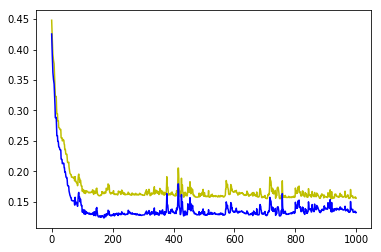

In [5]:
# In[5]:

import matplotlib.pyplot as plt
plt.plot(all_losses_global_train,'y')
plt.plot(all_losses_global_test,'b')
plt.show()

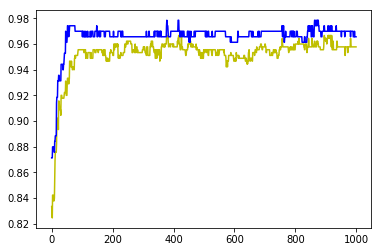

In [6]:
# In[6]:

#Accuracy
plt.plot(accuracy_train,'y')
plt.plot(accuracy_test,'b')
plt.show()

In [23]:
# In[7]:

model = LinearModule(10,1)
model.randomize(0.1)
criterion = SquareLoss(1)
learning_rate= 0.01
maxEpoch = 2000 

all_losses_global_train_batch=np.zeros(maxEpoch)
all_losses_global_test_batch=np.zeros(maxEpoch)
accuracy_train_batch=np.zeros(maxEpoch)
accuracy_test_batch=np.zeros(maxEpoch)


In [24]:
# In[8]:

#Batch
for iteration in range(0,maxEpoch) :
    model.zeroGradParameters()
    loss=0
    for j in range(0,len(x_train)):
        x=x_train[j]
        y=[y_train[j]]
        out = model.forward(x) #valeur avec le modele
        loss += criterion.getLossValue(out,y) #cout entre y_prédit et y
        delta = criterion.backward(out,y)
        model.backward_updateGradient(x,delta/len(x_train))
    all_losses_global_train_batch[iteration]= loss/len(x_train)
    
    all_losses_global_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test_batch[iteration] += criterion.getLossValue(model.forward(x_test[k]),[y_test[k]])/len(x_test)
    
    accuracy_train_batch[iteration] = 0
    for k in range(0,len(x_train)):
        accuracy_train_batch[iteration] += ((np.sign(model.forward(x_train[k]))*[y_train[k]])+1)/2/len(x_train)
     
    accuracy_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test_batch[iteration] += ((np.sign(model.forward(x_test[k]))*[y_test[k]])+1)/2/len(x_test)
     
    model.updateParameters(learning_rate) 

In [25]:
# In[9]:

import matplotlib.pyplot as plt
plt.plot(all_losses_global_train_batch,'y')
plt.plot(all_losses_global_test_batch,'b')
plt.show()


In [27]:
# In[10]:

#Accuracy
plt.plot(accuracy_train_batch,'y')
plt.plot(accuracy_test_batch,'b')
plt.show()

In [7]:
def load_mnist(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [ ]:
class LinearModule(Module):
    def __init__(self,n,C):
        self.X = n #input_dimension
        self.Y = C #ouput_dimension
        self.theta = np.zeros((self.X,self.Y))
        self.grad = np.zeros((self.X,self.Y))
        
    def zeroGradParameters(self):
        self.grad = np.zeros((self.X,self.Y))

    def forward(self,x):
        result = np.dot(x,self.theta)
        return result
    
    def randomize(self, variance):
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.theta[i][j]= random.uniform(-variance,variance)
        
    def backward_updateGradient(self,x,delta):
        #gradient du loss par rapport à theta. Donc de même dimension que théta. n x c
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.grad[i][j] += delta[j]*x[i]
    
    def updateParameters(self,learning_rate):
        self.theta = self.theta - learning_rate*self.grad
        
    def backward_delta(self, x , delta):    
        #grad du Loss par rapport à x. Donc de taille n
        grad_x = np.zeros(self.X)
        for i in range(0,self.X):
            for k in range(0,self.Y):
                grad_x[i] += delta[k]*self.theta[i,k]
        return grad_x



for iteration in range(0,maxEpoch) : 
    j=random.randint(0,len(x_train)-1)
    m1.zeroGradParameters()
    m2.zeroGradParameters()
    x=x_train[j]
    y=y_train[j]
    prediction_linear1 = m1.forward(x) #valeur avec le modele 1
    prediction_tanh1 = tanh_1.forward(out_1) #propagé vers le tanh 1
    prediction_linear2 = m2.forward(out_2) #propagé vers le modele 2
    prediction_tanh2 = tanh_2.forward(out_3) #propagé vers le tanh 2
    
    loss=criterion.getLossValue(prediction_tanh2,y) #perte de y_prédit et y
    delta=criterion.backward(prediction_tanh2,y)   #erreur à propager
    
    delta_1 = tanh_2.backward_delta(prediction_linear2,delta) #erreur à propager

    m2.backward_updateGradient(prediction_tanh1,delta_1)  #update le gradient 
    delta_2 = m2.backward_delta(prediction_tanh1,delta_1) #erreur à propager
    
    delta_3 = tanh_1.backward_delta(prediction_linear1,delta_2) #erreur à propager

    m1.backward_updateGradient(x,delta_3) #update le gradient
    delta_4 = m1.backward_delta(x,delta_3) 
 
    m1.updateParameters(learning_rate)
    tanh_1.updateParameters(learning_rate) #ne fait rien puisque tanh n'a pas de parametre
    m2.updateParameters(learning_rate)
    tanh_2.updateParameters(learning_rate) #ne fait rien puisque tanh n'a pas de 